# Data


In [2]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import gridspec
from scipy import stats, interpolate
import os
from tensorflow.keras import backend as K  

import tqdm


import math

os.environ["CUDA_VISIBLE_DEVICES"]="2"
tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)

per_process_gpu_memory_fraction: 0.333

In [4]:

#Change: "folder where you have this github" + "CWoLa_ANN_Analysis/content/events_anomalydetection_v2.features.h5"
original_data=pd.read_hdf("/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/content/events_anomalydetection_v2.features.h5")
features_sig=original_data.query("label == 1")
features_bg=original_data.query("label == 0")


features_bg2=pd.read_hdf("/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/content/events_anomalydetection_DelphesHerwig_qcd_features.h5")

In [5]:
features_sig

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2,label
1000000,-1698.670044,-884.039978,723.843018,105.035004,83.721703,46.282101,13.635600,1539.439941,372.238007,-295.865997,461.574005,431.343994,52.344799,37.284901,1.0
1000001,1246.660034,-1133.010010,-921.987000,159.865997,133.781998,58.968601,30.377399,-1218.489990,1108.380005,182.147003,514.883972,462.654999,138.789001,67.805801,1.0
1000002,420.975006,-1739.790039,281.553986,93.665802,77.925797,10.605900,6.916510,-510.779999,1484.069946,227.175995,475.316986,217.113998,29.424000,21.020300,1.0
1000003,161.048996,-1664.859985,-2005.099976,116.327003,61.819698,38.143600,18.414400,-188.942993,1556.900024,-561.664001,561.236023,348.179993,102.625000,53.422699,1.0
1000004,-564.754028,-1315.599976,-1087.410034,513.015991,276.446991,50.629799,35.460999,326.164001,1050.239990,1201.000000,108.752998,89.666603,40.928699,17.055799,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,1069.660034,659.874023,218.751007,126.183998,122.486000,27.608700,17.924801,-956.169006,-297.311005,-2204.350098,108.889999,21.177299,10.582400,9.138600,1.0
1099996,-1286.619995,-86.162498,-1366.270020,115.719002,109.853996,29.830200,22.489201,1145.729980,136.792007,1216.780029,489.053009,416.747009,84.599998,66.767502,1.0
1099997,-149.330002,1781.459961,-58.690899,508.045013,495.290985,82.283600,43.567902,84.726700,-1378.569946,-1485.469971,91.104897,79.120102,46.537300,23.227301,1.0
1099998,1584.699951,-731.156982,-196.348007,114.938004,83.769897,12.898200,9.031230,-1515.079956,783.245972,498.704010,553.737000,366.188995,192.139008,81.398201,1.0


In [6]:
features_bg2

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1062.890015,-628.263000,1.169330,223.070007,186.315994,108.044998,68.937798,785.325012,370.963013,-111.802002,67.170799,50.092701,28.765200,15.288100
1,-561.768005,-1116.109985,-865.270020,242.136002,88.407402,20.304501,12.437700,508.622009,966.379028,-325.015015,77.530197,36.413601,31.230499,24.091101
2,-1737.829956,-749.458008,-321.303009,95.748199,30.898800,22.592400,16.777599,929.109009,955.013977,1421.810059,583.320984,342.750000,61.851898,36.460602
3,-798.586975,918.947998,2056.659912,440.657013,238.959000,144.123993,71.498199,537.398987,-838.393005,-1693.349976,144.897003,36.847801,28.074800,14.404400
4,647.491028,-1165.069946,-59.776699,51.966702,24.274799,4.958610,2.036370,-794.692993,1014.479980,-1927.390015,116.587997,41.674801,18.256599,12.612700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-710.262024,-1026.920044,-1307.729980,796.106995,744.283020,368.661987,210.828003,692.814026,976.697998,-41.325802,32.149200,10.357700,7.979660,4.746760
999995,-268.907990,1307.540039,1420.180054,333.614014,240.792007,171.697006,130.660995,155.938995,-1274.060059,-1473.140015,124.994003,86.582901,25.811399,18.830799
999996,65.702904,-1444.400024,-1056.260010,77.524902,39.939301,23.995701,13.755400,314.462006,1388.619995,-158.914001,420.259003,295.635986,57.412300,44.277100
999997,-133.639999,1522.699951,-229.511993,632.781006,504.207001,105.698997,48.149700,29.203501,-1470.739990,-839.638977,189.417999,60.181000,42.477699,32.273899


In [7]:
alpha = 0.1

def load_data_J1(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    #ro
    dataset["rojOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    
    print(dataset["rojOne"])
    
    #eta
    dataset["E1"] = ((1000*dataset["pT1"])**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5/1000.
    dataset["E2"] = ((1000*dataset["pT2"])**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5/1000.
    dataset["y1"] = 0.5*np.log((dataset["E1"] + input_frame["pzj1"]/1000.)/(dataset["E1"] - input_frame["pzj1"]/1000.))
    dataset["y2"] = 0.5*np.log((dataset["E2"] + input_frame["pzj2"]/1000.)/(dataset["E2"] - input_frame["pzj2"]/1000.))
    dataset["Dy"] = dataset["y1"]-dataset["y2"]
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    dataset = dataset.fillna(0)
    dataset = dataset[["tau21jOne", "rojOne", "pTjOne"]]
    return dataset.to_numpy()


In [8]:
grapf_jet1_bg = load_data_J1(features_bg)
grapf_jet1_sig = load_data_J1(features_sig)


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

0         1.589568
1         0.000000
2         1.390784
3         1.255513
4         0.000000
            ...   
999995    0.000000
999996    1.322321
999997    0.000000
999998    0.000000
999999    0.000000
Length: 1000000, dtype: float64
0        -6.175110
1        -5.299813
2        -6.137380
3        -5.961866
4        -6.184086
            ...   
999995   -5.827303
999996   -6.081528
999997   -5.398368
999998   -6.100915
999999   -6.103879
Name: rojOne, Length: 1000000, dtype: float64


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

1000000    1.914943
1000001    1.684599
1000002    1.789997
1000003    1.672631
1000004    0.000000
             ...   
1099995    0.000000
1099996    1.289502
1099997    0.000000
1099998    1.745241
1099999    1.591161
Length: 100000, dtype: float64
1000000   -6.259376
1000001   -6.152047
1000002   -6.259809
1000003   -6.158879
1000004   -5.755328
             ...   
1099995   -5.775919
1099996   -5.874754
1099997   -5.964639
1099998   -6.181613
1099999   -6.121849
Name: rojOne, Length: 100000, dtype: float64


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]


In [9]:
alpha = 0.1

def load_data_J1_ro(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    #ro
    dataset["rojOne"] = np.log(dataset["mjj"]/(dataset["pTjOne"]**2))
    
    #eta
    dataset["E1"] = ((1000*dataset["pT1"])**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5/1000.
    dataset["E2"] = ((1000*dataset["pT2"])**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5/1000.
    dataset["y1"] = 0.5*np.log((dataset["E1"] + input_frame["pzj1"]/1000.)/(dataset["E1"] - input_frame["pzj1"]/1000.))
    dataset["y2"] = 0.5*np.log((dataset["E2"] + input_frame["pzj2"]/1000.)/(dataset["E2"] - input_frame["pzj2"]/1000.))
    dataset["Dy"] = dataset["y1"]-dataset["y2"]
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    dataset = dataset.fillna(0)
    dataset = dataset[["tau21jOne", "rojOne", "pTjOne"]]
    return dataset.to_numpy()


# Decorrelated variables

#### Calculates T_{21}' and T_{32}'


In [10]:
grapf_jet1_bg_ro = load_data_J1_ro(features_bg)
grapf_jet1_sig_ro = load_data_J1_ro(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\4224522466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\4224522466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [11]:
j1rho_bg_ro_pt500 = []
j1rho_bg_t21_pt500 = []

j1rho_bg_ro_pt1000 = []
j1rho_bg_t21_pt1000 = []

j1rho_bg_ro_pt1500 = []
j1rho_bg_t21_pt1500 = []

j1rho_bg_ro_pt2000 = []
j1rho_bg_t21_pt2000 = []

j1rho_bg_ro_pt2500 = []
j1rho_bg_t21_pt2500 = []

j1rho_bg_ro_pt3000 = []
j1rho_bg_t21_pt3000 = []

j1rho_bg_ro_pt3500 = []
j1rho_bg_t21_pt3500 = []

j1rho_bg_ro_pt4000 = []
j1rho_bg_t21_pt4000 = []

for t in range(1000000):
    if grapf_jet1_bg_ro[t][2] <= 500:
        j1rho_bg_ro_pt500.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt500.append(grapf_jet1_bg_ro[t][0])
    
    elif (grapf_jet1_bg_ro[t][2] > 500) and (grapf_jet1_bg_ro[t][2] <= 1000):
        j1rho_bg_ro_pt1000.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt1000.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 1000) and (grapf_jet1_bg_ro[t][2] <= 1500):
        j1rho_bg_ro_pt1500.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt1500.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 1500) and (grapf_jet1_bg_ro[t][2] <= 2000):
        j1rho_bg_ro_pt2000.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt2000.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 2000) and (grapf_jet1_bg_ro[t][2] <= 2500):
        j1rho_bg_ro_pt2500.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt2500.append(grapf_jet1_bg_ro[t][0])
    
    elif (grapf_jet1_bg_ro[t][2] > 2500) and (grapf_jet1_bg_ro[t][2] <= 3000):
        j1rho_bg_ro_pt3000.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt3000.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 3000) and (grapf_jet1_bg_ro[t][2] <= 3500):
        j1rho_bg_ro_pt3500.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt3500.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 3500) and (grapf_jet1_bg_ro[t][2] <= 4000):
        j1rho_bg_ro_pt4000.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt4000.append(grapf_jet1_bg_ro[t][0])
        

        
datarho_j1_T21_ro_500 = pd.DataFrame({'ro': j1rho_bg_ro_pt500, 
                                      'T21': j1rho_bg_t21_pt500})
datarho_j1_T21_ro_1000 = pd.DataFrame({'ro': j1rho_bg_ro_pt1000, 
                                       'T21': j1rho_bg_t21_pt1000})
datarho_j1_T21_ro_1500 = pd.DataFrame({'ro': j1rho_bg_ro_pt1500, 
                                       'T21': j1rho_bg_t21_pt1500})
datarho_j1_T21_ro_2000 = pd.DataFrame({'ro': j1rho_bg_ro_pt2000, 
                                       'T21': j1rho_bg_t21_pt2000})
datarho_j1_T21_ro_2500 = pd.DataFrame({'ro': j1rho_bg_ro_pt2500, 
                                       'T21': j1rho_bg_t21_pt2500})
datarho_j1_T21_ro_3000 = pd.DataFrame({'ro': j1rho_bg_ro_pt3000, 
                                       'T21': j1rho_bg_t21_pt3000})
datarho_j1_T21_ro_3500 = pd.DataFrame({'ro': j1rho_bg_ro_pt3500, 
                                       'T21': j1rho_bg_t21_pt3500})
datarho_j1_T21_ro_4000 = pd.DataFrame({'ro': j1rho_bg_ro_pt4000, 
                                       'T21': j1rho_bg_t21_pt4000})

orderrho_bgJ1_500 = datarho_j1_T21_ro_500.sort_values('ro')
orderrho_bgJ1_1000 = datarho_j1_T21_ro_1000.sort_values('ro')
orderrho_bgJ1_1500 = datarho_j1_T21_ro_1500.sort_values('ro')
orderrho_bgJ1_2000 = datarho_j1_T21_ro_2000.sort_values('ro')
orderrho_bgJ1_2500 = datarho_j1_T21_ro_2500.sort_values('ro')
orderrho_bgJ1_3000 = datarho_j1_T21_ro_3000.sort_values('ro')
orderrho_bgJ1_3500 = datarho_j1_T21_ro_3500.sort_values('ro')
orderrho_bgJ1_4000 = datarho_j1_T21_ro_4000.sort_values('ro')

In [12]:
orderrho_bgJ1_1500

,ro,T21
587293,-14.041873,0.136003
697518,-13.972316,0.590752
204775,-13.968342,0.610012
52186,-13.964064,0.370110
85346,-13.957065,0.447156
...,...,...
162200,-11.874172,0.329339
501203,-11.864843,0.636259
391579,-11.859447,0.716069
477466,-11.840626,0.694668


In [13]:
bgJ1rho_500 = orderrho_bgJ1_500.to_numpy()

avgrho_bgJ1_T21_500 = []
avgrho_bgJ1_ro_500 = []

Nrho_bgJ1_500 = math.ceil(len(orderrho_bgJ1_500['T21'])/15)

i = 0
sumrho_bgJ1_T21_500 = 0
sumrho_bgJ1_ro_500 = 0

for n in range(len(bgJ1rho_500)):
    sumrho_bgJ1_T21_500 = sumrho_bgJ1_T21_500 + bgJ1rho_500[n][1]
    sumrho_bgJ1_ro_500 = sumrho_bgJ1_ro_500 + bgJ1rho_500[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_500)-1:
        avgrho_bgJ1_T21_500.append(sumrho_bgJ1_T21_500/Nrho_bgJ1_500)
        avgrho_bgJ1_ro_500.append(sumrho_bgJ1_ro_500/Nrho_bgJ1_500)
        
    if i >= Nrho_bgJ1_500:
        avgrho_bgJ1_T21_500.append(sumrho_bgJ1_T21_500/Nrho_bgJ1_500)
        avgrho_bgJ1_ro_500.append(sumrho_bgJ1_ro_500/Nrho_bgJ1_500)
        sumrho_bgJ1_T21_500 = 0
        sumrho_bgJ1_ro_500 = 0
        i = 0
        


bgJ1rho_1000 = orderrho_bgJ1_1000.to_numpy()

avgrho_bgJ1_T21_1000 = []
avgrho_bgJ1_ro_1000 = []

Nrho_bgJ1_1000 = math.ceil(len(orderrho_bgJ1_1000['T21'])/15)

i = 0
sumrho_bgJ1_T21_1000 = 0
sumrho_bgJ1_ro_1000 = 0

for n in range(len(bgJ1rho_1000)):
    sumrho_bgJ1_T21_1000 = sumrho_bgJ1_T21_1000 + bgJ1rho_1000[n][1]
    sumrho_bgJ1_ro_1000 = sumrho_bgJ1_ro_1000 + bgJ1rho_1000[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_1000)-1:
        avgrho_bgJ1_T21_1000.append(sumrho_bgJ1_T21_1000/Nrho_bgJ1_1000)
        avgrho_bgJ1_ro_1000.append(sumrho_bgJ1_ro_1000/Nrho_bgJ1_1000)
        
    if i >= Nrho_bgJ1_1000:
        avgrho_bgJ1_T21_1000.append(sumrho_bgJ1_T21_1000/Nrho_bgJ1_1000)
        avgrho_bgJ1_ro_1000.append(sumrho_bgJ1_ro_1000/Nrho_bgJ1_1000)
        sumrho_bgJ1_T21_1000 = 0
        sumrho_bgJ1_ro_1000 = 0
        i = 0
        
        

bgJ1rho_1500 = orderrho_bgJ1_1500.to_numpy()

avgrho_bgJ1_T21_1500 = []
avgrho_bgJ1_ro_1500 = []

Nrho_bgJ1_1500 = math.ceil(len(orderrho_bgJ1_1500['T21'])/15)

i = 0
sumrho_bgJ1_T21_1500 = 0
sumrho_bgJ1_ro_1500 = 0

for n in range(len(bgJ1rho_1500)):
    sumrho_bgJ1_T21_1500 = sumrho_bgJ1_T21_1500 + bgJ1rho_1500[n][1]
    sumrho_bgJ1_ro_1500 = sumrho_bgJ1_ro_1500 + bgJ1rho_1500[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_1500)-1:
        avgrho_bgJ1_T21_1500.append(sumrho_bgJ1_T21_1500/Nrho_bgJ1_1500)
        avgrho_bgJ1_ro_1500.append(sumrho_bgJ1_ro_1500/Nrho_bgJ1_1500)
        
    if i >= Nrho_bgJ1_1500:
        avgrho_bgJ1_T21_1500.append(sumrho_bgJ1_T21_1500/Nrho_bgJ1_1500)
        avgrho_bgJ1_ro_1500.append(sumrho_bgJ1_ro_1500/Nrho_bgJ1_1500)
        sumrho_bgJ1_T21_1500 = 0
        sumrho_bgJ1_ro_1500 = 0
        i = 0



bgJ1rho_2000 = orderrho_bgJ1_2000.to_numpy()

avgrho_bgJ1_T21_2000 = []
avgrho_bgJ1_ro_2000 = []

Nrho_bgJ1_2000 = math.ceil(len(orderrho_bgJ1_2000['T21'])/15)

i = 0
sumrho_bgJ1_T21_2000 = 0
sumrho_bgJ1_ro_2000 = 0

for n in range(len(bgJ1rho_2000)):
    sumrho_bgJ1_T21_2000 = sumrho_bgJ1_T21_2000 + bgJ1rho_2000[n][1]
    sumrho_bgJ1_ro_2000 = sumrho_bgJ1_ro_2000 + bgJ1rho_2000[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_2000)-1:
        avgrho_bgJ1_T21_2000.append(sumrho_bgJ1_T21_2000/Nrho_bgJ1_2000)
        avgrho_bgJ1_ro_2000.append(sumrho_bgJ1_ro_2000/Nrho_bgJ1_2000)
        
    if i >= Nrho_bgJ1_2000:
        avgrho_bgJ1_T21_2000.append(sumrho_bgJ1_T21_2000/Nrho_bgJ1_2000)
        avgrho_bgJ1_ro_2000.append(sumrho_bgJ1_ro_2000/Nrho_bgJ1_2000)
        sumrho_bgJ1_T21_2000 = 0
        sumrho_bgJ1_ro_2000 = 0
        i = 0
        
        

bgJ1rho_2500 = orderrho_bgJ1_2500.to_numpy()

avgrho_bgJ1_T21_2500 = []
avgrho_bgJ1_ro_2500 = []

Nrho_bgJ1_2500 = math.ceil(len(orderrho_bgJ1_2500['T21'])/15)

i = 0
sumrho_bgJ1_T21_2500 = 0
sumrho_bgJ1_ro_2500 = 0

for n in range(len(bgJ1rho_2500)):
    sumrho_bgJ1_T21_2500 = sumrho_bgJ1_T21_2500 + bgJ1rho_2500[n][1]
    sumrho_bgJ1_ro_2500 = sumrho_bgJ1_ro_2500 + bgJ1rho_2500[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_2500)-1:
        avgrho_bgJ1_T21_2500.append(sumrho_bgJ1_T21_2500/Nrho_bgJ1_2500)
        avgrho_bgJ1_ro_2500.append(sumrho_bgJ1_ro_2500/Nrho_bgJ1_2500)
        
    if i >= Nrho_bgJ1_2500:
        avgrho_bgJ1_T21_2500.append(sumrho_bgJ1_T21_2500/Nrho_bgJ1_2500)
        avgrho_bgJ1_ro_2500.append(sumrho_bgJ1_ro_2500/Nrho_bgJ1_2500)
        sumrho_bgJ1_T21_2500 = 0
        sumrho_bgJ1_ro_2500 = 0
        i = 0

        
        
bgJ1rho_3000 = orderrho_bgJ1_3000.to_numpy()

avgrho_bgJ1_T21_3000 = []
avgrho_bgJ1_ro_3000 = []

Nrho_bgJ1_3000 = math.ceil(len(orderrho_bgJ1_3000['T21'])/15)

i = 0
sumrho_bgJ1_T21_3000 = 0
sumrho_bgJ1_ro_3000 = 0

for n in range(len(bgJ1rho_3000)):
    sumrho_bgJ1_T21_3000 = sumrho_bgJ1_T21_3000 + bgJ1rho_3000[n][1]
    sumrho_bgJ1_ro_3000 = sumrho_bgJ1_ro_3000 + bgJ1rho_3000[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_3000)-1:
        avgrho_bgJ1_T21_3000.append(sumrho_bgJ1_T21_3000/Nrho_bgJ1_3000)
        avgrho_bgJ1_ro_3000.append(sumrho_bgJ1_ro_3000/Nrho_bgJ1_3000)
        
    if i >= Nrho_bgJ1_3000:
        avgrho_bgJ1_T21_3000.append(sumrho_bgJ1_T21_3000/Nrho_bgJ1_3000)
        avgrho_bgJ1_ro_3000.append(sumrho_bgJ1_ro_3000/Nrho_bgJ1_3000)
        sumrho_bgJ1_T21_3000 = 0
        sumrho_bgJ1_ro_3000 = 0
        i = 0
        
        
        
bgJ1rho_3500 = orderrho_bgJ1_3500.to_numpy()

avgrho_bgJ1_T21_3500 = []
avgrho_bgJ1_ro_3500 = []

Nrho_bgJ1_3500 = math.ceil(len(orderrho_bgJ1_3500['T21'])/15)

i = 0
sumrho_bgJ1_T21_3500 = 0
sumrho_bgJ1_ro_3500 = 0

for n in range(len(bgJ1rho_3500)):
    sumrho_bgJ1_T21_3500 = sumrho_bgJ1_T21_3500 + bgJ1rho_3500[n][1]
    sumrho_bgJ1_ro_3500 = sumrho_bgJ1_ro_3500 + bgJ1rho_3500[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_3500)-1:
        avgrho_bgJ1_T21_3500.append(sumrho_bgJ1_T21_3500/Nrho_bgJ1_3500)
        avgrho_bgJ1_ro_3500.append(sumrho_bgJ1_ro_3500/Nrho_bgJ1_3500)
        
    if i >= Nrho_bgJ1_3500:
        avgrho_bgJ1_T21_3500.append(sumrho_bgJ1_T21_3500/Nrho_bgJ1_3500)
        avgrho_bgJ1_ro_3500.append(sumrho_bgJ1_ro_3500/Nrho_bgJ1_3500)
        sumrho_bgJ1_T21_3500 = 0
        sumrho_bgJ1_ro_3500 = 0
        i = 0
        
        
        
bgJ1rho_4000 = orderrho_bgJ1_4000.to_numpy()

avgrho_bgJ1_T21_4000 = []
avgrho_bgJ1_ro_4000 = []

Nrho_bgJ1_4000 = math.ceil(len(orderrho_bgJ1_4000['T21'])/15)

i = 0
sumrho_bgJ1_T21_4000 = 0
sumrho_bgJ1_ro_4000 = 0

for n in range(len(bgJ1rho_4000)):
    sumrho_bgJ1_T21_4000 = sumrho_bgJ1_T21_4000 + bgJ1rho_4000[n][1]
    sumrho_bgJ1_ro_4000 = sumrho_bgJ1_ro_4000 + bgJ1rho_4000[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_4000)-1:
        avgrho_bgJ1_T21_4000.append(sumrho_bgJ1_T21_4000/Nrho_bgJ1_4000)
        avgrho_bgJ1_ro_4000.append(sumrho_bgJ1_ro_4000/Nrho_bgJ1_4000)
        
    if i >= Nrho_bgJ1_4000:
        avgrho_bgJ1_T21_4000.append(sumrho_bgJ1_T21_4000/Nrho_bgJ1_4000)
        avgrho_bgJ1_ro_4000.append(sumrho_bgJ1_ro_4000/Nrho_bgJ1_4000)
        sumrho_bgJ1_T21_4000 = 0
        sumrho_bgJ1_ro_4000 = 0
        i = 0

In [14]:
j1rho_sig_ro_pt500 = []
j1rho_sig_t21_pt500 = []

j1rho_sig_ro_pt1000 = []
j1rho_sig_t21_pt1000 = []

j1rho_sig_ro_pt1500 = []
j1rho_sig_t21_pt1500 = []

j1rho_sig_ro_pt2000 = []
j1rho_sig_t21_pt2000 = []

j1rho_sig_ro_pt2500 = []
j1rho_sig_t21_pt2500 = []

j1rho_sig_ro_pt3000 = []
j1rho_sig_t21_pt3000 = []

j1rho_sig_ro_pt3500 = []
j1rho_sig_t21_pt3500 = []

j1rho_sig_ro_pt4000 = []
j1rho_sig_t21_pt4000 = []

for t in range(100000):
    if grapf_jet1_sig_ro[t][2] <= 500:
        j1rho_sig_ro_pt500.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt500.append(grapf_jet1_sig_ro[t][0])
    
    elif (grapf_jet1_sig_ro[t][2] > 500) and (grapf_jet1_sig_ro[t][2] <= 1000):
        j1rho_sig_ro_pt1000.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt1000.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 1000) and (grapf_jet1_sig_ro[t][2] <= 1500):
        j1rho_sig_ro_pt1500.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt1500.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 1500) and (grapf_jet1_sig_ro[t][2] <= 2000):
        j1rho_sig_ro_pt2000.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt2000.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 2000) and (grapf_jet1_sig_ro[t][2] <= 2500):
        j1rho_sig_ro_pt2500.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt2500.append(grapf_jet1_sig_ro[t][0])
    
    elif (grapf_jet1_sig_ro[t][2] > 2500) and (grapf_jet1_sig_ro[t][2] <= 3000):
        j1rho_sig_ro_pt3000.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt3000.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 3000) and (grapf_jet1_sig_ro[t][2] <= 3500):
        j1rho_sig_ro_pt3500.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt3500.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 3500) and (grapf_jet1_sig_ro[t][2] <= 4000):
        j1rho_sig_ro_pt4000.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt4000.append(grapf_jet1_sig_ro[t][0])
        

        
datarho_j1sig_T21_ro_500 = pd.DataFrame({'ro': j1rho_sig_ro_pt500, 
                                      'T21': j1rho_sig_t21_pt500})
datarho_j1sig_T21_ro_1000 = pd.DataFrame({'ro': j1rho_sig_ro_pt1000, 
                                       'T21': j1rho_sig_t21_pt1000})
datarho_j1sig_T21_ro_1500 = pd.DataFrame({'ro': j1rho_sig_ro_pt1500, 
                                       'T21': j1rho_sig_t21_pt1500})
datarho_j1sig_T21_ro_2000 = pd.DataFrame({'ro': j1rho_sig_ro_pt2000, 
                                       'T21': j1rho_sig_t21_pt2000})
datarho_j1sig_T21_ro_2500 = pd.DataFrame({'ro': j1rho_sig_ro_pt2500, 
                                       'T21': j1rho_sig_t21_pt2500})
datarho_j1sig_T21_ro_3000 = pd.DataFrame({'ro': j1rho_sig_ro_pt3000, 
                                       'T21': j1rho_sig_t21_pt3000})
datarho_j1sig_T21_ro_3500 = pd.DataFrame({'ro': j1rho_sig_ro_pt3500, 
                                       'T21': j1rho_sig_t21_pt3500})
datarho_j1sig_T21_ro_4000 = pd.DataFrame({'ro': j1rho_sig_ro_pt4000, 
                                       'T21': j1rho_sig_t21_pt4000})

orderrho_sigJ1_500 = datarho_j1sig_T21_ro_500.sort_values('ro')
orderrho_sigJ1_1000 = datarho_j1sig_T21_ro_1000.sort_values('ro')
orderrho_sigJ1_1500 = datarho_j1sig_T21_ro_1500.sort_values('ro')
orderrho_sigJ1_2000 = datarho_j1sig_T21_ro_2000.sort_values('ro')
orderrho_sigJ1_2500 = datarho_j1sig_T21_ro_2500.sort_values('ro')
orderrho_sigJ1_3000 = datarho_j1sig_T21_ro_3000.sort_values('ro')
orderrho_sigJ1_3500 = datarho_j1sig_T21_ro_3500.sort_values('ro')
orderrho_sigJ1_4000 = datarho_j1sig_T21_ro_4000.sort_values('ro')

In [15]:
sigJ1rho_500 = orderrho_sigJ1_500.to_numpy()

avgrho_sigJ1_T21_500 = []
avgrho_sigJ1_ro_500 = []

Nrho_sigJ1_500 = math.ceil(len(orderrho_sigJ1_500['T21'])/15)

i = 0
sumrho_sigJ1_T21_500 = 0
sumrho_sigJ1_ro_500 = 0

for n in range(len(sigJ1rho_500)):
    sumrho_sigJ1_T21_500 = sumrho_sigJ1_T21_500 + sigJ1rho_500[n][1]
    sumrho_sigJ1_ro_500 = sumrho_sigJ1_ro_500 + sigJ1rho_500[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_500)-1:
        avgrho_sigJ1_T21_500.append(sumrho_sigJ1_T21_500/Nrho_sigJ1_500)
        avgrho_sigJ1_ro_500.append(sumrho_sigJ1_ro_500/Nrho_sigJ1_500)
        
    if i >= Nrho_sigJ1_500:
        avgrho_sigJ1_T21_500.append(sumrho_sigJ1_T21_500/Nrho_sigJ1_500)
        avgrho_sigJ1_ro_500.append(sumrho_sigJ1_ro_500/Nrho_sigJ1_500)
        sumrho_sigJ1_T21_500 = 0
        sumrho_sigJ1_ro_500 = 0
        i = 0
        


sigJ1rho_1000 = orderrho_sigJ1_1000.to_numpy()

avgrho_sigJ1_T21_1000 = []
avgrho_sigJ1_ro_1000 = []

Nrho_sigJ1_1000 = math.ceil(len(orderrho_sigJ1_1000['T21'])/15)

i = 0
sumrho_sigJ1_T21_1000 = 0
sumrho_sigJ1_ro_1000 = 0

for n in range(len(sigJ1rho_1000)):
    sumrho_sigJ1_T21_1000 = sumrho_sigJ1_T21_1000 + sigJ1rho_1000[n][1]
    sumrho_sigJ1_ro_1000 = sumrho_sigJ1_ro_1000 + sigJ1rho_1000[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_1000)-1:
        avgrho_sigJ1_T21_1000.append(sumrho_sigJ1_T21_1000/Nrho_sigJ1_1000)
        avgrho_sigJ1_ro_1000.append(sumrho_sigJ1_ro_1000/Nrho_sigJ1_1000)
        
    if i >= Nrho_sigJ1_1000:
        avgrho_sigJ1_T21_1000.append(sumrho_sigJ1_T21_1000/Nrho_sigJ1_1000)
        avgrho_sigJ1_ro_1000.append(sumrho_sigJ1_ro_1000/Nrho_sigJ1_1000)
        sumrho_sigJ1_T21_1000 = 0
        sumrho_sigJ1_ro_1000 = 0
        i = 0
        
        

sigJ1rho_1500 = orderrho_sigJ1_1500.to_numpy()

avgrho_sigJ1_T21_1500 = []
avgrho_sigJ1_ro_1500 = []

Nrho_sigJ1_1500 = math.ceil(len(orderrho_sigJ1_1500['T21'])/15)

i = 0
sumrho_sigJ1_T21_1500 = 0
sumrho_sigJ1_ro_1500 = 0

for n in range(len(sigJ1rho_1500)):
    sumrho_sigJ1_T21_1500 = sumrho_sigJ1_T21_1500 + sigJ1rho_1500[n][1]
    sumrho_sigJ1_ro_1500 = sumrho_sigJ1_ro_1500 + sigJ1rho_1500[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_1500)-1:
        avgrho_sigJ1_T21_1500.append(sumrho_sigJ1_T21_1500/Nrho_sigJ1_1500)
        avgrho_sigJ1_ro_1500.append(sumrho_sigJ1_ro_1500/Nrho_sigJ1_1500)
        
    if i >= Nrho_sigJ1_1500:
        avgrho_sigJ1_T21_1500.append(sumrho_sigJ1_T21_1500/Nrho_sigJ1_1500)
        avgrho_sigJ1_ro_1500.append(sumrho_sigJ1_ro_1500/Nrho_sigJ1_1500)
        sumrho_sigJ1_T21_1500 = 0
        sumrho_sigJ1_ro_1500 = 0
        i = 0



sigJ1rho_2000 = orderrho_sigJ1_2000.to_numpy()

avgrho_sigJ1_T21_2000 = []
avgrho_sigJ1_ro_2000 = []

Nrho_sigJ1_2000 = math.ceil(len(orderrho_sigJ1_2000['T21'])/15)

i = 0
sumrho_sigJ1_T21_2000 = 0
sumrho_sigJ1_ro_2000 = 0

for n in range(len(sigJ1rho_2000)):
    sumrho_sigJ1_T21_2000 = sumrho_sigJ1_T21_2000 + sigJ1rho_2000[n][1]
    sumrho_sigJ1_ro_2000 = sumrho_sigJ1_ro_2000 + sigJ1rho_2000[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_2000)-1:
        avgrho_sigJ1_T21_2000.append(sumrho_sigJ1_T21_2000/Nrho_sigJ1_2000)
        avgrho_sigJ1_ro_2000.append(sumrho_sigJ1_ro_2000/Nrho_sigJ1_2000)
        
    if i >= Nrho_sigJ1_2000:
        avgrho_sigJ1_T21_2000.append(sumrho_sigJ1_T21_2000/Nrho_sigJ1_2000)
        avgrho_sigJ1_ro_2000.append(sumrho_sigJ1_ro_2000/Nrho_sigJ1_2000)
        sumrho_sigJ1_T21_2000 = 0
        sumrho_sigJ1_ro_2000 = 0
        i = 0
        
        

sigJ1rho_2500 = orderrho_sigJ1_2500.to_numpy()

avgrho_sigJ1_T21_2500 = []
avgrho_sigJ1_ro_2500 = []

Nrho_sigJ1_2500 = math.ceil(len(orderrho_sigJ1_2500['T21'])/15)

i = 0
sumrho_sigJ1_T21_2500 = 0
sumrho_sigJ1_ro_2500 = 0

for n in range(len(sigJ1rho_2500)):
    sumrho_sigJ1_T21_2500 = sumrho_sigJ1_T21_2500 + sigJ1rho_2500[n][1]
    sumrho_sigJ1_ro_2500 = sumrho_sigJ1_ro_2500 + sigJ1rho_2500[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_2500)-1:
        avgrho_sigJ1_T21_2500.append(sumrho_sigJ1_T21_2500/Nrho_sigJ1_2500)
        avgrho_sigJ1_ro_2500.append(sumrho_sigJ1_ro_2500/Nrho_sigJ1_2500)
        
    if i >= Nrho_sigJ1_2500:
        avgrho_sigJ1_T21_2500.append(sumrho_sigJ1_T21_2500/Nrho_sigJ1_2500)
        avgrho_sigJ1_ro_2500.append(sumrho_sigJ1_ro_2500/Nrho_sigJ1_2500)
        sumrho_sigJ1_T21_2500 = 0
        sumrho_sigJ1_ro_2500 = 0
        i = 0

        
        
sigJ1rho_3000 = orderrho_sigJ1_3000.to_numpy()

avgrho_sigJ1_T21_3000 = []
avgrho_sigJ1_ro_3000 = []

Nrho_sigJ1_3000 = math.ceil(len(orderrho_sigJ1_3000['T21'])/15)

i = 0
sumrho_sigJ1_T21_3000 = 0
sumrho_sigJ1_ro_3000 = 0

for n in range(len(sigJ1rho_3000)):
    sumrho_sigJ1_T21_3000 = sumrho_sigJ1_T21_3000 + sigJ1rho_3000[n][1]
    sumrho_sigJ1_ro_3000 = sumrho_sigJ1_ro_3000 + sigJ1rho_3000[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_3000)-1:
        avgrho_sigJ1_T21_3000.append(sumrho_sigJ1_T21_3000/Nrho_sigJ1_3000)
        avgrho_sigJ1_ro_3000.append(sumrho_sigJ1_ro_3000/Nrho_sigJ1_3000)
        
    if i >= Nrho_sigJ1_3000:
        avgrho_sigJ1_T21_3000.append(sumrho_sigJ1_T21_3000/Nrho_sigJ1_3000)
        avgrho_sigJ1_ro_3000.append(sumrho_sigJ1_ro_3000/Nrho_sigJ1_3000)
        sumrho_sigJ1_T21_3000 = 0
        sumrho_sigJ1_ro_3000 = 0
        i = 0
        
        
        
sigJ1rho_3500 = orderrho_sigJ1_3500.to_numpy()

avgrho_sigJ1_T21_3500 = []
avgrho_sigJ1_ro_3500 = []

Nrho_sigJ1_3500 = math.ceil(len(orderrho_sigJ1_3500['T21'])/15)

i = 0
sumrho_sigJ1_T21_3500 = 0
sumrho_sigJ1_ro_3500 = 0

for n in range(len(sigJ1rho_3500)):
    sumrho_sigJ1_T21_3500 = sumrho_sigJ1_T21_3500 + sigJ1rho_3500[n][1]
    sumrho_sigJ1_ro_3500 = sumrho_sigJ1_ro_3500 + sigJ1rho_3500[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_3500)-1:
        avgrho_sigJ1_T21_3500.append(sumrho_sigJ1_T21_3500/Nrho_sigJ1_3500)
        avgrho_sigJ1_ro_3500.append(sumrho_sigJ1_ro_3500/Nrho_sigJ1_3500)
        
    if i >= Nrho_sigJ1_3500:
        avgrho_sigJ1_T21_3500.append(sumrho_sigJ1_T21_3500/Nrho_sigJ1_3500)
        avgrho_sigJ1_ro_3500.append(sumrho_sigJ1_ro_3500/Nrho_sigJ1_3500)
        sumrho_sigJ1_T21_3500 = 0
        sumrho_sigJ1_ro_3500 = 0
        i = 0
        
        
        
sigJ1rho_4000 = orderrho_sigJ1_4000.to_numpy()

avgrho_sigJ1_T21_4000 = []
avgrho_sigJ1_ro_4000 = []

Nrho_sigJ1_4000 = math.ceil(len(orderrho_sigJ1_4000['T21'])/15)

i = 0
sumrho_sigJ1_T21_4000 = 0
sumrho_sigJ1_ro_4000 = 0

for n in range(len(sigJ1rho_4000)):
    sumrho_sigJ1_T21_4000 = sumrho_sigJ1_T21_4000 + sigJ1rho_4000[n][1]
    sumrho_sigJ1_ro_4000 = sumrho_sigJ1_ro_4000 + sigJ1rho_4000[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_4000)-1:
        avgrho_sigJ1_T21_4000.append(sumrho_sigJ1_T21_4000/Nrho_sigJ1_4000)
        avgrho_sigJ1_ro_4000.append(sumrho_sigJ1_ro_4000/Nrho_sigJ1_4000)
        
    if i >= Nrho_sigJ1_4000:
        avgrho_sigJ1_T21_4000.append(sumrho_sigJ1_T21_4000/Nrho_sigJ1_4000)
        avgrho_sigJ1_ro_4000.append(sumrho_sigJ1_ro_4000/Nrho_sigJ1_4000)
        sumrho_sigJ1_T21_4000 = 0
        sumrho_sigJ1_ro_4000 = 0
        i = 0

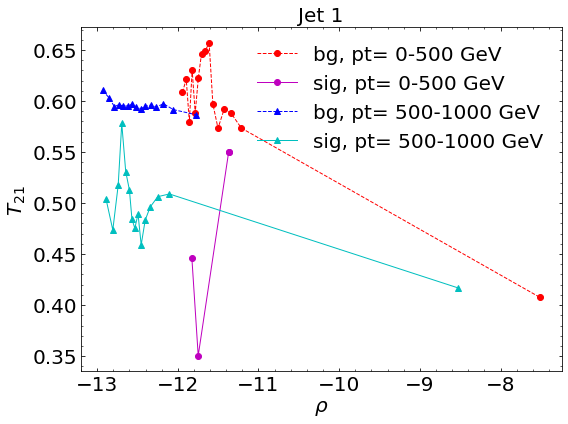

In [16]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_500, avgrho_bgJ1_T21_500, 'o--', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avgrho_sigJ1_ro_500, avgrho_sigJ1_T21_500, 'o-', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avgrho_bgJ1_ro_1000, avgrho_bgJ1_T21_1000, '^--', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avgrho_sigJ1_ro_1000, avgrho_sigJ1_T21_1000, '^-', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

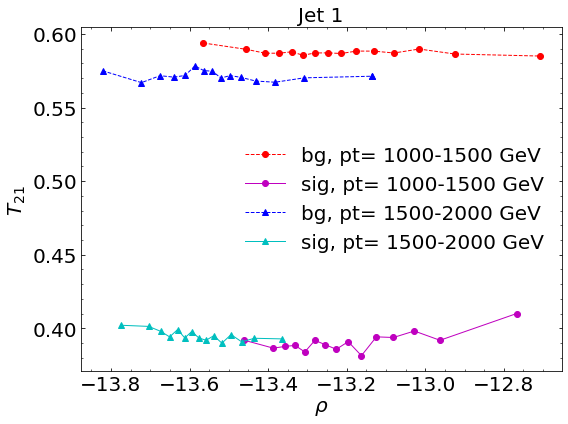

In [17]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_1500, avgrho_bgJ1_T21_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avgrho_sigJ1_ro_1500, avgrho_sigJ1_T21_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avgrho_bgJ1_ro_2000, avgrho_bgJ1_T21_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avgrho_sigJ1_ro_2000, avgrho_sigJ1_T21_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

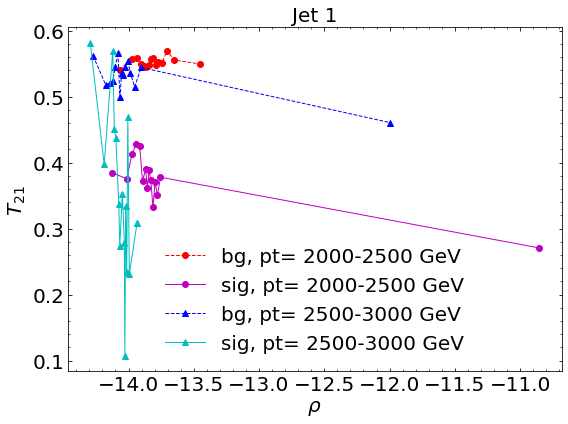

In [18]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_2500, avgrho_bgJ1_T21_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avgrho_sigJ1_ro_2500, avgrho_sigJ1_T21_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avgrho_bgJ1_ro_3000, avgrho_bgJ1_T21_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avgrho_sigJ1_ro_3000, avgrho_sigJ1_T21_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

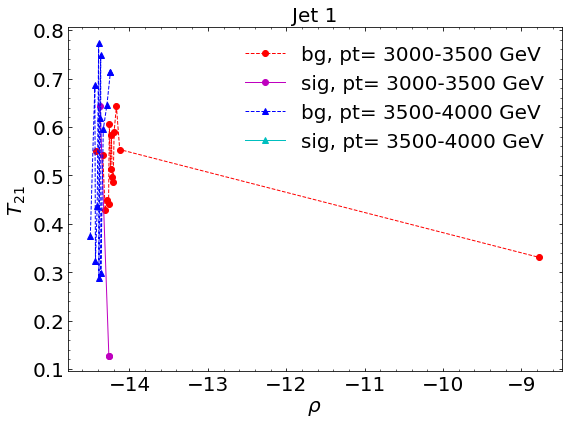

In [19]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_3500, avgrho_bgJ1_T21_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avgrho_sigJ1_ro_3500, avgrho_sigJ1_T21_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avgrho_bgJ1_ro_4000, avgrho_bgJ1_T21_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
plt.plot(avgrho_sigJ1_ro_4000, avgrho_sigJ1_T21_4000, '^-', linewidth=1, color='c', label="sig, pt= 3500-4000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

In [20]:
alpha = 0.1

def load_data_J2_ro(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    
    #ro
    dataset["rojTwo"] = np.log(dataset["mjj"]/(dataset["pTjTwo"]**2))
    

    dataset = dataset.fillna(0)
    dataset = dataset[["tau21jTwo", "rojTwo", "pTjTwo"]]
    return dataset.to_numpy()


In [21]:
grapf_jet2_bg_ro = load_data_J2_ro(features_bg)
grapf_jet2_sig_ro = load_data_J2_ro(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2592972720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2592972720.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [22]:
j2rho_bg_ro_pt500 = []
j2rho_bg_t21_pt500 = []

j2rho_bg_ro_pt1000 = []
j2rho_bg_t21_pt1000 = []

j2rho_bg_ro_pt1500 = []
j2rho_bg_t21_pt1500 = []

j2rho_bg_ro_pt2000 = []
j2rho_bg_t21_pt2000 = []

j2rho_bg_ro_pt2500 = []
j2rho_bg_t21_pt2500 = []

j2rho_bg_ro_pt3000 = []
j2rho_bg_t21_pt3000 = []

j2rho_bg_ro_pt3500 = []
j2rho_bg_t21_pt3500 = []

j2rho_bg_ro_pt4000 = []
j2rho_bg_t21_pt4000 = []

for t in range(1000000):
    if grapf_jet2_bg_ro[t][2] <= 500:
        j2rho_bg_ro_pt500.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt500.append(grapf_jet2_bg_ro[t][0])
    
    elif (grapf_jet2_bg_ro[t][2] > 500) and (grapf_jet2_bg_ro[t][2] <= 1000):
        j2rho_bg_ro_pt1000.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt1000.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 1000) and (grapf_jet2_bg_ro[t][2] <= 1500):
        j2rho_bg_ro_pt1500.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt1500.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 1500) and (grapf_jet2_bg_ro[t][2] <= 2000):
        j2rho_bg_ro_pt2000.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt2000.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 2000) and (grapf_jet2_bg_ro[t][2] <= 2500):
        j2rho_bg_ro_pt2500.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt2500.append(grapf_jet2_bg_ro[t][0])
    
    elif (grapf_jet2_bg_ro[t][2] > 2500) and (grapf_jet2_bg_ro[t][2] <= 3000):
        j2rho_bg_ro_pt3000.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt3000.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 3000) and (grapf_jet2_bg_ro[t][2] <= 3500):
        j2rho_bg_ro_pt3500.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt3500.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 3500) and (grapf_jet2_bg_ro[t][2] <= 4000):
        j2rho_bg_ro_pt4000.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt4000.append(grapf_jet2_bg_ro[t][0])
        

        
datarho_j2_T21_ro_500 = pd.DataFrame({'ro': j2rho_bg_ro_pt500, 
                                      'T21': j2rho_bg_t21_pt500})
datarho_j2_T21_ro_1000 = pd.DataFrame({'ro': j2rho_bg_ro_pt1000, 
                                       'T21': j2rho_bg_t21_pt1000})
datarho_j2_T21_ro_1500 = pd.DataFrame({'ro': j2rho_bg_ro_pt1500, 
                                       'T21': j2rho_bg_t21_pt1500})
datarho_j2_T21_ro_2000 = pd.DataFrame({'ro': j2rho_bg_ro_pt2000, 
                                       'T21': j2rho_bg_t21_pt2000})
datarho_j2_T21_ro_2500 = pd.DataFrame({'ro': j2rho_bg_ro_pt2500, 
                                       'T21': j2rho_bg_t21_pt2500})
datarho_j2_T21_ro_3000 = pd.DataFrame({'ro': j2rho_bg_ro_pt3000, 
                                       'T21': j2rho_bg_t21_pt3000})
datarho_j2_T21_ro_3500 = pd.DataFrame({'ro': j2rho_bg_ro_pt3500, 
                                       'T21': j2rho_bg_t21_pt3500})
datarho_j2_T21_ro_4000 = pd.DataFrame({'ro': j2rho_bg_ro_pt4000, 
                                       'T21': j2rho_bg_t21_pt4000})

orderrho_bgJ2_500 = datarho_j2_T21_ro_500.sort_values('ro')
orderrho_bgJ2_1000 = datarho_j2_T21_ro_1000.sort_values('ro')
orderrho_bgJ2_1500 = datarho_j2_T21_ro_1500.sort_values('ro')
orderrho_bgJ2_2000 = datarho_j2_T21_ro_2000.sort_values('ro')
orderrho_bgJ2_2500 = datarho_j2_T21_ro_2500.sort_values('ro')
orderrho_bgJ2_3000 = datarho_j2_T21_ro_3000.sort_values('ro')
orderrho_bgJ2_3500 = datarho_j2_T21_ro_3500.sort_values('ro')
orderrho_bgJ2_4000 = datarho_j2_T21_ro_4000.sort_values('ro')

In [23]:
bgJ2rho_500 = orderrho_bgJ2_500.to_numpy()

avgrho_bgJ2_T21_500 = []
avgrho_bgJ2_ro_500 = []

Nrho_bgJ2_500 = math.ceil(len(orderrho_bgJ2_500['T21'])/15)

i = 0
sumrho_bgJ2_T21_500 = 0
sumrho_bgJ2_ro_500 = 0

for n in range(len(bgJ2rho_500)):
    sumrho_bgJ2_T21_500 = sumrho_bgJ2_T21_500 + bgJ2rho_500[n][1]
    sumrho_bgJ2_ro_500 = sumrho_bgJ2_ro_500 + bgJ2rho_500[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_500)-1:
        avgrho_bgJ2_T21_500.append(sumrho_bgJ2_T21_500/Nrho_bgJ2_500)
        avgrho_bgJ2_ro_500.append(sumrho_bgJ2_ro_500/Nrho_bgJ2_500)
        
    if i >= Nrho_bgJ2_500:
        avgrho_bgJ2_T21_500.append(sumrho_bgJ2_T21_500/Nrho_bgJ2_500)
        avgrho_bgJ2_ro_500.append(sumrho_bgJ2_ro_500/Nrho_bgJ2_500)
        sumrho_bgJ2_T21_500 = 0
        sumrho_bgJ2_ro_500 = 0
        i = 0
        


bgJ2rho_1000 = orderrho_bgJ2_1000.to_numpy()

avgrho_bgJ2_T21_1000 = []
avgrho_bgJ2_ro_1000 = []

Nrho_bgJ2_1000 = math.ceil(len(orderrho_bgJ2_1000['T21'])/15)

i = 0
sumrho_bgJ2_T21_1000 = 0
sumrho_bgJ2_ro_1000 = 0

for n in range(len(bgJ2rho_1000)):
    sumrho_bgJ2_T21_1000 = sumrho_bgJ2_T21_1000 + bgJ2rho_1000[n][1]
    sumrho_bgJ2_ro_1000 = sumrho_bgJ2_ro_1000 + bgJ2rho_1000[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_1000)-1:
        avgrho_bgJ2_T21_1000.append(sumrho_bgJ2_T21_1000/Nrho_bgJ2_1000)
        avgrho_bgJ2_ro_1000.append(sumrho_bgJ2_ro_1000/Nrho_bgJ2_1000)
        
    if i >= Nrho_bgJ2_1000:
        avgrho_bgJ2_T21_1000.append(sumrho_bgJ2_T21_1000/Nrho_bgJ2_1000)
        avgrho_bgJ2_ro_1000.append(sumrho_bgJ2_ro_1000/Nrho_bgJ2_1000)
        sumrho_bgJ2_T21_1000 = 0
        sumrho_bgJ2_ro_1000 = 0
        i = 0
        
        

bgJ2rho_1500 = orderrho_bgJ2_1500.to_numpy()

avgrho_bgJ2_T21_1500 = []
avgrho_bgJ2_ro_1500 = []

Nrho_bgJ2_1500 = math.ceil(len(orderrho_bgJ2_1500['T21'])/15)

i = 0
sumrho_bgJ2_T21_1500 = 0
sumrho_bgJ2_ro_1500 = 0

for n in range(len(bgJ2rho_1500)):
    sumrho_bgJ2_T21_1500 = sumrho_bgJ2_T21_1500 + bgJ2rho_1500[n][1]
    sumrho_bgJ2_ro_1500 = sumrho_bgJ2_ro_1500 + bgJ2rho_1500[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_1500)-1:
        avgrho_bgJ2_T21_1500.append(sumrho_bgJ2_T21_1500/Nrho_bgJ2_1500)
        avgrho_bgJ2_ro_1500.append(sumrho_bgJ2_ro_1500/Nrho_bgJ2_1500)
        
    if i >= Nrho_bgJ2_1500:
        avgrho_bgJ2_T21_1500.append(sumrho_bgJ2_T21_1500/Nrho_bgJ2_1500)
        avgrho_bgJ2_ro_1500.append(sumrho_bgJ2_ro_1500/Nrho_bgJ2_1500)
        sumrho_bgJ2_T21_1500 = 0
        sumrho_bgJ2_ro_1500 = 0
        i = 0



bgJ2rho_2000 = orderrho_bgJ2_2000.to_numpy()

avgrho_bgJ2_T21_2000 = []
avgrho_bgJ2_ro_2000 = []

Nrho_bgJ2_2000 = math.ceil(len(orderrho_bgJ2_2000['T21'])/15)

i = 0
sumrho_bgJ2_T21_2000 = 0
sumrho_bgJ2_ro_2000 = 0

for n in range(len(bgJ2rho_2000)):
    sumrho_bgJ2_T21_2000 = sumrho_bgJ2_T21_2000 + bgJ2rho_2000[n][1]
    sumrho_bgJ2_ro_2000 = sumrho_bgJ2_ro_2000 + bgJ2rho_2000[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_2000)-1:
        avgrho_bgJ2_T21_2000.append(sumrho_bgJ2_T21_2000/Nrho_bgJ2_2000)
        avgrho_bgJ2_ro_2000.append(sumrho_bgJ2_ro_2000/Nrho_bgJ2_2000)
        
    if i >= Nrho_bgJ2_2000:
        avgrho_bgJ2_T21_2000.append(sumrho_bgJ2_T21_2000/Nrho_bgJ2_2000)
        avgrho_bgJ2_ro_2000.append(sumrho_bgJ2_ro_2000/Nrho_bgJ2_2000)
        sumrho_bgJ2_T21_2000 = 0
        sumrho_bgJ2_ro_2000 = 0
        i = 0
        
        

bgJ2rho_2500 = orderrho_bgJ2_2500.to_numpy()

avgrho_bgJ2_T21_2500 = []
avgrho_bgJ2_ro_2500 = []

Nrho_bgJ2_2500 = math.ceil(len(orderrho_bgJ2_2500['T21'])/15)

i = 0
sumrho_bgJ2_T21_2500 = 0
sumrho_bgJ2_ro_2500 = 0

for n in range(len(bgJ2rho_2500)):
    sumrho_bgJ2_T21_2500 = sumrho_bgJ2_T21_2500 + bgJ2rho_2500[n][1]
    sumrho_bgJ2_ro_2500 = sumrho_bgJ2_ro_2500 + bgJ2rho_2500[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_2500)-1:
        avgrho_bgJ2_T21_2500.append(sumrho_bgJ2_T21_2500/Nrho_bgJ2_2500)
        avgrho_bgJ2_ro_2500.append(sumrho_bgJ2_ro_2500/Nrho_bgJ2_2500)
        
    if i >= Nrho_bgJ2_2500:
        avgrho_bgJ2_T21_2500.append(sumrho_bgJ2_T21_2500/Nrho_bgJ2_2500)
        avgrho_bgJ2_ro_2500.append(sumrho_bgJ2_ro_2500/Nrho_bgJ2_2500)
        sumrho_bgJ2_T21_2500 = 0
        sumrho_bgJ2_ro_2500 = 0
        i = 0

        
        
bgJ2rho_3000 = orderrho_bgJ2_3000.to_numpy()

avgrho_bgJ2_T21_3000 = []
avgrho_bgJ2_ro_3000 = []

Nrho_bgJ2_3000 = math.ceil(len(orderrho_bgJ2_3000['T21'])/15)

i = 0
sumrho_bgJ2_T21_3000 = 0
sumrho_bgJ2_ro_3000 = 0

for n in range(len(bgJ2rho_3000)):
    sumrho_bgJ2_T21_3000 = sumrho_bgJ2_T21_3000 + bgJ2rho_3000[n][1]
    sumrho_bgJ2_ro_3000 = sumrho_bgJ2_ro_3000 + bgJ2rho_3000[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_3000)-1:
        avgrho_bgJ2_T21_3000.append(sumrho_bgJ2_T21_3000/Nrho_bgJ2_3000)
        avgrho_bgJ2_ro_3000.append(sumrho_bgJ2_ro_3000/Nrho_bgJ2_3000)
        
    if i >= Nrho_bgJ2_3000:
        avgrho_bgJ2_T21_3000.append(sumrho_bgJ2_T21_3000/Nrho_bgJ2_3000)
        avgrho_bgJ2_ro_3000.append(sumrho_bgJ2_ro_3000/Nrho_bgJ2_3000)
        sumrho_bgJ2_T21_3000 = 0
        sumrho_bgJ2_ro_3000 = 0
        i = 0
        
        
        
bgJ2rho_3500 = orderrho_bgJ2_3500.to_numpy()

avgrho_bgJ2_T21_3500 = []
avgrho_bgJ2_ro_3500 = []

Nrho_bgJ2_3500 = math.ceil(len(orderrho_bgJ2_3500['T21'])/15)

i = 0
sumrho_bgJ2_T21_3500 = 0
sumrho_bgJ2_ro_3500 = 0

for n in range(len(bgJ2rho_3500)):
    sumrho_bgJ2_T21_3500 = sumrho_bgJ2_T21_3500 + bgJ2rho_3500[n][1]
    sumrho_bgJ2_ro_3500 = sumrho_bgJ2_ro_3500 + bgJ2rho_3500[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_3500)-1:
        avgrho_bgJ2_T21_3500.append(sumrho_bgJ2_T21_3500/Nrho_bgJ2_3500)
        avgrho_bgJ2_ro_3500.append(sumrho_bgJ2_ro_3500/Nrho_bgJ2_3500)
        
    if i >= Nrho_bgJ2_3500:
        avgrho_bgJ2_T21_3500.append(sumrho_bgJ2_T21_3500/Nrho_bgJ2_3500)
        avgrho_bgJ2_ro_3500.append(sumrho_bgJ2_ro_3500/Nrho_bgJ2_3500)
        sumrho_bgJ2_T21_3500 = 0
        sumrho_bgJ2_ro_3500 = 0
        i = 0
        
        
        
bgJ2rho_4000 = orderrho_bgJ2_4000.to_numpy()

avgrho_bgJ2_T21_4000 = []
avgrho_bgJ2_ro_4000 = []

Nrho_bgJ2_4000 = math.ceil(len(orderrho_bgJ2_4000['T21'])/15)

i = 0
sumrho_bgJ2_T21_4000 = 0
sumrho_bgJ2_ro_4000 = 0

for n in range(len(bgJ2rho_4000)):
    sumrho_bgJ2_T21_4000 = sumrho_bgJ2_T21_4000 + bgJ2rho_4000[n][1]
    sumrho_bgJ2_ro_4000 = sumrho_bgJ2_ro_4000 + bgJ2rho_4000[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_4000)-1:
        avgrho_bgJ2_T21_4000.append(sumrho_bgJ2_T21_4000/Nrho_bgJ2_4000)
        avgrho_bgJ2_ro_4000.append(sumrho_bgJ2_ro_4000/Nrho_bgJ2_4000)
        
    if i >= Nrho_bgJ2_4000:
        avgrho_bgJ2_T21_4000.append(sumrho_bgJ2_T21_4000/Nrho_bgJ2_4000)
        avgrho_bgJ2_ro_4000.append(sumrho_bgJ2_ro_4000/Nrho_bgJ2_4000)
        sumrho_bgJ2_T21_4000 = 0
        sumrho_bgJ2_ro_4000 = 0
        i = 0

In [24]:
j2rho_sig_ro_pt500 = []
j2rho_sig_t21_pt500 = []

j2rho_sig_ro_pt1000 = []
j2rho_sig_t21_pt1000 = []

j2rho_sig_ro_pt1500 = []
j2rho_sig_t21_pt1500 = []

j2rho_sig_ro_pt2000 = []
j2rho_sig_t21_pt2000 = []

j2rho_sig_ro_pt2500 = []
j2rho_sig_t21_pt2500 = []

j2rho_sig_ro_pt3000 = []
j2rho_sig_t21_pt3000 = []

j2rho_sig_ro_pt3500 = []
j2rho_sig_t21_pt3500 = []

j2rho_sig_ro_pt4000 = []
j2rho_sig_t21_pt4000 = []

for t in range(100000):
    if grapf_jet2_sig_ro[t][2] <= 500:
        j2rho_sig_ro_pt500.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt500.append(grapf_jet2_sig_ro[t][0])
    
    elif (grapf_jet2_sig_ro[t][2] > 500) and (grapf_jet2_sig_ro[t][2] <= 1000):
        j2rho_sig_ro_pt1000.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt1000.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 1000) and (grapf_jet2_sig_ro[t][2] <= 1500):
        j2rho_sig_ro_pt1500.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt1500.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 1500) and (grapf_jet2_sig_ro[t][2] <= 2000):
        j2rho_sig_ro_pt2000.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt2000.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 2000) and (grapf_jet2_sig_ro[t][2] <= 2500):
        j2rho_sig_ro_pt2500.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt2500.append(grapf_jet2_sig_ro[t][0])
    
    elif (grapf_jet2_sig_ro[t][2] > 2500) and (grapf_jet2_sig_ro[t][2] <= 3000):
        j2rho_sig_ro_pt3000.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt3000.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 3000) and (grapf_jet2_sig_ro[t][2] <= 3500):
        j2rho_sig_ro_pt3500.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt3500.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 3500) and (grapf_jet2_sig_ro[t][2] <= 4000):
        j2rho_sig_ro_pt4000.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt4000.append(grapf_jet2_sig_ro[t][0])
        

        
datarho_j2sig_T21_ro_500 = pd.DataFrame({'ro': j2rho_sig_ro_pt500, 
                                         'T21': j2rho_sig_t21_pt500})
datarho_j2sig_T21_ro_1000 = pd.DataFrame({'ro': j2rho_sig_ro_pt1000, 
                                          'T21': j2rho_sig_t21_pt1000})
datarho_j2sig_T21_ro_1500 = pd.DataFrame({'ro': j2rho_sig_ro_pt1500, 
                                          'T21': j2rho_sig_t21_pt1500})
datarho_j2sig_T21_ro_2000 = pd.DataFrame({'ro': j2rho_sig_ro_pt2000, 
                                          'T21': j2rho_sig_t21_pt2000})
datarho_j2sig_T21_ro_2500 = pd.DataFrame({'ro': j2rho_sig_ro_pt2500, 
                                          'T21': j2rho_sig_t21_pt2500})
datarho_j2sig_T21_ro_3000 = pd.DataFrame({'ro': j2rho_sig_ro_pt3000, 
                                          'T21': j2rho_sig_t21_pt3000})
datarho_j2sig_T21_ro_3500 = pd.DataFrame({'ro': j2rho_sig_ro_pt3500, 
                                          'T21': j2rho_sig_t21_pt3500})
datarho_j2sig_T21_ro_4000 = pd.DataFrame({'ro': j2rho_sig_ro_pt4000, 
                                          'T21': j2rho_sig_t21_pt4000})

orderrho_sigJ2_500 = datarho_j2sig_T21_ro_500.sort_values('ro')
orderrho_sigJ2_1000 = datarho_j2sig_T21_ro_1000.sort_values('ro')
orderrho_sigJ2_1500 = datarho_j2sig_T21_ro_1500.sort_values('ro')
orderrho_sigJ2_2000 = datarho_j2sig_T21_ro_2000.sort_values('ro')
orderrho_sigJ2_2500 = datarho_j2sig_T21_ro_2500.sort_values('ro')
orderrho_sigJ2_3000 = datarho_j2sig_T21_ro_3000.sort_values('ro')
orderrho_sigJ2_3500 = datarho_j2sig_T21_ro_3500.sort_values('ro')
orderrho_sigJ2_4000 = datarho_j2sig_T21_ro_4000.sort_values('ro')

In [25]:
sigJ2rho_500 = orderrho_sigJ2_500.to_numpy()

avgrho_sigJ2_T21_500 = []
avgrho_sigJ2_ro_500 = []

Nrho_sigJ2_500 = math.ceil(len(orderrho_sigJ2_500['T21'])/15)

i = 0
sumrho_sigJ2_T21_500 = 0
sumrho_sigJ2_ro_500 = 0

for n in range(len(sigJ2rho_500)):
    sumrho_sigJ2_T21_500 = sumrho_sigJ2_T21_500 + sigJ2rho_500[n][1]
    sumrho_sigJ2_ro_500 = sumrho_sigJ2_ro_500 + sigJ2rho_500[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_500)-1:
        avgrho_sigJ2_T21_500.append(sumrho_sigJ2_T21_500/Nrho_sigJ2_500)
        avgrho_sigJ2_ro_500.append(sumrho_sigJ2_ro_500/Nrho_sigJ2_500)
        
    if i >= Nrho_sigJ2_500:
        avgrho_sigJ2_T21_500.append(sumrho_sigJ2_T21_500/Nrho_sigJ2_500)
        avgrho_sigJ2_ro_500.append(sumrho_sigJ2_ro_500/Nrho_sigJ2_500)
        sumrho_sigJ2_T21_500 = 0
        sumrho_sigJ2_ro_500 = 0
        i = 0
        


sigJ2rho_1000 = orderrho_sigJ2_1000.to_numpy()

avgrho_sigJ2_T21_1000 = []
avgrho_sigJ2_ro_1000 = []

Nrho_sigJ2_1000 = math.ceil(len(orderrho_sigJ2_1000['T21'])/15)

i = 0
sumrho_sigJ2_T21_1000 = 0
sumrho_sigJ2_ro_1000 = 0

for n in range(len(sigJ2rho_1000)):
    sumrho_sigJ2_T21_1000 = sumrho_sigJ2_T21_1000 + sigJ2rho_1000[n][1]
    sumrho_sigJ2_ro_1000 = sumrho_sigJ2_ro_1000 + sigJ2rho_1000[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_1000)-1:
        avgrho_sigJ2_T21_1000.append(sumrho_sigJ2_T21_1000/Nrho_sigJ2_1000)
        avgrho_sigJ2_ro_1000.append(sumrho_sigJ2_ro_1000/Nrho_sigJ2_1000)
        
    if i >= Nrho_sigJ2_1000:
        avgrho_sigJ2_T21_1000.append(sumrho_sigJ2_T21_1000/Nrho_sigJ2_1000)
        avgrho_sigJ2_ro_1000.append(sumrho_sigJ2_ro_1000/Nrho_sigJ2_1000)
        sumrho_sigJ2_T21_1000 = 0
        sumrho_sigJ2_ro_1000 = 0
        i = 0
        
        

sigJ2rho_1500 = orderrho_sigJ2_1500.to_numpy()

avgrho_sigJ2_T21_1500 = []
avgrho_sigJ2_ro_1500 = []

Nrho_sigJ2_1500 = math.ceil(len(orderrho_sigJ2_1500['T21'])/15)

i = 0
sumrho_sigJ2_T21_1500 = 0
sumrho_sigJ2_ro_1500 = 0

for n in range(len(sigJ2rho_1500)):
    sumrho_sigJ2_T21_1500 = sumrho_sigJ2_T21_1500 + sigJ2rho_1500[n][1]
    sumrho_sigJ2_ro_1500 = sumrho_sigJ2_ro_1500 + sigJ2rho_1500[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_1500)-1:
        avgrho_sigJ2_T21_1500.append(sumrho_sigJ2_T21_1500/Nrho_sigJ2_1500)
        avgrho_sigJ2_ro_1500.append(sumrho_sigJ2_ro_1500/Nrho_sigJ2_1500)
        
    if i >= Nrho_sigJ2_1500:
        avgrho_sigJ2_T21_1500.append(sumrho_sigJ2_T21_1500/Nrho_sigJ2_1500)
        avgrho_sigJ2_ro_1500.append(sumrho_sigJ2_ro_1500/Nrho_sigJ2_1500)
        sumrho_sigJ2_T21_1500 = 0
        sumrho_sigJ2_ro_1500 = 0
        i = 0



sigJ2rho_2000 = orderrho_sigJ2_2000.to_numpy()

avgrho_sigJ2_T21_2000 = []
avgrho_sigJ2_ro_2000 = []

Nrho_sigJ2_2000 = math.ceil(len(orderrho_sigJ2_2000['T21'])/15)

i = 0
sumrho_sigJ2_T21_2000 = 0
sumrho_sigJ2_ro_2000 = 0

for n in range(len(sigJ2rho_2000)):
    sumrho_sigJ2_T21_2000 = sumrho_sigJ2_T21_2000 + sigJ2rho_2000[n][1]
    sumrho_sigJ2_ro_2000 = sumrho_sigJ2_ro_2000 + sigJ2rho_2000[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_2000)-1:
        avgrho_sigJ2_T21_2000.append(sumrho_sigJ2_T21_2000/Nrho_sigJ2_2000)
        avgrho_sigJ2_ro_2000.append(sumrho_sigJ2_ro_2000/Nrho_sigJ2_2000)
        
    if i >= Nrho_sigJ2_2000:
        avgrho_sigJ2_T21_2000.append(sumrho_sigJ2_T21_2000/Nrho_sigJ2_2000)
        avgrho_sigJ2_ro_2000.append(sumrho_sigJ2_ro_2000/Nrho_sigJ2_2000)
        sumrho_sigJ2_T21_2000 = 0
        sumrho_sigJ2_ro_2000 = 0
        i = 0
        
        

sigJ2rho_2500 = orderrho_sigJ2_2500.to_numpy()

avgrho_sigJ2_T21_2500 = []
avgrho_sigJ2_ro_2500 = []

Nrho_sigJ2_2500 = math.ceil(len(orderrho_sigJ2_2500['T21'])/15)

i = 0
sumrho_sigJ2_T21_2500 = 0
sumrho_sigJ2_ro_2500 = 0

for n in range(len(sigJ2rho_2500)):
    sumrho_sigJ2_T21_2500 = sumrho_sigJ2_T21_2500 + sigJ2rho_2500[n][1]
    sumrho_sigJ2_ro_2500 = sumrho_sigJ2_ro_2500 + sigJ2rho_2500[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_2500)-1:
        avgrho_sigJ2_T21_2500.append(sumrho_sigJ2_T21_2500/Nrho_sigJ2_2500)
        avgrho_sigJ2_ro_2500.append(sumrho_sigJ2_ro_2500/Nrho_sigJ2_2500)
        
    if i >= Nrho_sigJ2_2500:
        avgrho_sigJ2_T21_2500.append(sumrho_sigJ2_T21_2500/Nrho_sigJ2_2500)
        avgrho_sigJ2_ro_2500.append(sumrho_sigJ2_ro_2500/Nrho_sigJ2_2500)
        sumrho_sigJ2_T21_2500 = 0
        sumrho_sigJ2_ro_2500 = 0
        i = 0

        
        
sigJ2rho_3000 = orderrho_sigJ2_3000.to_numpy()

avgrho_sigJ2_T21_3000 = []
avgrho_sigJ2_ro_3000 = []

Nrho_sigJ2_3000 = math.ceil(len(orderrho_sigJ2_3000['T21'])/15)

i = 0
sumrho_sigJ2_T21_3000 = 0
sumrho_sigJ2_ro_3000 = 0

for n in range(len(sigJ2rho_3000)):
    sumrho_sigJ2_T21_3000 = sumrho_sigJ2_T21_3000 + sigJ2rho_3000[n][1]
    sumrho_sigJ2_ro_3000 = sumrho_sigJ2_ro_3000 + sigJ2rho_3000[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_3000)-1:
        avgrho_sigJ2_T21_3000.append(sumrho_sigJ2_T21_3000/Nrho_sigJ2_3000)
        avgrho_sigJ2_ro_3000.append(sumrho_sigJ2_ro_3000/Nrho_sigJ2_3000)
        
    if i >= Nrho_sigJ2_3000:
        avgrho_sigJ2_T21_3000.append(sumrho_sigJ2_T21_3000/Nrho_sigJ2_3000)
        avgrho_sigJ2_ro_3000.append(sumrho_sigJ2_ro_3000/Nrho_sigJ2_3000)
        sumrho_sigJ2_T21_3000 = 0
        sumrho_sigJ2_ro_3000 = 0
        i = 0
        
        
        
sigJ2rho_3500 = orderrho_sigJ2_3500.to_numpy()

avgrho_sigJ2_T21_3500 = []
avgrho_sigJ2_ro_3500 = []

Nrho_sigJ2_3500 = math.ceil(len(orderrho_sigJ2_3500['T21'])/15)

i = 0
sumrho_sigJ2_T21_3500 = 0
sumrho_sigJ2_ro_3500 = 0

for n in range(len(sigJ2rho_3500)):
    sumrho_sigJ2_T21_3500 = sumrho_sigJ2_T21_3500 + sigJ2rho_3500[n][1]
    sumrho_sigJ2_ro_3500 = sumrho_sigJ2_ro_3500 + sigJ2rho_3500[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_3500)-1:
        avgrho_sigJ2_T21_3500.append(sumrho_sigJ2_T21_3500/Nrho_sigJ2_3500)
        avgrho_sigJ2_ro_3500.append(sumrho_sigJ2_ro_3500/Nrho_sigJ2_3500)
        
    if i >= Nrho_sigJ2_3500:
        avgrho_sigJ2_T21_3500.append(sumrho_sigJ2_T21_3500/Nrho_sigJ2_3500)
        avgrho_sigJ2_ro_3500.append(sumrho_sigJ2_ro_3500/Nrho_sigJ2_3500)
        sumrho_sigJ2_T21_3500 = 0
        sumrho_sigJ2_ro_3500 = 0
        i = 0
        
        
        
sigJ2rho_4000 = orderrho_sigJ2_4000.to_numpy()

avgrho_sigJ2_T21_4000 = []
avgrho_sigJ2_ro_4000 = []

Nrho_sigJ2_4000 = math.ceil(len(orderrho_sigJ2_4000['T21'])/15)

i = 0
sumrho_sigJ2_T21_4000 = 0
sumrho_sigJ2_ro_4000 = 0

for n in range(len(sigJ2rho_4000)):
    sumrho_sigJ2_T21_4000 = sumrho_sigJ2_T21_4000 + sigJ2rho_4000[n][1]
    sumrho_sigJ2_ro_4000 = sumrho_sigJ2_ro_4000 + sigJ2rho_4000[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_4000)-1:
        avgrho_sigJ2_T21_4000.append(sumrho_sigJ2_T21_4000/Nrho_sigJ2_4000)
        avgrho_sigJ2_ro_4000.append(sumrho_sigJ2_ro_4000/Nrho_sigJ2_4000)
        
    if i >= Nrho_sigJ2_4000:
        avgrho_sigJ2_T21_4000.append(sumrho_sigJ2_T21_4000/Nrho_sigJ2_4000)
        avgrho_sigJ2_ro_4000.append(sumrho_sigJ2_ro_4000/Nrho_sigJ2_4000)
        sumrho_sigJ2_T21_4000 = 0
        sumrho_sigJ2_ro_4000 = 0
        i = 0

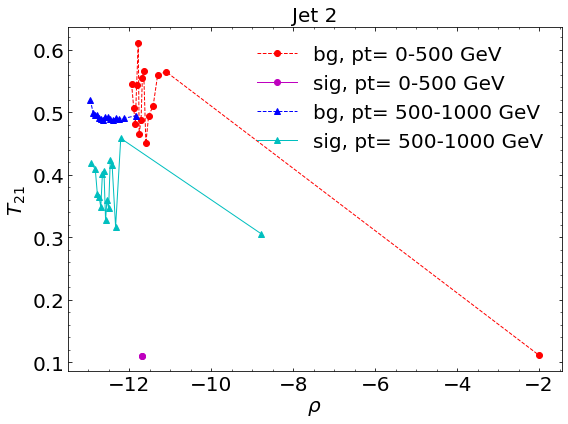

In [26]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_500, avgrho_bgJ2_T21_500, 'o--', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avgrho_sigJ2_ro_500, avgrho_sigJ2_T21_500, 'o-', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avgrho_bgJ2_ro_1000, avgrho_bgJ2_T21_1000, '^--', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avgrho_sigJ2_ro_1000, avgrho_sigJ2_T21_1000, '^-', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

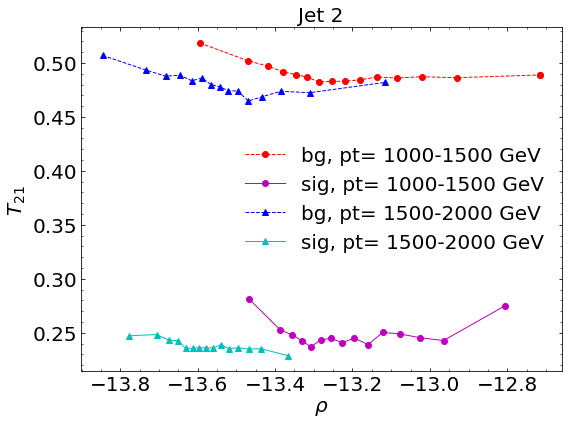

In [27]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_1500, avgrho_bgJ2_T21_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avgrho_sigJ2_ro_1500, avgrho_sigJ2_T21_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avgrho_bgJ2_ro_2000, avgrho_bgJ2_T21_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avgrho_sigJ2_ro_2000, avgrho_sigJ2_T21_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

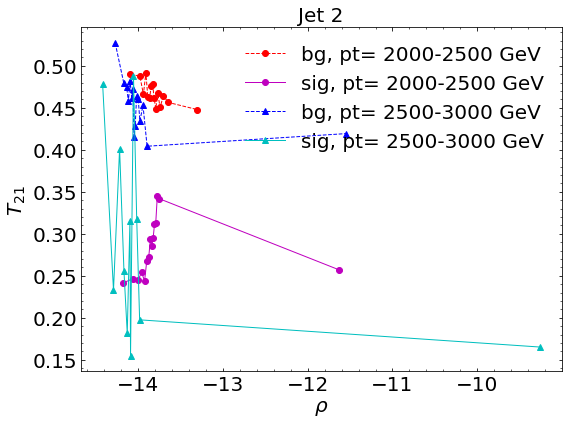

In [28]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_2500, avgrho_bgJ2_T21_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avgrho_sigJ2_ro_2500, avgrho_sigJ2_T21_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avgrho_bgJ2_ro_3000, avgrho_bgJ2_T21_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avgrho_sigJ2_ro_3000, avgrho_sigJ2_T21_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

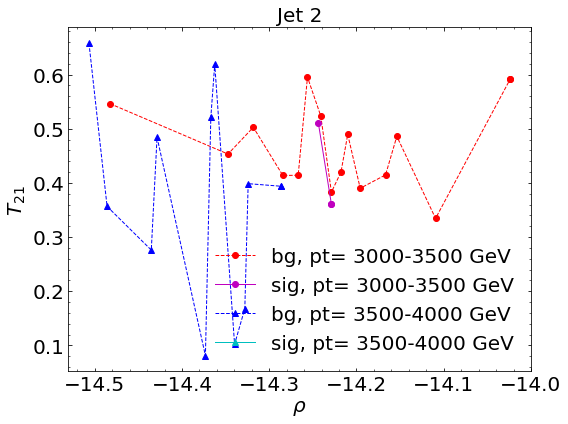

In [29]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_3500, avgrho_bgJ2_T21_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avgrho_sigJ2_ro_3500, avgrho_sigJ2_T21_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avgrho_bgJ2_ro_4000, avgrho_bgJ2_T21_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
plt.plot(avgrho_sigJ2_ro_4000, avgrho_sigJ2_T21_4000, '^-', linewidth=1, color='c', label="sig, pt= 3500-4000 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

In [30]:
grapf_jet1_bg.shape

(1000000, 3)

In [31]:
j1_bg_ro_pt500 = []
j1_bg_t21_pt500 = []

j1_bg_ro_pt1000 = []
j1_bg_t21_pt1000 = []

j1_bg_ro_pt1500 = []
j1_bg_t21_pt1500 = []

j1_bg_ro_pt2000 = []
j1_bg_t21_pt2000 = []

j1_bg_ro_pt2500 = []
j1_bg_t21_pt2500 = []

j1_bg_ro_pt3000 = []
j1_bg_t21_pt3000 = []

j1_bg_ro_pt3500 = []
j1_bg_t21_pt3500 = []

j1_bg_ro_pt4000 = []
j1_bg_t21_pt4000 = []

#1000000
for t in range(1000000):
    if grapf_jet1_bg[t][2] <= 500:
        j1_bg_ro_pt500.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt500.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 500) and (grapf_jet1_bg[t][2] <= 1000):
        j1_bg_ro_pt1000.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt1000.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 1000) and (grapf_jet1_bg[t][2] <= 1500):
        j1_bg_ro_pt1500.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt1500.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 1500) and (grapf_jet1_bg[t][2] <= 2000):
        j1_bg_ro_pt2000.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt2000.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 2000) and (grapf_jet1_bg[t][2] <= 2500):
        j1_bg_ro_pt2500.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt2500.append(grapf_jet1_bg[t][0])
    
    elif (grapf_jet1_bg[t][2] > 2500) and (grapf_jet1_bg[t][2] <= 3000):
        j1_bg_ro_pt3000.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt3000.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 3000) and (grapf_jet1_bg[t][2] <= 3500):
        j1_bg_ro_pt3500.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt3500.append(grapf_jet1_bg[t][0])
        
    else:
        j1_bg_ro_pt4000.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt4000.append(grapf_jet1_bg[t][0])


data_j1_T21_ro_500 = pd.DataFrame({'ro': j1_bg_ro_pt500, 
                                   'T21': j1_bg_t21_pt500})
data_j1_T21_ro_1000 = pd.DataFrame({'ro': j1_bg_ro_pt1000, 
                                    'T21': j1_bg_t21_pt1000})
data_j1_T21_ro_1500 = pd.DataFrame({'ro': j1_bg_ro_pt1500, 
                                    'T21': j1_bg_t21_pt1500})
data_j1_T21_ro_2000 = pd.DataFrame({'ro': j1_bg_ro_pt2000, 
                                    'T21': j1_bg_t21_pt2000})
data_j1_T21_ro_2500 = pd.DataFrame({'ro': j1_bg_ro_pt2500, 
                                    'T21': j1_bg_t21_pt2500})
data_j1_T21_ro_3000 = pd.DataFrame({'ro': j1_bg_ro_pt3000, 
                                    'T21': j1_bg_t21_pt3000})
data_j1_T21_ro_3500 = pd.DataFrame({'ro': j1_bg_ro_pt3500, 
                                    'T21': j1_bg_t21_pt3500})
data_j1_T21_ro_4000 = pd.DataFrame({'ro': j1_bg_ro_pt4000, 
                                    'T21': j1_bg_t21_pt4000})

order_bgJ1_500 = data_j1_T21_ro_500.sort_values('ro')
order_bgJ1_1000 = data_j1_T21_ro_1000.sort_values('ro')
order_bgJ1_1500 = data_j1_T21_ro_1500.sort_values('ro')
order_bgJ1_2000 = data_j1_T21_ro_2000.sort_values('ro')
order_bgJ1_2500 = data_j1_T21_ro_2500.sort_values('ro')
order_bgJ1_3000 = data_j1_T21_ro_3000.sort_values('ro')
order_bgJ1_3500 = data_j1_T21_ro_3500.sort_values('ro')
order_bgJ1_4000 = data_j1_T21_ro_4000.sort_values('ro')



In [33]:
order_bgJ1_1000['ro']
order_bgJ1_500 

,ro,T21
436,-5.823467,0.669203
337,-5.812153,0.872772
34,-5.798047,0.745281
212,-5.789614,0.851576
588,-5.783321,0.750797
...,...,...
48,-4.566187,0.560808
41,-4.555739,0.616024
404,-4.540201,0.679240
510,-4.483910,0.436549


In [34]:
import math

N_bgJ1_500 = math.ceil(len(order_bgJ1_500['T21'])/15)
N_bgJ1_500

42

In [35]:
bgJ1_500 = order_bgJ1_500.to_numpy()
bgJ1_1000 = order_bgJ1_1000.to_numpy()
bgJ1_1500 = order_bgJ1_1500.to_numpy()
bgJ1_2000 = order_bgJ1_2000.to_numpy()
bgJ1_2500 = order_bgJ1_2500.to_numpy()
bgJ1_3000 = order_bgJ1_3000.to_numpy()
bgJ1_3500 = order_bgJ1_3500.to_numpy()
bgJ1_4000 = order_bgJ1_4000.to_numpy()

In [36]:
bgJ1_500[1][1]

0.8727720577114336

In [139]:
avg_bgJ1_T21_500 = []
avg_bgJ1_ro_500 = []

N_bgJ1_500 = math.ceil(len(order_bgJ1_500['T21'])/15)

i = 0
sum_bgJ1_T21_500 = 0
sum_bgJ1_ro_500 = 0

for n in range(len(bgJ1_500)):
    sum_bgJ1_T21_500 = sum_bgJ1_T21_500 + bgJ1_500[n][1]
    sum_bgJ1_ro_500 = sum_bgJ1_ro_500 + bgJ1_500[n][0]      
    i = i+1
        
    if i >= N_bgJ1_500:
            
        avg_bgJ1_T21_500.append(sum_bgJ1_T21_500/N_bgJ1_500)
        avg_bgJ1_ro_500.append(sum_bgJ1_ro_500/N_bgJ1_500)
        sum_bgJ1_T21_500 = 0
        sum_bgJ1_ro_500 = 0
        i = 0
        
    """  """ 
    if n == len(bgJ1_500)-1:
        avg_bgJ1_T21_500.append(sum_bgJ1_T21_500/N_bgJ1_500)
        avg_bgJ1_ro_500.append(sum_bgJ1_ro_500/N_bgJ1_500)
         
    
avg_bgJ1_ro_500
    

[-5.75362796526011,
 -5.715527591456306,
 -5.688902047164635,
 -5.661595202371614,
 -5.636189792134983,
 -5.611535814153017,
 -5.574872160645502,
 -5.541729360948798,
 -5.505548958402739,
 -5.451803285088452,
 -5.379049098212856,
 -5.306246981168844,
 -5.214299475647054,
 -5.091595008050461,
 -3.3168502125180446]

In [38]:


avg_bgJ1_T21_1000 = []
avg_bgJ1_ro_1000 = []

N_bgJ1_1000 = math.ceil(len(order_bgJ1_1000['T21'])/15)

i = 0
sum_bgJ1_T21_1000 = 0
sum_bgJ1_ro_1000 = 0

for n in range(len(bgJ1_1000)):
    sum_bgJ1_T21_1000 = sum_bgJ1_T21_1000 + bgJ1_1000[n][1]
    sum_bgJ1_ro_1000 = sum_bgJ1_ro_1000 + bgJ1_1000[n][0]      
    i = i+1
    
    if n == len(bgJ1_1000)-1:
        avg_bgJ1_T21_1000.append(sum_bgJ1_T21_1000/N_bgJ1_1000)
        avg_bgJ1_ro_1000.append(sum_bgJ1_ro_1000/N_bgJ1_1000)
        
    if i >= N_bgJ1_1000:
        avg_bgJ1_T21_1000.append(sum_bgJ1_T21_1000/N_bgJ1_1000)
        avg_bgJ1_ro_1000.append(sum_bgJ1_ro_1000/N_bgJ1_1000)
        sum_bgJ1_T21_1000 = 0
        sum_bgJ1_ro_1000 = 0
        i = 0

        
avg_bgJ1_T21_1500 = []
avg_bgJ1_ro_1500 = []

N_bgJ1_1500 = math.ceil(len(order_bgJ1_1500['T21'])/15)

i = 0
sum_bgJ1_T21_1500 = 0
sum_bgJ1_ro_1500 = 0

for n in range(len(bgJ1_1500)):
    sum_bgJ1_T21_1500 = sum_bgJ1_T21_1500 + bgJ1_1500[n][1]
    sum_bgJ1_ro_1500 = sum_bgJ1_ro_1500 + bgJ1_1500[n][0]      
    i = i+1
    
    if n == len(bgJ1_1500)-1:
        avg_bgJ1_T21_1500.append(sum_bgJ1_T21_1500/N_bgJ1_1500)
        avg_bgJ1_ro_1500.append(sum_bgJ1_ro_1500/N_bgJ1_1500)
        
    if i >= N_bgJ1_1500:
        avg_bgJ1_T21_1500.append(sum_bgJ1_T21_1500/N_bgJ1_1500)
        avg_bgJ1_ro_1500.append(sum_bgJ1_ro_1500/N_bgJ1_1500)
        sum_bgJ1_T21_1500 = 0
        sum_bgJ1_ro_1500 = 0
        i = 0


        
avg_bgJ1_T21_2000 = []
avg_bgJ1_ro_2000 = []

N_bgJ1_2000 = math.ceil(len(order_bgJ1_2000['T21'])/15)

i = 0
sum_bgJ1_T21_2000 = 0
sum_bgJ1_ro_2000 = 0

for n in range(len(bgJ1_2000)):
    sum_bgJ1_T21_2000 = sum_bgJ1_T21_2000 + bgJ1_2000[n][1]
    sum_bgJ1_ro_2000 = sum_bgJ1_ro_2000 + bgJ1_2000[n][0]      
    i = i+1
    
    if n == len(bgJ1_2000)-1:
        avg_bgJ1_T21_2000.append(sum_bgJ1_T21_2000/N_bgJ1_2000)
        avg_bgJ1_ro_2000.append(sum_bgJ1_ro_2000/N_bgJ1_2000)
        
    if i >= N_bgJ1_2000:
        avg_bgJ1_T21_2000.append(sum_bgJ1_T21_2000/N_bgJ1_2000)
        avg_bgJ1_ro_2000.append(sum_bgJ1_ro_2000/N_bgJ1_2000)
        sum_bgJ1_T21_2000 = 0
        sum_bgJ1_ro_2000 = 0
        i = 0

        
avg_bgJ1_T21_2500 = []
avg_bgJ1_ro_2500 = []

N_bgJ1_2500 = math.ceil(len(order_bgJ1_2500['T21'])/15)

i = 0
sum_bgJ1_T21_2500 = 0
sum_bgJ1_ro_2500 = 0

for n in range(len(bgJ1_2500)):
    sum_bgJ1_T21_2500 = sum_bgJ1_T21_2500 + bgJ1_2500[n][1]
    sum_bgJ1_ro_2500 = sum_bgJ1_ro_2500 + bgJ1_2500[n][0]      
    i = i+1
    
    if n == len(bgJ1_2500)-1:
        avg_bgJ1_T21_2500.append(sum_bgJ1_T21_2500/N_bgJ1_2500)
        avg_bgJ1_ro_2500.append(sum_bgJ1_ro_2500/N_bgJ1_2500)
        
    if i >= N_bgJ1_2500:
        avg_bgJ1_T21_2500.append(sum_bgJ1_T21_2500/N_bgJ1_2500)
        avg_bgJ1_ro_2500.append(sum_bgJ1_ro_2500/N_bgJ1_2500)
        sum_bgJ1_T21_2500 = 0
        sum_bgJ1_ro_2500 = 0
        i = 0


avg_bgJ1_T21_3000 = []
avg_bgJ1_ro_3000 = []

N_bgJ1_3000 = math.ceil(len(order_bgJ1_3000['T21'])/15)

i = 0
sum_bgJ1_T21_3000 = 0
sum_bgJ1_ro_3000 = 0

for n in range(len(bgJ1_3000)):
    sum_bgJ1_T21_3000 = sum_bgJ1_T21_3000 + bgJ1_3000[n][1]
    sum_bgJ1_ro_3000 = sum_bgJ1_ro_3000 + bgJ1_3000[n][0]      
    i = i+1
    
    if n == len(bgJ1_3000)-1:
        avg_bgJ1_T21_3000.append(sum_bgJ1_T21_3000/N_bgJ1_3000)
        avg_bgJ1_ro_3000.append(sum_bgJ1_ro_3000/N_bgJ1_3000)
        
    if i >= N_bgJ1_3000:
        avg_bgJ1_T21_3000.append(sum_bgJ1_T21_3000/N_bgJ1_3000)
        avg_bgJ1_ro_3000.append(sum_bgJ1_ro_3000/N_bgJ1_3000)
        sum_bgJ1_T21_3000 = 0
        sum_bgJ1_ro_3000 = 0
        i = 0

        
avg_bgJ1_T21_3500 = []
avg_bgJ1_ro_3500 = []

N_bgJ1_3500 = math.ceil(len(order_bgJ1_3500['T21'])/15)

i = 0
sum_bgJ1_T21_3500 = 0
sum_bgJ1_ro_3500 = 0

for n in range(len(bgJ1_3500)):
    sum_bgJ1_T21_3500 = sum_bgJ1_T21_3500 + bgJ1_3500[n][1]
    sum_bgJ1_ro_3500 = sum_bgJ1_ro_3500 + bgJ1_3500[n][0]      
    i = i+1
    
    if n == len(bgJ1_3500)-1:
        avg_bgJ1_T21_3500.append(sum_bgJ1_T21_3500/N_bgJ1_3500)
        avg_bgJ1_ro_3500.append(sum_bgJ1_ro_3500/N_bgJ1_3500)
        
    if i >= N_bgJ1_3500:
        avg_bgJ1_T21_3500.append(sum_bgJ1_T21_3500/N_bgJ1_3500)
        avg_bgJ1_ro_3500.append(sum_bgJ1_ro_3500/N_bgJ1_3500)
        sum_bgJ1_T21_3500 = 0
        sum_bgJ1_ro_3500 = 0
        i = 0


avg_bgJ1_T21_4000 = []
avg_bgJ1_ro_4000 = []

N_bgJ1_4000 = math.ceil(len(order_bgJ1_4000['T21'])/15)

i = 0
sum_bgJ1_T21_4000 = 0
sum_bgJ1_ro_4000 = 0

for n in range(len(bgJ1_4000)):
    sum_bgJ1_T21_4000 = sum_bgJ1_T21_4000 + bgJ1_4000[n][1]
    sum_bgJ1_ro_4000 = sum_bgJ1_ro_4000 + bgJ1_4000[n][0]      
    i = i+1
    
    if n == len(bgJ1_4000)-1:
        avg_bgJ1_T21_4000.append(sum_bgJ1_T21_4000/N_bgJ1_4000)
        avg_bgJ1_ro_4000.append(sum_bgJ1_ro_4000/N_bgJ1_4000)
        
    if i >= N_bgJ1_4000:
        avg_bgJ1_T21_4000.append(sum_bgJ1_T21_4000/N_bgJ1_4000)
        avg_bgJ1_ro_4000.append(sum_bgJ1_ro_4000/N_bgJ1_4000)
        sum_bgJ1_T21_4000 = 0
        sum_bgJ1_ro_4000 = 0
        i = 0

In [39]:
grapf_jet1_sig.shape

(100000, 3)

In [40]:
j1_sig_ro_pt500 = []
j1_sig_t21_pt500 = []

j1_sig_ro_pt1000 = []
j1_sig_t21_pt1000 = []

j1_sig_ro_pt1500 = []
j1_sig_t21_pt1500 = []

j1_sig_ro_pt2000 = []
j1_sig_t21_pt2000 = []

j1_sig_ro_pt2500 = []
j1_sig_t21_pt2500 = []

j1_sig_ro_pt3000 = []
j1_sig_t21_pt3000 = []

j1_sig_ro_pt3500 = []
j1_sig_t21_pt3500 = []

j1_sig_ro_pt4000 = []
j1_sig_t21_pt4000 = []

#1000000
for t in range(100000):
    if grapf_jet1_sig[t][2] <= 500:
        j1_sig_ro_pt500.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt500.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 500) and (grapf_jet1_sig[t][2] <= 1000):
        j1_sig_ro_pt1000.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt1000.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 1000) and (grapf_jet1_sig[t][2] <= 1500):
        j1_sig_ro_pt1500.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt1500.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 1500) and (grapf_jet1_sig[t][2] <= 2000):
        j1_sig_ro_pt2000.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt2000.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 2000) and (grapf_jet1_sig[t][2] <= 2500):
        j1_sig_ro_pt2500.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt2500.append(grapf_jet1_sig[t][0])
    
    elif (grapf_jet1_sig[t][2] > 2500) and (grapf_jet1_sig[t][2] <= 3000):
        j1_sig_ro_pt3000.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt3000.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 3000) and (grapf_jet1_sig[t][2] <= 3500):
        j1_sig_ro_pt3500.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt3500.append(grapf_jet1_sig[t][0])
        
    else:
        j1_sig_ro_pt4000.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt4000.append(grapf_jet1_sig[t][0])


data_j1_sig_T21_ro_500 = pd.DataFrame({'ro': j1_sig_ro_pt500, 
                                       'T21': j1_sig_t21_pt500})
data_j1_sig_T21_ro_1000 = pd.DataFrame({'ro': j1_sig_ro_pt1000, 
                                        'T21': j1_sig_t21_pt1000})
data_j1_sig_T21_ro_1500 = pd.DataFrame({'ro': j1_sig_ro_pt1500, 
                                        'T21': j1_sig_t21_pt1500})
data_j1_sig_T21_ro_2000 = pd.DataFrame({'ro': j1_sig_ro_pt2000, 
                                        'T21': j1_sig_t21_pt2000})
data_j1_sig_T21_ro_2500 = pd.DataFrame({'ro': j1_sig_ro_pt2500, 
                                        'T21': j1_sig_t21_pt2500})
data_j1_sig_T21_ro_3000 = pd.DataFrame({'ro': j1_sig_ro_pt3000, 
                                        'T21': j1_sig_t21_pt3000})
data_j1_sig_T21_ro_3500 = pd.DataFrame({'ro': j1_sig_ro_pt3500, 
                                        'T21': j1_sig_t21_pt3500})
data_j1_sig_T21_ro_4000 = pd.DataFrame({'ro': j1_sig_ro_pt4000, 
                                        'T21': j1_sig_t21_pt4000})




In [42]:
order_sigJ1_500 = data_j1_sig_T21_ro_500.sort_values('ro')
order_sigJ1_1000 = data_j1_sig_T21_ro_1000.sort_values('ro')
order_sigJ1_1500 = data_j1_sig_T21_ro_1500.sort_values('ro')
order_sigJ1_2000 = data_j1_sig_T21_ro_2000.sort_values('ro')
order_sigJ1_2500 = data_j1_sig_T21_ro_2500.sort_values('ro')
order_sigJ1_3000 = data_j1_sig_T21_ro_3000.sort_values('ro')
order_sigJ1_3500 = data_j1_sig_T21_ro_3500.sort_values('ro')
order_sigJ1_4000 = data_j1_sig_T21_ro_4000.sort_values('ro')

sigJ1_500 = order_sigJ1_500.to_numpy()
sigJ1_1000 = order_sigJ1_1000.to_numpy()
sigJ1_1500 = order_sigJ1_1500.to_numpy()
sigJ1_2000 = order_sigJ1_2000.to_numpy()
sigJ1_2500 = order_sigJ1_2500.to_numpy()
sigJ1_3000 = order_sigJ1_3000.to_numpy()
sigJ1_3500 = order_sigJ1_3500.to_numpy()
sigJ1_4000 = order_sigJ1_4000.to_numpy()

In [43]:
avg_sigJ1_T21_500 = []
avg_sigJ1_ro_500 = []

avg_sigJ1_T21_1000 = []
avg_sigJ1_ro_1000 = []

avg_sigJ1_T21_1500 = []
avg_sigJ1_ro_1500 = []

avg_sigJ1_T21_2000 = []
avg_sigJ1_ro_2000 = []

avg_sigJ1_T21_2500 = []
avg_sigJ1_ro_2500 = []

avg_sigJ1_T21_3000 = []
avg_sigJ1_ro_3000 = []

avg_sigJ1_T21_3500 = []
avg_sigJ1_ro_3500 = []

avg_sigJ1_T21_4000 = []
avg_sigJ1_ro_4000 = []



N_sigJ1_500 = math.ceil(len(order_sigJ1_500['T21'])/15)

i = 0
sum_sigJ1_T21_500 = 0
sum_sigJ1_ro_500 = 0

for n in range(len(sigJ1_500)):
    sum_sigJ1_T21_500 = sum_sigJ1_T21_500 + sigJ1_500[n][1]
    sum_sigJ1_ro_500 = sum_sigJ1_ro_500 + sigJ1_500[n][0]      
    i = i+1
        
    if i >= N_sigJ1_500:
            
        avg_sigJ1_T21_500.append(sum_sigJ1_T21_500/N_sigJ1_500)
        avg_sigJ1_ro_500.append(sum_sigJ1_ro_500/N_sigJ1_500)
        sum_sigJ1_T21_500 = 0
        sum_sigJ1_ro_500 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_500)-1:
        avg_sigJ1_T21_500.append(sum_sigJ1_T21_500/N_sigJ1_500)
        avg_sigJ1_ro_500.append(sum_sigJ1_ro_500/N_sigJ1_500)
         


N_sigJ1_1000 = math.ceil(len(order_sigJ1_1000['T21'])/15)

i = 0
sum_sigJ1_T21_1000 = 0
sum_sigJ1_ro_1000 = 0

for n in range(len(sigJ1_1000)):
    sum_sigJ1_T21_1000 = sum_sigJ1_T21_1000 + sigJ1_1000[n][1]
    sum_sigJ1_ro_1000 = sum_sigJ1_ro_1000 + sigJ1_1000[n][0]      
    i = i+1
        
    if i >= N_sigJ1_1000:
            
        avg_sigJ1_T21_1000.append(sum_sigJ1_T21_1000/N_sigJ1_1000)
        avg_sigJ1_ro_1000.append(sum_sigJ1_ro_1000/N_sigJ1_1000)
        sum_sigJ1_T21_1000 = 0
        sum_sigJ1_ro_1000 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_1000)-1:
        avg_sigJ1_T21_1000.append(sum_sigJ1_T21_1000/N_sigJ1_1000)
        avg_sigJ1_ro_1000.append(sum_sigJ1_ro_1000/N_sigJ1_1000)
        
        
        
N_sigJ1_1500 = math.ceil(len(order_sigJ1_1500['T21'])/15)

i = 0
sum_sigJ1_T21_1500 = 0
sum_sigJ1_ro_1500 = 0

for n in range(len(sigJ1_1500)):
    sum_sigJ1_T21_1500 = sum_sigJ1_T21_1500 + sigJ1_1500[n][1]
    sum_sigJ1_ro_1500 = sum_sigJ1_ro_1500 + sigJ1_1500[n][0]      
    i = i+1
        
    if i >= N_sigJ1_1500:
            
        avg_sigJ1_T21_1500.append(sum_sigJ1_T21_1500/N_sigJ1_1500)
        avg_sigJ1_ro_1500.append(sum_sigJ1_ro_1500/N_sigJ1_1500)
        sum_sigJ1_T21_1500 = 0
        sum_sigJ1_ro_1500 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_1500)-1:
        avg_sigJ1_T21_1500.append(sum_sigJ1_T21_1500/N_sigJ1_1500)
        avg_sigJ1_ro_1500.append(sum_sigJ1_ro_1500/N_sigJ1_1500)
        
        
        
N_sigJ1_2000 = math.ceil(len(order_sigJ1_2000['T21'])/15)

i = 0
sum_sigJ1_T21_2000 = 0
sum_sigJ1_ro_2000 = 0

for n in range(len(sigJ1_2000)):
    sum_sigJ1_T21_2000 = sum_sigJ1_T21_2000 + sigJ1_2000[n][1]
    sum_sigJ1_ro_2000 = sum_sigJ1_ro_2000 + sigJ1_2000[n][0]      
    i = i+1
        
    if i >= N_sigJ1_2000:
            
        avg_sigJ1_T21_2000.append(sum_sigJ1_T21_2000/N_sigJ1_2000)
        avg_sigJ1_ro_2000.append(sum_sigJ1_ro_2000/N_sigJ1_2000)
        sum_sigJ1_T21_2000 = 0
        sum_sigJ1_ro_2000 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_2000)-1:
        avg_sigJ1_T21_2000.append(sum_sigJ1_T21_2000/N_sigJ1_2000)
        avg_sigJ1_ro_2000.append(sum_sigJ1_ro_2000/N_sigJ1_2000)
        
        
        
N_sigJ1_2500 = math.ceil(len(order_sigJ1_2500['T21'])/15)

i = 0
sum_sigJ1_T21_2500 = 0
sum_sigJ1_ro_2500 = 0

for n in range(len(sigJ1_2500)):
    sum_sigJ1_T21_2500 = sum_sigJ1_T21_2500 + sigJ1_2500[n][1]
    sum_sigJ1_ro_2500 = sum_sigJ1_ro_2500 + sigJ1_2500[n][0]      
    i = i+1
        
    if i >= N_sigJ1_2500:
            
        avg_sigJ1_T21_2500.append(sum_sigJ1_T21_2500/N_sigJ1_2500)
        avg_sigJ1_ro_2500.append(sum_sigJ1_ro_2500/N_sigJ1_2500)
        sum_sigJ1_T21_2500 = 0
        sum_sigJ1_ro_2500 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_2500)-1:
        avg_sigJ1_T21_2500.append(sum_sigJ1_T21_2500/N_sigJ1_2500)
        avg_sigJ1_ro_2500.append(sum_sigJ1_ro_2500/N_sigJ1_2500)
        
        

N_sigJ1_3000 = math.ceil(len(order_sigJ1_3000['T21'])/15)

i = 0
sum_sigJ1_T21_3000 = 0
sum_sigJ1_ro_3000 = 0

for n in range(len(sigJ1_3000)):
    sum_sigJ1_T21_3000 = sum_sigJ1_T21_3000 + sigJ1_3000[n][1]
    sum_sigJ1_ro_3000 = sum_sigJ1_ro_3000 + sigJ1_3000[n][0]      
    i = i+1
        
    if i >= N_sigJ1_3000:
            
        avg_sigJ1_T21_3000.append(sum_sigJ1_T21_3000/N_sigJ1_3000)
        avg_sigJ1_ro_3000.append(sum_sigJ1_ro_3000/N_sigJ1_3000)
        sum_sigJ1_T21_3000 = 0
        sum_sigJ1_ro_3000 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_3000)-1:
        avg_sigJ1_T21_3000.append(sum_sigJ1_T21_3000/N_sigJ1_3000)
        avg_sigJ1_ro_3000.append(sum_sigJ1_ro_3000/N_sigJ1_3000)
        
        
        
N_sigJ1_3500 = math.ceil(len(order_sigJ1_3500['T21'])/15)

i = 0
sum_sigJ1_T21_3500 = 0
sum_sigJ1_ro_3500 = 0

for n in range(len(sigJ1_3500)):
    sum_sigJ1_T21_3500 = sum_sigJ1_T21_3500 + sigJ1_3500[n][1]
    sum_sigJ1_ro_3500 = sum_sigJ1_ro_3500 + sigJ1_3500[n][0]      
    i = i+1
        
    if i >= N_sigJ1_3500:
            
        avg_sigJ1_T21_3500.append(sum_sigJ1_T21_3500/N_sigJ1_3500)
        avg_sigJ1_ro_3500.append(sum_sigJ1_ro_3500/N_sigJ1_3500)
        sum_sigJ1_T21_3500 = 0
        sum_sigJ1_ro_3500 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_3500)-1:
        avg_sigJ1_T21_3500.append(sum_sigJ1_T21_3500/N_sigJ1_3500)
        avg_sigJ1_ro_3500.append(sum_sigJ1_ro_3500/N_sigJ1_3500)
        
        

N_sigJ1_4000 = math.ceil(len(order_sigJ1_4000['T21'])/15)

i = 0
sum_sigJ1_T21_4000 = 0
sum_sigJ1_ro_4000 = 0

for n in range(len(sigJ1_4000)):
    sum_sigJ1_T21_4000 = sum_sigJ1_T21_4000 + sigJ1_4000[n][1]
    sum_sigJ1_ro_4000 = sum_sigJ1_ro_4000 + sigJ1_4000[n][0]      
    i = i+1
        
    if i >= N_sigJ1_4000:
            
        avg_sigJ1_T21_4000.append(sum_sigJ1_T21_4000/N_sigJ1_4000)
        avg_sigJ1_ro_4000.append(sum_sigJ1_ro_4000/N_sigJ1_4000)
        sum_sigJ1_T21_4000 = 0
        sum_sigJ1_ro_4000 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_4000)-1:
        avg_sigJ1_T21_4000.append(sum_sigJ1_T21_4000/N_sigJ1_4000)
        avg_sigJ1_ro_4000.append(sum_sigJ1_ro_4000/N_sigJ1_4000)

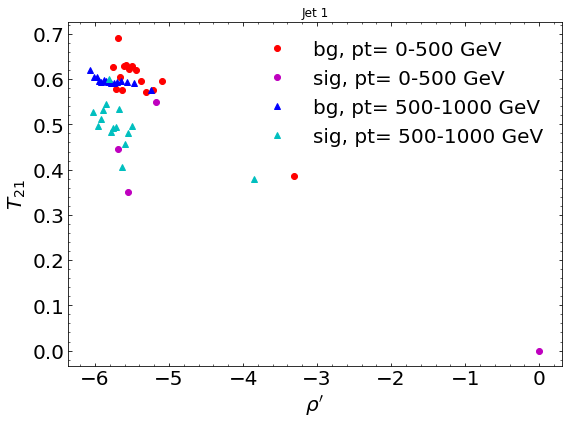

In [44]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_500, avg_bgJ1_T21_500, 'o', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avg_sigJ1_ro_500, avg_sigJ1_T21_500, 'o', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avg_bgJ1_ro_1000, avg_bgJ1_T21_1000, '^', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avg_sigJ1_ro_1000, avg_sigJ1_T21_1000, '^', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")

#plt.plot(avg_sigJ1_ro_1500, avg_sigJ1_T21_1500, 'v-', linewidth=1, color='g', label="sig, pt= 1000-1500")
#plt.plot(avg_sigJ1_ro_2000, avg_sigJ1_T21_2000, '*-', linewidth=1, color='m', label="sig, pt= 1500-2000")

plt.title("Jet 1")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

(0.0, 1.0)

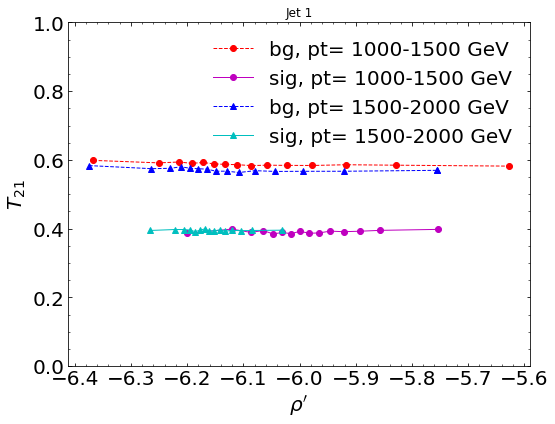

In [45]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_1500, avg_bgJ1_T21_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avg_sigJ1_ro_1500, avg_sigJ1_T21_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avg_bgJ1_ro_2000, avg_bgJ1_T21_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avg_sigJ1_ro_2000, avg_sigJ1_T21_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")


plt.title("Jet 1")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

(-6.7, -4.5)

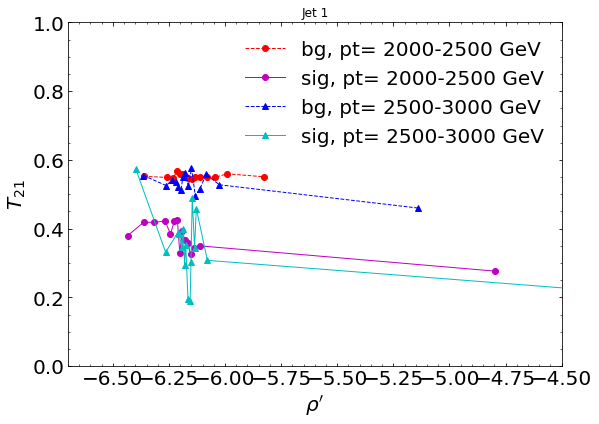

In [46]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_2500, avg_bgJ1_T21_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avg_sigJ1_ro_2500, avg_sigJ1_T21_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avg_bgJ1_ro_3000, avg_bgJ1_T21_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avg_sigJ1_ro_3000, avg_sigJ1_T21_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")


plt.title("Jet 1")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])
plt.xlim([-6.7,-4.5])

(0.0, 1.0)

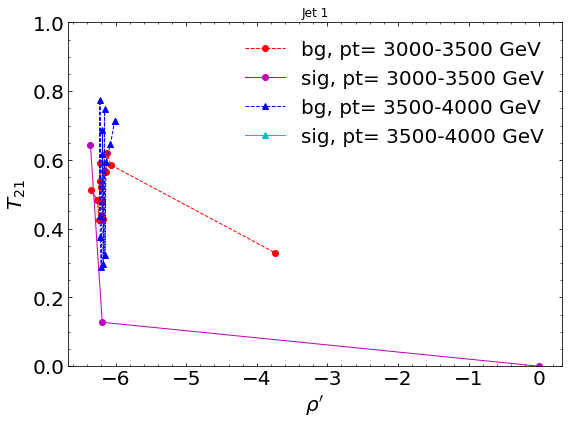

In [47]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_3500, avg_bgJ1_T21_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avg_sigJ1_ro_3500, avg_sigJ1_T21_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avg_bgJ1_ro_4000, avg_bgJ1_T21_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
plt.plot(avg_sigJ1_ro_4000, avg_sigJ1_T21_4000, '^-', linewidth=1, color='c', label="sig, pt= 3500-4000 GeV")


plt.title("Jet 1")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

In [48]:
alpha = 0.1

def load_data_J2(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    
    #ro
    dataset["rojTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    


    dataset = dataset.fillna(0)
    dataset = dataset[["tau21jTwo", "rojTwo", "pTjTwo"]]
    return dataset.to_numpy()


In [49]:
grapf_jet2_bg = load_data_J2(features_bg)
grapf_jet2_sig = load_data_J2(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2440632181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2440632181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [50]:
grapf_jet2_bg.shape

(1000000, 3)

In [51]:
j2_bg_ro_pt500 = []
j2_bg_t21_pt500 = []

j2_bg_ro_pt1000 = []
j2_bg_t21_pt1000 = []

j2_bg_ro_pt1500 = []
j2_bg_t21_pt1500 = []

j2_bg_ro_pt2000 = []
j2_bg_t21_pt2000 = []

j2_bg_ro_pt2500 = []
j2_bg_t21_pt2500 = []

j2_bg_ro_pt3000 = []
j2_bg_t21_pt3000 = []

j2_bg_ro_pt3500 = []
j2_bg_t21_pt3500 = []

j2_bg_ro_pt4000 = []
j2_bg_t21_pt4000 = []

#1000000
for t in range(1000000):
    if grapf_jet2_bg[t][2] <= 500:
        j2_bg_ro_pt500.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt500.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 500) and (grapf_jet2_bg[t][2] <= 1000):
        j2_bg_ro_pt1000.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt1000.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 1000) and (grapf_jet2_bg[t][2] <= 1500):
        j2_bg_ro_pt1500.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt1500.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 1500) and (grapf_jet2_bg[t][2] <= 2000):
        j2_bg_ro_pt2000.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt2000.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 2000) and (grapf_jet2_bg[t][2] <= 2500):
        j2_bg_ro_pt2500.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt2500.append(grapf_jet2_bg[t][0])
    
    elif (grapf_jet2_bg[t][2] > 2500) and (grapf_jet2_bg[t][2] <= 3000):
        j2_bg_ro_pt3000.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt3000.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 3000) and (grapf_jet2_bg[t][2] <= 3500):
        j2_bg_ro_pt3500.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt3500.append(grapf_jet2_bg[t][0])
        
    else:
        j2_bg_ro_pt4000.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt4000.append(grapf_jet2_bg[t][0])


data_j2_T21_ro_500 = pd.DataFrame({'ro': j2_bg_ro_pt500, 
                                   'T21': j2_bg_t21_pt500})
data_j2_T21_ro_1000 = pd.DataFrame({'ro': j2_bg_ro_pt1000, 
                                    'T21': j2_bg_t21_pt1000})
data_j2_T21_ro_1500 = pd.DataFrame({'ro': j2_bg_ro_pt1500, 
                                    'T21': j2_bg_t21_pt1500})
data_j2_T21_ro_2000 = pd.DataFrame({'ro': j2_bg_ro_pt2000, 
                                    'T21': j2_bg_t21_pt2000})
data_j2_T21_ro_2500 = pd.DataFrame({'ro': j2_bg_ro_pt2500, 
                                    'T21': j2_bg_t21_pt2500})
data_j2_T21_ro_3000 = pd.DataFrame({'ro': j2_bg_ro_pt3000, 
                                    'T21': j2_bg_t21_pt3000})
data_j2_T21_ro_3500 = pd.DataFrame({'ro': j2_bg_ro_pt3500, 
                                    'T21': j2_bg_t21_pt3500})
data_j2_T21_ro_4000 = pd.DataFrame({'ro': j2_bg_ro_pt4000, 
                                    'T21': j2_bg_t21_pt4000})


order_bgJ2_500 = data_j2_T21_ro_500.sort_values('ro')
order_bgJ2_1000 = data_j2_T21_ro_1000.sort_values('ro')
order_bgJ2_1500 = data_j2_T21_ro_1500.sort_values('ro')
order_bgJ2_2000 = data_j2_T21_ro_2000.sort_values('ro')
order_bgJ2_2500 = data_j2_T21_ro_2500.sort_values('ro')
order_bgJ2_3000 = data_j2_T21_ro_3000.sort_values('ro')
order_bgJ2_3500 = data_j2_T21_ro_3500.sort_values('ro')
order_bgJ2_4000 = data_j2_T21_ro_4000.sort_values('ro')

bgJ2_500 = order_bgJ2_500.to_numpy()
bgJ2_1000 = order_bgJ2_1000.to_numpy()
bgJ2_1500 = order_bgJ2_1500.to_numpy()
bgJ2_2000 = order_bgJ2_2000.to_numpy()
bgJ2_2500 = order_bgJ2_2500.to_numpy()
bgJ2_3000 = order_bgJ2_3000.to_numpy()
bgJ2_3500 = order_bgJ2_3500.to_numpy()
bgJ2_4000 = order_bgJ2_4000.to_numpy()

In [54]:
avg_bgJ2_T21_500 = []
avg_bgJ2_ro_500 = []

N_bgJ2_500 = math.ceil(len(order_bgJ2_500['T21'])/15)

i = 0
sum_bgJ2_T21_500 = 0
sum_bgJ2_ro_500 = 0

for n in range(len(bgJ2_500)):
    sum_bgJ2_T21_500 = sum_bgJ2_T21_500 + bgJ2_500[n][1]
    sum_bgJ2_ro_500 = sum_bgJ2_ro_500 + bgJ2_500[n][0]      
    i = i+1
        
    if i >= N_bgJ2_500:
            
        avg_bgJ2_T21_500.append(sum_bgJ2_T21_500/N_bgJ2_500)
        avg_bgJ2_ro_500.append(sum_bgJ2_ro_500/N_bgJ2_500)
        sum_bgJ2_T21_500 = 0
        sum_bgJ2_ro_500 = 0
        i = 0
        
    """  """ 
    if n == len(bgJ2_500)-1:
        avg_bgJ2_T21_500.append(sum_bgJ2_T21_500/N_bgJ2_500)
        avg_bgJ2_ro_500.append(sum_bgJ2_ro_500/N_bgJ2_500)
         
    
avg_bgJ2_T21_1000 = []
avg_bgJ2_ro_1000 = []

N_bgJ2_1000 = math.ceil(len(order_bgJ2_1000['T21'])/15)

i = 0
sum_bgJ2_T21_1000 = 0
sum_bgJ2_ro_1000 = 0

for n in range(len(bgJ2_1000)):
    sum_bgJ2_T21_1000 = sum_bgJ2_T21_1000 + bgJ2_1000[n][1]
    sum_bgJ2_ro_1000 = sum_bgJ2_ro_1000 + bgJ2_1000[n][0]      
    i = i+1
    
    if n == len(bgJ2_1000)-1:
        avg_bgJ2_T21_1000.append(sum_bgJ2_T21_1000/N_bgJ2_1000)
        avg_bgJ2_ro_1000.append(sum_bgJ2_ro_1000/N_bgJ2_1000)
        
    if i >= N_bgJ2_1000:
        avg_bgJ2_T21_1000.append(sum_bgJ2_T21_1000/N_bgJ2_1000)
        avg_bgJ2_ro_1000.append(sum_bgJ2_ro_1000/N_bgJ2_1000)
        sum_bgJ2_T21_1000 = 0
        sum_bgJ2_ro_1000 = 0
        i = 0

        
avg_bgJ2_T21_1500 = []
avg_bgJ2_ro_1500 = []

N_bgJ2_1500 = math.ceil(len(order_bgJ2_1500['T21'])/15)

i = 0
sum_bgJ2_T21_1500 = 0
sum_bgJ2_ro_1500 = 0

for n in range(len(bgJ2_1500)):
    sum_bgJ2_T21_1500 = sum_bgJ2_T21_1500 + bgJ2_1500[n][1]
    sum_bgJ2_ro_1500 = sum_bgJ2_ro_1500 + bgJ2_1500[n][0]      
    i = i+1
    
    if n == len(bgJ2_1500)-1:
        avg_bgJ2_T21_1500.append(sum_bgJ2_T21_1500/N_bgJ2_1500)
        avg_bgJ2_ro_1500.append(sum_bgJ2_ro_1500/N_bgJ2_1500)
        
    if i >= N_bgJ2_1500:
        avg_bgJ2_T21_1500.append(sum_bgJ2_T21_1500/N_bgJ2_1500)
        avg_bgJ2_ro_1500.append(sum_bgJ2_ro_1500/N_bgJ2_1500)
        sum_bgJ2_T21_1500 = 0
        sum_bgJ2_ro_1500 = 0
        i = 0


        
avg_bgJ2_T21_2000 = []
avg_bgJ2_ro_2000 = []

N_bgJ2_2000 = math.ceil(len(order_bgJ2_2000['T21'])/15)

i = 0
sum_bgJ2_T21_2000 = 0
sum_bgJ2_ro_2000 = 0

for n in range(len(bgJ2_2000)):
    sum_bgJ2_T21_2000 = sum_bgJ2_T21_2000 + bgJ2_2000[n][1]
    sum_bgJ2_ro_2000 = sum_bgJ2_ro_2000 + bgJ2_2000[n][0]      
    i = i+1
    
    if n == len(bgJ2_2000)-1:
        avg_bgJ2_T21_2000.append(sum_bgJ2_T21_2000/N_bgJ2_2000)
        avg_bgJ2_ro_2000.append(sum_bgJ2_ro_2000/N_bgJ2_2000)
        
    if i >= N_bgJ2_2000:
        avg_bgJ2_T21_2000.append(sum_bgJ2_T21_2000/N_bgJ2_2000)
        avg_bgJ2_ro_2000.append(sum_bgJ2_ro_2000/N_bgJ2_2000)
        sum_bgJ2_T21_2000 = 0
        sum_bgJ2_ro_2000 = 0
        i = 0

        
avg_bgJ2_T21_2500 = []
avg_bgJ2_ro_2500 = []

N_bgJ2_2500 = math.ceil(len(order_bgJ2_2500['T21'])/15)

i = 0
sum_bgJ2_T21_2500 = 0
sum_bgJ2_ro_2500 = 0

for n in range(len(bgJ2_2500)):
    sum_bgJ2_T21_2500 = sum_bgJ2_T21_2500 + bgJ2_2500[n][1]
    sum_bgJ2_ro_2500 = sum_bgJ2_ro_2500 + bgJ2_2500[n][0]      
    i = i+1
    
    if n == len(bgJ2_2500)-1:
        avg_bgJ2_T21_2500.append(sum_bgJ2_T21_2500/N_bgJ2_2500)
        avg_bgJ2_ro_2500.append(sum_bgJ2_ro_2500/N_bgJ2_2500)
        
    if i >= N_bgJ2_2500:
        avg_bgJ2_T21_2500.append(sum_bgJ2_T21_2500/N_bgJ2_2500)
        avg_bgJ2_ro_2500.append(sum_bgJ2_ro_2500/N_bgJ2_2500)
        sum_bgJ2_T21_2500 = 0
        sum_bgJ2_ro_2500 = 0
        i = 0


avg_bgJ2_T21_3000 = []
avg_bgJ2_ro_3000 = []

N_bgJ2_3000 = math.ceil(len(order_bgJ2_3000['T21'])/15)

i = 0
sum_bgJ2_T21_3000 = 0
sum_bgJ2_ro_3000 = 0

for n in range(len(bgJ2_3000)):
    sum_bgJ2_T21_3000 = sum_bgJ2_T21_3000 + bgJ2_3000[n][1]
    sum_bgJ2_ro_3000 = sum_bgJ2_ro_3000 + bgJ2_3000[n][0]      
    i = i+1
    
    if n == len(bgJ2_3000)-1:
        avg_bgJ2_T21_3000.append(sum_bgJ2_T21_3000/N_bgJ2_3000)
        avg_bgJ2_ro_3000.append(sum_bgJ2_ro_3000/N_bgJ2_3000)
        
    if i >= N_bgJ2_3000:
        avg_bgJ2_T21_3000.append(sum_bgJ2_T21_3000/N_bgJ2_3000)
        avg_bgJ2_ro_3000.append(sum_bgJ2_ro_3000/N_bgJ2_3000)
        sum_bgJ2_T21_3000 = 0
        sum_bgJ2_ro_3000 = 0
        i = 0

        
avg_bgJ2_T21_3500 = []
avg_bgJ2_ro_3500 = []

N_bgJ2_3500 = math.ceil(len(order_bgJ2_3500['T21'])/15)

i = 0
sum_bgJ2_T21_3500 = 0
sum_bgJ2_ro_3500 = 0

for n in range(len(bgJ2_3500)):
    sum_bgJ2_T21_3500 = sum_bgJ2_T21_3500 + bgJ2_3500[n][1]
    sum_bgJ2_ro_3500 = sum_bgJ2_ro_3500 + bgJ2_3500[n][0]      
    i = i+1
    
    if n == len(bgJ2_3500)-1:
        avg_bgJ2_T21_3500.append(sum_bgJ2_T21_3500/N_bgJ2_3500)
        avg_bgJ2_ro_3500.append(sum_bgJ2_ro_3500/N_bgJ2_3500)
        
    if i >= N_bgJ2_3500:
        avg_bgJ2_T21_3500.append(sum_bgJ2_T21_3500/N_bgJ2_3500)
        avg_bgJ2_ro_3500.append(sum_bgJ2_ro_3500/N_bgJ2_3500)
        sum_bgJ2_T21_3500 = 0
        sum_bgJ2_ro_3500 = 0
        i = 0


avg_bgJ2_T21_4000 = []
avg_bgJ2_ro_4000 = []

N_bgJ2_4000 = math.ceil(len(order_bgJ2_4000['T21'])/15)

i = 0
sum_bgJ2_T21_4000 = 0
sum_bgJ2_ro_4000 = 0

for n in range(len(bgJ2_4000)):
    sum_bgJ2_T21_4000 = sum_bgJ2_T21_4000 + bgJ2_4000[n][1]
    sum_bgJ2_ro_4000 = sum_bgJ2_ro_4000 + bgJ2_4000[n][0]      
    i = i+1
    
    if n == len(bgJ2_4000)-1:
        avg_bgJ2_T21_4000.append(sum_bgJ2_T21_4000/N_bgJ2_4000)
        avg_bgJ2_ro_4000.append(sum_bgJ2_ro_4000/N_bgJ2_4000)
        
    if i >= N_bgJ2_4000:
        avg_bgJ2_T21_4000.append(sum_bgJ2_T21_4000/N_bgJ2_4000)
        avg_bgJ2_ro_4000.append(sum_bgJ2_ro_4000/N_bgJ2_4000)
        sum_bgJ2_T21_4000 = 0
        sum_bgJ2_ro_4000 = 0
        i = 0
    

In [55]:
j2_sig_ro_pt500 = []
j2_sig_t21_pt500 = []

j2_sig_ro_pt1000 = []
j2_sig_t21_pt1000 = []

j2_sig_ro_pt1500 = []
j2_sig_t21_pt1500 = []

j2_sig_ro_pt2000 = []
j2_sig_t21_pt2000 = []

j2_sig_ro_pt2500 = []
j2_sig_t21_pt2500 = []

j2_sig_ro_pt3000 = []
j2_sig_t21_pt3000 = []

j2_sig_ro_pt3500 = []
j2_sig_t21_pt3500 = []

j2_sig_ro_pt4000 = []
j2_sig_t21_pt4000 = []

#1000000
for t in range(100000):
    if grapf_jet2_sig[t][2] <= 500:
        j2_sig_ro_pt500.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt500.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 500) and (grapf_jet2_sig[t][2] <= 1000):
        j2_sig_ro_pt1000.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt1000.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 1000) and (grapf_jet2_sig[t][2] <= 1500):
        j2_sig_ro_pt1500.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt1500.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 1500) and (grapf_jet2_sig[t][2] <= 2000):
        j2_sig_ro_pt2000.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt2000.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 2000) and (grapf_jet2_sig[t][2] <= 2500):
        j2_sig_ro_pt2500.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt2500.append(grapf_jet2_sig[t][0])
    
    elif (grapf_jet2_sig[t][2] > 2500) and (grapf_jet2_sig[t][2] <= 3000):
        j2_sig_ro_pt3000.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt3000.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 3000) and (grapf_jet2_sig[t][2] <= 3500):
        j2_sig_ro_pt3500.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt3500.append(grapf_jet2_sig[t][0])
        
    else:
        j2_sig_ro_pt4000.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt4000.append(grapf_jet2_sig[t][0])


data_j2_sig_T21_ro_500 = pd.DataFrame({'ro': j2_sig_ro_pt500, 
                                       'T21': j2_sig_t21_pt500})
data_j2_sig_T21_ro_1000 = pd.DataFrame({'ro': j2_sig_ro_pt1000, 
                                        'T21': j2_sig_t21_pt1000})
data_j2_sig_T21_ro_1500 = pd.DataFrame({'ro': j2_sig_ro_pt1500, 
                                        'T21': j2_sig_t21_pt1500})
data_j2_sig_T21_ro_2000 = pd.DataFrame({'ro': j2_sig_ro_pt2000, 
                                        'T21': j2_sig_t21_pt2000})
data_j2_sig_T21_ro_2500 = pd.DataFrame({'ro': j2_sig_ro_pt2500, 
                                        'T21': j2_sig_t21_pt2500})
data_j2_sig_T21_ro_3000 = pd.DataFrame({'ro': j2_sig_ro_pt3000, 
                                        'T21': j2_sig_t21_pt3000})
data_j2_sig_T21_ro_3500 = pd.DataFrame({'ro': j2_sig_ro_pt3500, 
                                        'T21': j2_sig_t21_pt3500})
data_j2_sig_T21_ro_4000 = pd.DataFrame({'ro': j2_sig_ro_pt4000, 
                                        'T21': j2_sig_t21_pt4000})


order_sigJ2_500 = data_j2_sig_T21_ro_500.sort_values('ro')
order_sigJ2_1000 = data_j2_sig_T21_ro_1000.sort_values('ro')
order_sigJ2_1500 = data_j2_sig_T21_ro_1500.sort_values('ro')
order_sigJ2_2000 = data_j2_sig_T21_ro_2000.sort_values('ro')
order_sigJ2_2500 = data_j2_sig_T21_ro_2500.sort_values('ro')
order_sigJ2_3000 = data_j2_sig_T21_ro_3000.sort_values('ro')
order_sigJ2_3500 = data_j2_sig_T21_ro_3500.sort_values('ro')
order_sigJ2_4000 = data_j2_sig_T21_ro_4000.sort_values('ro')


sigJ2_500 = order_sigJ2_500.to_numpy()
sigJ2_1000 = order_sigJ2_1000.to_numpy()
sigJ2_1500 = order_sigJ2_1500.to_numpy()
sigJ2_2000 = order_sigJ2_2000.to_numpy()
sigJ2_2500 = order_sigJ2_2500.to_numpy()
sigJ2_3000 = order_sigJ2_3000.to_numpy()
sigJ2_3500 = order_sigJ2_3500.to_numpy()
sigJ2_4000 = order_sigJ2_4000.to_numpy()

In [58]:
avg_sigJ2_T21_500 = []
avg_sigJ2_ro_500 = []

avg_sigJ2_T21_1000 = []
avg_sigJ2_ro_1000 = []

avg_sigJ2_T21_1500 = []
avg_sigJ2_ro_1500 = []

avg_sigJ2_T21_2000 = []
avg_sigJ2_ro_2000 = []

avg_sigJ2_T21_2500 = []
avg_sigJ2_ro_2500 = []

avg_sigJ2_T21_3000 = []
avg_sigJ2_ro_3000 = []

avg_sigJ2_T21_3500 = []
avg_sigJ2_ro_3500 = []

avg_sigJ2_T21_4000 = []
avg_sigJ2_ro_4000 = []



N_sigJ2_500 = math.ceil(len(order_sigJ2_500['T21'])/15)

i = 0
sum_sigJ2_T21_500 = 0
sum_sigJ2_ro_500 = 0

for n in range(len(sigJ2_500)):
    sum_sigJ2_T21_500 = sum_sigJ2_T21_500 + sigJ2_500[n][1]
    sum_sigJ2_ro_500 = sum_sigJ2_ro_500 + sigJ2_500[n][0]      
    i = i+1
    
    if n == len(sigJ2_500)-1:
        avg_sigJ2_T21_500.append(sum_sigJ2_T21_500/N_sigJ2_500)
        avg_sigJ2_ro_500.append(sum_sigJ2_ro_500/N_sigJ2_500)
        
    if i >= N_sigJ2_500:
            
        avg_sigJ2_T21_500.append(sum_sigJ2_T21_500/N_sigJ2_500)
        avg_sigJ2_ro_500.append(sum_sigJ2_ro_500/N_sigJ2_500)
        sum_sigJ2_T21_500 = 0
        sum_sigJ2_ro_500 = 0
        i = 0
    
         

N_sigJ2_1000 = math.ceil(len(order_sigJ2_1000['T21'])/15)

i = 0
sum_sigJ2_T21_1000 = 0
sum_sigJ2_ro_1000 = 0

for n in range(len(sigJ2_1000)):
    sum_sigJ2_T21_1000 = sum_sigJ2_T21_1000 + sigJ2_1000[n][1]
    sum_sigJ2_ro_1000 = sum_sigJ2_ro_1000 + sigJ2_1000[n][0]      
    i = i+1
    
    if n == len(sigJ2_1000)-1:
        avg_sigJ2_T21_1000.append(sum_sigJ2_T21_1000/N_sigJ2_1000)
        avg_sigJ2_ro_1000.append(sum_sigJ2_ro_1000/N_sigJ2_1000)
        
    if i >= N_sigJ2_1000:           
        avg_sigJ2_T21_1000.append(sum_sigJ2_T21_1000/N_sigJ2_1000)
        avg_sigJ2_ro_1000.append(sum_sigJ2_ro_1000/N_sigJ2_1000)
        sum_sigJ2_T21_1000 = 0
        sum_sigJ2_ro_1000 = 0
        i = 0
        
    """  """ 

N_sigJ2_1500 = math.ceil(len(order_sigJ2_1500['T21'])/15)

i = 0
sum_sigJ2_T21_1500 = 0
sum_sigJ2_ro_1500 = 0

for n in range(len(sigJ2_1500)):
    sum_sigJ2_T21_1500 = sum_sigJ2_T21_1500 + sigJ2_1500[n][1]
    sum_sigJ2_ro_1500 = sum_sigJ2_ro_1500 + sigJ2_1500[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_1500)-1:
        avg_sigJ2_T21_1500.append(sum_sigJ2_T21_1500/N_sigJ2_1500)
        avg_sigJ2_ro_1500.append(sum_sigJ2_ro_1500/N_sigJ2_1500)
        
    if i >= N_sigJ2_1500:
            
        avg_sigJ2_T21_1500.append(sum_sigJ2_T21_1500/N_sigJ2_1500)
        avg_sigJ2_ro_1500.append(sum_sigJ2_ro_1500/N_sigJ2_1500)
        sum_sigJ2_T21_1500 = 0
        sum_sigJ2_ro_1500 = 0
        i = 0
      
        
        
N_sigJ2_2000 = math.ceil(len(order_sigJ2_2000['T21'])/15)

i = 0
sum_sigJ2_T21_2000 = 0
sum_sigJ2_ro_2000 = 0

for n in range(len(sigJ2_2000)):
    sum_sigJ2_T21_2000 = sum_sigJ2_T21_2000 + sigJ2_2000[n][1]
    sum_sigJ2_ro_2000 = sum_sigJ2_ro_2000 + sigJ2_2000[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_2000)-1:
        avg_sigJ2_T21_2000.append(sum_sigJ2_T21_2000/N_sigJ2_2000)
        avg_sigJ2_ro_2000.append(sum_sigJ2_ro_2000/N_sigJ2_2000)
        
    if i >= N_sigJ2_2000:
            
        avg_sigJ2_T21_2000.append(sum_sigJ2_T21_2000/N_sigJ2_2000)
        avg_sigJ2_ro_2000.append(sum_sigJ2_ro_2000/N_sigJ2_2000)
        sum_sigJ2_T21_2000 = 0
        sum_sigJ2_ro_2000 = 0
        i = 0
       
        
N_sigJ2_2500 = math.ceil(len(order_sigJ2_2500['T21'])/15)

i = 0
sum_sigJ2_T21_2500 = 0
sum_sigJ2_ro_2500 = 0

for n in range(len(sigJ2_2500)):
    sum_sigJ2_T21_2500 = sum_sigJ2_T21_2500 + sigJ2_2500[n][1]
    sum_sigJ2_ro_2500 = sum_sigJ2_ro_2500 + sigJ2_2500[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_2500)-1:
        avg_sigJ2_T21_2500.append(sum_sigJ2_T21_2500/N_sigJ2_2500)
        avg_sigJ2_ro_2500.append(sum_sigJ2_ro_2500/N_sigJ2_2500)

        
    if i >= N_sigJ2_2500:
            
        avg_sigJ2_T21_2500.append(sum_sigJ2_T21_2500/N_sigJ2_2500)
        avg_sigJ2_ro_2500.append(sum_sigJ2_ro_2500/N_sigJ2_2500)
        sum_sigJ2_T21_2500 = 0
        sum_sigJ2_ro_2500 = 0
        i = 0

        
        
N_sigJ2_3000 = math.ceil(len(order_sigJ2_3000['T21'])/15)

i = 0
sum_sigJ2_T21_3000 = 0
sum_sigJ2_ro_3000 = 0

for n in range(len(sigJ2_3000)):
    sum_sigJ2_T21_3000 = sum_sigJ2_T21_3000 + sigJ2_3000[n][1]
    sum_sigJ2_ro_3000 = sum_sigJ2_ro_3000 + sigJ2_3000[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_3000)-1:
        avg_sigJ2_T21_3000.append(sum_sigJ2_T21_3000/N_sigJ2_3000)
        avg_sigJ2_ro_3000.append(sum_sigJ2_ro_3000/N_sigJ2_3000)
 
        
    if i >= N_sigJ2_3000:
            
        avg_sigJ2_T21_3000.append(sum_sigJ2_T21_3000/N_sigJ2_3000)
        avg_sigJ2_ro_3000.append(sum_sigJ2_ro_3000/N_sigJ2_3000)
        sum_sigJ2_T21_3000 = 0
        sum_sigJ2_ro_3000 = 0
        i = 0
       
        
        
N_sigJ2_3500 = math.ceil(len(order_sigJ2_3500['T21'])/15)

i = 0
sum_sigJ2_T21_3500 = 0
sum_sigJ2_ro_3500 = 0

for n in range(len(sigJ2_3500)):
    sum_sigJ2_T21_3500 = sum_sigJ2_T21_3500 + sigJ2_3500[n][1]
    sum_sigJ2_ro_3500 = sum_sigJ2_ro_3500 + sigJ2_3500[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_3500)-1:
        avg_sigJ2_T21_3500.append(sum_sigJ2_T21_3500/N_sigJ2_3500)
        avg_sigJ2_ro_3500.append(sum_sigJ2_ro_3500/N_sigJ2_3500)
       
        
    if i >= N_sigJ2_3500:
            
        avg_sigJ2_T21_3500.append(sum_sigJ2_T21_3500/N_sigJ2_3500)
        avg_sigJ2_ro_3500.append(sum_sigJ2_ro_3500/N_sigJ2_3500)
        sum_sigJ2_T21_3500 = 0
        sum_sigJ2_ro_3500 = 0
        i = 0
 
        

N_sig2_4000 = math.ceil(len(order_sigJ2_4000['T21'])/15)

i = 0
sum_sigJ2_T21_4000 = 0
sum_sigJ2_ro_4000 = 0

for n in range(len(sigJ2_4000)):
    sum_sigJ2_T21_4000 = sum_sigJ2_T21_4000 + sigJ2_4000[n][1]
    sum_sigJ2_ro_4000 = sum_sigJ2_ro_4000 + sigJ2_4000[n][0]      
    i = i+1
    
    if n == len(sigJ2_4000)-1:
        avg_sigJ2_T21_4000.append(sum_sigJ2_T21_4000/N_sigJ2_4000)
        avg_sigJ2_ro_4000.append(sum_sigJ2_ro_4000/N_sigJ2_4000)
        
    if i >= N_sigJ2_4000:
            
        avg_sigJ2_T21_4000.append(sum_sigJ2_T21_4000/N_sigJ2_4000)
        avg_sigJ2_ro_4000.append(sum_sigJ2_ro_4000/N_sigJ2_4000)
        sum_sigJ2_T21_4000 = 0
        sum_sigJ2_ro_4000 = 0
        i = 0
        
   

(0.0, 1.0)

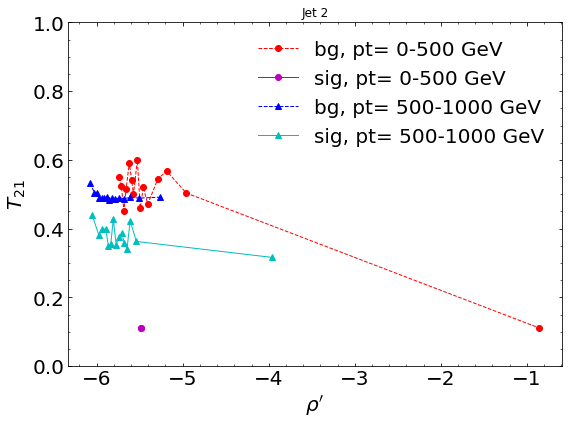

In [59]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_500, avg_bgJ2_T21_500, 'o--', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avg_sigJ2_ro_500, avg_sigJ2_T21_500, 'o-', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avg_bgJ2_ro_1000, avg_bgJ2_T21_1000, '^--', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avg_sigJ2_ro_1000, avg_sigJ2_T21_1000, '^-', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")


plt.title("Jet 2")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

(0.0, 1.0)

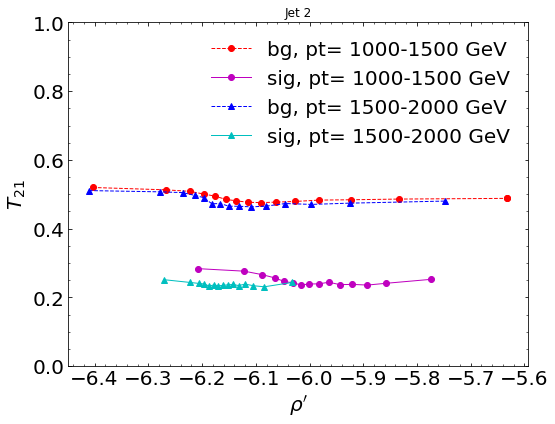

In [60]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_1500, avg_bgJ2_T21_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avg_sigJ2_ro_1500, avg_sigJ2_T21_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avg_bgJ2_ro_2000, avg_bgJ2_T21_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avg_sigJ2_ro_2000, avg_sigJ2_T21_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")


plt.title("Jet 2")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

(0.0, 1.0)

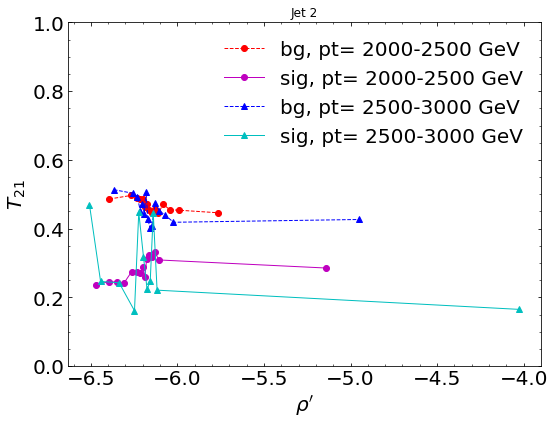

In [61]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_2500, avg_bgJ2_T21_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avg_sigJ2_ro_2500, avg_sigJ2_T21_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avg_bgJ2_ro_3000, avg_bgJ2_T21_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avg_sigJ2_ro_3000, avg_sigJ2_T21_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")


plt.title("Jet 2")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

(0.0, 1.0)

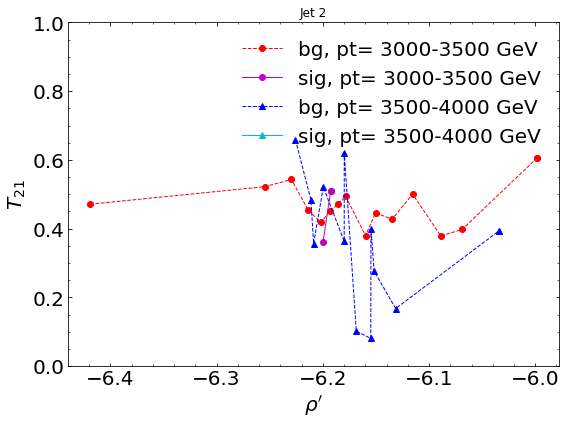

In [62]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_3500, avg_bgJ2_T21_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avg_sigJ2_ro_3500, avg_sigJ2_T21_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avg_bgJ2_ro_4000, avg_bgJ2_T21_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
plt.plot(avg_sigJ2_ro_4000, avg_sigJ2_T21_4000, '^-', linewidth=1, color='c', label="sig, pt= 3500-4000 GeV")


plt.title("Jet 2")
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

In [63]:
from sklearn.linear_model import LinearRegression

reglin_J1_bg_500 = LinearRegression()
ro_J1_bg_500 = np.array(avg_bgJ1_ro_500)
t21_J1_bg_500 = np.array(avg_bgJ1_T21_500)

reglin_J1_bg_500.fit(ro_J1_bg_500.reshape(-1, 1), t21_J1_bg_500)

b_J1_bg_500 = reglin_J1_bg_500.coef_[0]

T21prim_J1_bg_500 = []

for n in range(len(ro_J1_bg_500)):
    T21prim_J1_bg_500.append(t21_J1_bg_500[n]-ro_J1_bg_500[n]*b_J1_bg_500)
    

    
reglin_J1_bg_1000 = LinearRegression()
ro_J1_bg_1000 = np.array(avg_bgJ1_ro_1000)
t21_J1_bg_1000 = np.array(avg_bgJ1_T21_1000)

reglin_J1_bg_1000.fit(ro_J1_bg_1000.reshape(-1, 1), t21_J1_bg_1000)

b_J1_bg_1000 = reglin_J1_bg_1000.coef_[0]

T21prim_J1_bg_1000 = []

for n in range(len(ro_J1_bg_1000)):
    T21prim_J1_bg_1000.append(t21_J1_bg_1000[n]-ro_J1_bg_1000[n]*b_J1_bg_1000)
    

    
reglin_J1_bg_1500 = LinearRegression()
ro_J1_bg_1500 = np.array(avg_bgJ1_ro_1500)
t21_J1_bg_1500 = np.array(avg_bgJ1_T21_1500)

reglin_J1_bg_1500.fit(ro_J1_bg_1500.reshape(-1, 1), t21_J1_bg_1500)

b_J1_bg_1500 = reglin_J1_bg_1500.coef_[0]

T21prim_J1_bg_1500 = []

for n in range(len(ro_J1_bg_1500)):
    T21prim_J1_bg_1500.append(t21_J1_bg_1500[n]-ro_J1_bg_1500[n]*b_J1_bg_1500)
    

    
reglin_J1_bg_2000 = LinearRegression()
ro_J1_bg_2000 = np.array(avg_bgJ1_ro_2000)
t21_J1_bg_2000 = np.array(avg_bgJ1_T21_2000)

reglin_J1_bg_2000.fit(ro_J1_bg_2000.reshape(-1, 1), t21_J1_bg_2000)

b_J1_bg_2000 = reglin_J1_bg_2000.coef_[0]

T21prim_J1_bg_2000 = []

for n in range(len(ro_J1_bg_2000)):
    T21prim_J1_bg_2000.append(t21_J1_bg_2000[n]-ro_J1_bg_2000[n]*b_J1_bg_2000)
    

    
reglin_J1_bg_2500 = LinearRegression()
ro_J1_bg_2500 = np.array(avg_bgJ1_ro_2500)
t21_J1_bg_2500 = np.array(avg_bgJ1_T21_2500)

reglin_J1_bg_2500.fit(ro_J1_bg_2500.reshape(-1, 1), t21_J1_bg_2500)

b_J1_bg_2500 = reglin_J1_bg_2500.coef_[0]

T21prim_J1_bg_2500 = []

for n in range(len(ro_J1_bg_2500)):
    T21prim_J1_bg_2500.append(t21_J1_bg_2500[n]-ro_J1_bg_2500[n]*b_J1_bg_2500)
    

    
reglin_J1_bg_3000 = LinearRegression()
ro_J1_bg_3000 = np.array(avg_bgJ1_ro_3000)
t21_J1_bg_3000 = np.array(avg_bgJ1_T21_3000)

reglin_J1_bg_3000.fit(ro_J1_bg_3000.reshape(-1, 1), t21_J1_bg_3000)

b_J1_bg_3000 = reglin_J1_bg_3000.coef_[0]

T21prim_J1_bg_3000 = []

for n in range(len(ro_J1_bg_3000)):
    T21prim_J1_bg_3000.append(t21_J1_bg_3000[n]-ro_J1_bg_3000[n]*b_J1_bg_3000)
    

    
reglin_J1_bg_3500 = LinearRegression()
ro_J1_bg_3500 = np.array(avg_bgJ1_ro_3500)
t21_J1_bg_3500 = np.array(avg_bgJ1_T21_3500)

reglin_J1_bg_3500.fit(ro_J1_bg_3500.reshape(-1, 1), t21_J1_bg_3500)

b_J1_bg_3500 = reglin_J1_bg_3500.coef_[0]

T21prim_J1_bg_3500 = []

for n in range(len(ro_J1_bg_3500)):
    T21prim_J1_bg_3500.append(t21_J1_bg_3500[n]-ro_J1_bg_3500[n]*b_J1_bg_3500)
    

    
reglin_J1_bg_4000 = LinearRegression()
ro_J1_bg_4000 = np.array(avg_bgJ1_ro_4000)
t21_J1_bg_4000 = np.array(avg_bgJ1_T21_4000)

reglin_J1_bg_4000.fit(ro_J1_bg_4000.reshape(-1, 1), t21_J1_bg_4000)

b_J1_bg_4000 = reglin_J1_bg_4000.coef_[0]

T21prim_J1_bg_4000 = []

for n in range(len(ro_J1_bg_4000)):
    T21prim_J1_bg_4000.append(t21_J1_bg_4000[n]-ro_J1_bg_4000[n]*b_J1_bg_4000)

In [64]:


reglin_J1_sig_500 = LinearRegression()
ro_J1_sig_500 = np.array(avg_sigJ1_ro_500)
t21_J1_sig_500 = np.array(avg_sigJ1_T21_500)

reglin_J1_sig_500.fit(ro_J1_sig_500.reshape(-1, 1), t21_J1_sig_500)

b_J1_sig_500 = reglin_J1_sig_500.coef_[0]

T21prim_J1_sig_500 = []

for n in range(len(ro_J1_sig_500)):
    T21prim_J1_sig_500.append(t21_J1_sig_500[n]-ro_J1_sig_500[n]*b_J1_sig_500)
    

    
reglin_J1_sig_1000 = LinearRegression()
ro_J1_sig_1000 = np.array(avg_sigJ1_ro_1000)
t21_J1_sig_1000 = np.array(avg_sigJ1_T21_1000)

reglin_J1_sig_1000.fit(ro_J1_sig_1000.reshape(-1, 1), t21_J1_sig_1000)

b_J1_sig_1000 = reglin_J1_sig_1000.coef_[0]

T21prim_J1_sig_1000 = []

for n in range(len(ro_J1_sig_1000)):
    T21prim_J1_sig_1000.append(t21_J1_sig_1000[n]-ro_J1_sig_1000[n]*b_J1_sig_1000)
    

    
reglin_J1_sig_1500 = LinearRegression()
ro_J1_sig_1500 = np.array(avg_sigJ1_ro_1500)
t21_J1_sig_1500 = np.array(avg_sigJ1_T21_1500)

reglin_J1_sig_1500.fit(ro_J1_sig_1500.reshape(-1, 1), t21_J1_sig_1500)

b_J1_sig_1500 = reglin_J1_sig_1500.coef_[0]

T21prim_J1_sig_1500 = []

for n in range(len(ro_J1_sig_1500)):
    T21prim_J1_sig_1500.append(t21_J1_sig_1500[n]-ro_J1_sig_1500[n]*b_J1_sig_1500)
    

    
reglin_J1_sig_2000 = LinearRegression()
ro_J1_sig_2000 = np.array(avg_sigJ1_ro_2000)
t21_J1_sig_2000 = np.array(avg_sigJ1_T21_2000)

reglin_J1_sig_2000.fit(ro_J1_sig_2000.reshape(-1, 1), t21_J1_sig_2000)

b_J1_sig_2000 = reglin_J1_sig_2000.coef_[0]

T21prim_J1_sig_2000 = []

for n in range(len(ro_J1_sig_2000)):
    T21prim_J1_sig_2000.append(t21_J1_sig_2000[n]-ro_J1_sig_2000[n]*b_J1_sig_2000)
    

    
reglin_J1_sig_2500 = LinearRegression()
ro_J1_sig_2500 = np.array(avg_sigJ1_ro_2500)
t21_J1_sig_2500 = np.array(avg_sigJ1_T21_2500)

reglin_J1_sig_2500.fit(ro_J1_sig_2500.reshape(-1, 1), t21_J1_sig_2500)

b_J1_sig_2500 = reglin_J1_sig_2500.coef_[0]

T21prim_J1_sig_2500 = []

for n in range(len(ro_J1_sig_2500)):
    T21prim_J1_sig_2500.append(t21_J1_sig_2500[n]-ro_J1_sig_2500[n]*b_J1_sig_2500)
    

    
reglin_J1_sig_3000 = LinearRegression()
ro_J1_sig_3000 = np.array(avg_sigJ1_ro_3000)
t21_J1_sig_3000 = np.array(avg_sigJ1_T21_3000)

reglin_J1_sig_3000.fit(ro_J1_sig_3000.reshape(-1, 1), t21_J1_sig_3000)

b_J1_sig_3000 = reglin_J1_sig_3000.coef_[0]

T21prim_J1_sig_3000 = []

for n in range(len(ro_J1_sig_3000)):
    T21prim_J1_sig_3000.append(t21_J1_sig_3000[n]-ro_J1_sig_3000[n]*b_J1_sig_3000)
    

    
reglin_J1_sig_3500 = LinearRegression()
ro_J1_sig_3500 = np.array(avg_sigJ1_ro_3500)
t21_J1_sig_3500 = np.array(avg_sigJ1_T21_3500)

reglin_J1_sig_3500.fit(ro_J1_sig_3500.reshape(-1, 1), t21_J1_sig_3500)

b_J1_sig_3500 = reglin_J1_sig_3500.coef_[0]

T21prim_J1_sig_3500 = []

for n in range(len(ro_J1_sig_3500)):
    T21prim_J1_sig_3500.append(t21_J1_sig_3500[n]-ro_J1_sig_3500[n]*b_J1_sig_3500)
    

"""    
reglin_J1_sig_4000 = LinearRegression()
ro_J1_sig_4000 = np.array(avg_sigJ1_ro_4000)
t21_J1_sig_4000 = np.array(avg_sigJ1_T21_4000)

reglin_J1_sig_4000.fit(ro_J1_sig_4000.reshape(-1, 1), t21_J1_sig_4000)

b_J1_sig_4000 = reglin_J1_sig_4000.coef_[0]

T21prim_J1_sig_4000 = []

for n in range(len(ro_J1_sig_4000)):
    T21prim_J1_sig_4000.append(t21_J1_sig_4000[n]-ro_J1_sig_4000[n]*b_J1_sig_4000)
"""

'    \nreglin_J1_sig_4000 = LinearRegression()\nro_J1_sig_4000 = np.array(avg_sigJ1_ro_4000)\nt21_J1_sig_4000 = np.array(avg_sigJ1_T21_4000)\n\nreglin_J1_sig_4000.fit(ro_J1_sig_4000.reshape(-1, 1), t21_J1_sig_4000)\n\nb_J1_sig_4000 = reglin_J1_sig_4000.coef_[0]\n\nT21prim_J1_sig_4000 = []\n\nfor n in range(len(ro_J1_sig_4000)):\n    T21prim_J1_sig_4000.append(t21_J1_sig_4000[n]-ro_J1_sig_4000[n]*b_J1_sig_4000)\n'

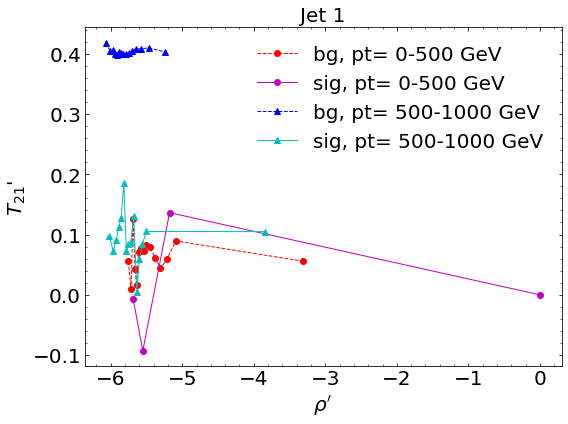

In [65]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_500, T21prim_J1_bg_500, 'o--', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avg_sigJ1_ro_500, T21prim_J1_sig_500, 'o-', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avg_bgJ1_ro_1000, T21prim_J1_bg_1000, '^--', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avg_sigJ1_ro_1000, T21prim_J1_sig_1000, '^-', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")

plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

(0.0, 1.0)

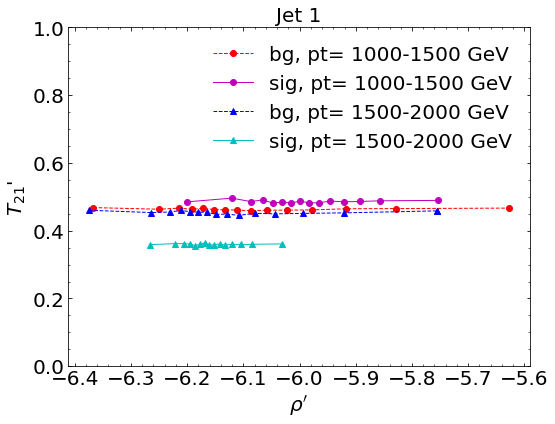

In [66]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_1500, T21prim_J1_bg_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avg_sigJ1_ro_1500, T21prim_J1_sig_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avg_bgJ1_ro_2000, T21prim_J1_bg_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avg_sigJ1_ro_2000, T21prim_J1_sig_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
plt.ylim([0,1])

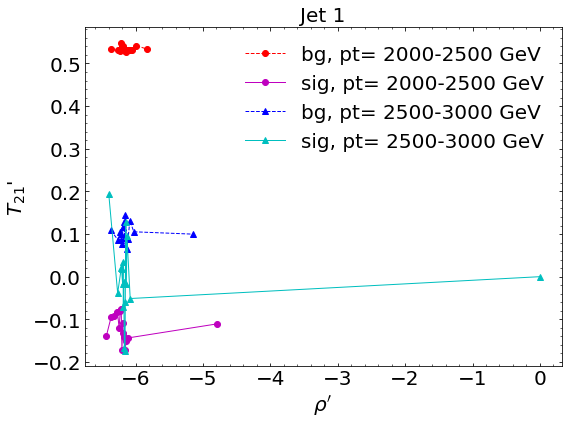

In [67]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_2500, T21prim_J1_bg_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avg_sigJ1_ro_2500, T21prim_J1_sig_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avg_bgJ1_ro_3000, T21prim_J1_bg_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avg_sigJ1_ro_3000, T21prim_J1_sig_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")

plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

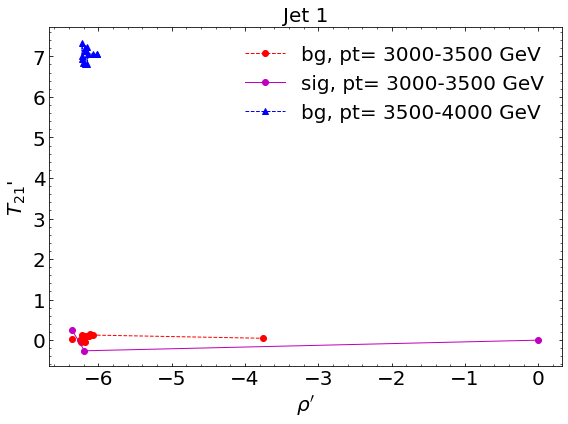

In [68]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_3500, T21prim_J1_bg_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avg_sigJ1_ro_3500, T21prim_J1_sig_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avg_bgJ1_ro_4000, T21prim_J1_bg_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
#plt.plot(avg_sigJ1_ro_2000, T21prim_J1_sig_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

In [69]:
reglin_J2_bg_500 = LinearRegression()
ro_J2_bg_500 = np.array(avg_bgJ2_ro_500)
t21_J2_bg_500 = np.array(avg_bgJ2_T21_500)

reglin_J2_bg_500.fit(ro_J2_bg_500.reshape(-1, 1), t21_J2_bg_500)

b_J2_bg_500 = reglin_J2_bg_500.coef_[0]

T21prim_J2_bg_500 = []

for n in range(len(ro_J2_bg_500)):
    T21prim_J2_bg_500.append(t21_J2_bg_500[n]-ro_J2_bg_500[n]*b_J2_bg_500)
    

    
reglin_J2_bg_1000 = LinearRegression()
ro_J2_bg_1000 = np.array(avg_bgJ2_ro_1000)
t21_J2_bg_1000 = np.array(avg_bgJ2_T21_1000)

reglin_J2_bg_1000.fit(ro_J2_bg_1000.reshape(-1, 1), t21_J2_bg_1000)

b_J2_bg_1000 = reglin_J2_bg_1000.coef_[0]

T21prim_J2_bg_1000 = []

for n in range(len(ro_J2_bg_1000)):
    T21prim_J2_bg_1000.append(t21_J2_bg_1000[n]-ro_J2_bg_1000[n]*b_J2_bg_1000)
    

    
reglin_J2_bg_1500 = LinearRegression()
ro_J2_bg_1500 = np.array(avg_bgJ2_ro_1500)
t21_J2_bg_1500 = np.array(avg_bgJ2_T21_1500)

reglin_J2_bg_1500.fit(ro_J2_bg_1500.reshape(-1, 1), t21_J2_bg_1500)

b_J2_bg_1500 = reglin_J2_bg_1500.coef_[0]

T21prim_J2_bg_1500 = []

for n in range(len(ro_J2_bg_1500)):
    T21prim_J2_bg_1500.append(t21_J2_bg_1500[n]-ro_J2_bg_1500[n]*b_J2_bg_1500)
    

    
reglin_J2_bg_2000 = LinearRegression()
ro_J2_bg_2000 = np.array(avg_bgJ2_ro_2000)
t21_J2_bg_2000 = np.array(avg_bgJ2_T21_2000)

reglin_J2_bg_2000.fit(ro_J2_bg_2000.reshape(-1, 1), t21_J2_bg_2000)

b_J2_bg_2000 = reglin_J2_bg_2000.coef_[0]

T21prim_J2_bg_2000 = []

for n in range(len(ro_J2_bg_2000)):
    T21prim_J2_bg_2000.append(t21_J2_bg_2000[n]-ro_J2_bg_2000[n]*b_J2_bg_2000)
    

    
reglin_J2_bg_2500 = LinearRegression()
ro_J2_bg_2500 = np.array(avg_bgJ2_ro_2500)
t21_J2_bg_2500 = np.array(avg_bgJ2_T21_2500)

reglin_J2_bg_2500.fit(ro_J2_bg_2500.reshape(-1, 1), t21_J2_bg_2500)

b_J2_bg_2500 = reglin_J2_bg_2500.coef_[0]

T21prim_J2_bg_2500 = []

for n in range(len(ro_J2_bg_2500)):
    T21prim_J2_bg_2500.append(t21_J2_bg_2500[n]-ro_J2_bg_2500[n]*b_J2_bg_2500)
    

    
reglin_J2_bg_3000 = LinearRegression()
ro_J2_bg_3000 = np.array(avg_bgJ2_ro_3000)
t21_J2_bg_3000 = np.array(avg_bgJ2_T21_3000)

reglin_J2_bg_3000.fit(ro_J2_bg_3000.reshape(-1, 1), t21_J2_bg_3000)

b_J2_bg_3000 = reglin_J2_bg_3000.coef_[0]

T21prim_J2_bg_3000 = []

for n in range(len(ro_J2_bg_3000)):
    T21prim_J2_bg_3000.append(t21_J2_bg_3000[n]-ro_J2_bg_3000[n]*b_J2_bg_3000)
    

    
reglin_J2_bg_3500 = LinearRegression()
ro_J2_bg_3500 = np.array(avg_bgJ2_ro_3500)
t21_J2_bg_3500 = np.array(avg_bgJ2_T21_3500)

reglin_J2_bg_3500.fit(ro_J2_bg_3500.reshape(-1, 1), t21_J2_bg_3500)

b_J2_bg_3500 = reglin_J2_bg_3500.coef_[0]

T21prim_J2_bg_3500 = []

for n in range(len(ro_J2_bg_3500)):
    T21prim_J2_bg_3500.append(t21_J2_bg_3500[n]-ro_J2_bg_3500[n]*b_J2_bg_3500)
    

    
reglin_J2_bg_4000 = LinearRegression()
ro_J2_bg_4000 = np.array(avg_bgJ2_ro_4000)
t21_J2_bg_4000 = np.array(avg_bgJ2_T21_4000)

reglin_J2_bg_4000.fit(ro_J2_bg_4000.reshape(-1, 1), t21_J2_bg_4000)

b_J2_bg_4000 = reglin_J2_bg_4000.coef_[0]

T21prim_J2_bg_4000 = []

for n in range(len(ro_J2_bg_4000)):
    T21prim_J2_bg_4000.append(t21_J2_bg_4000[n]-ro_J2_bg_4000[n]*b_J2_bg_4000)

In [70]:


reglin_J2_sig_500 = LinearRegression()
ro_J2_sig_500 = np.array(avg_sigJ2_ro_500)
t21_J2_sig_500 = np.array(avg_sigJ2_T21_500)

reglin_J2_sig_500.fit(ro_J2_sig_500.reshape(-1, 1), t21_J2_sig_500)

b_J2_sig_500 = reglin_J2_sig_500.coef_[0]

T21prim_J2_sig_500 = []

for n in range(len(ro_J2_sig_500)):
    T21prim_J2_sig_500.append(t21_J2_sig_500[n]-ro_J2_sig_500[n]*b_J2_sig_500)
    

    
reglin_J2_sig_1000 = LinearRegression()
ro_J2_sig_1000 = np.array(avg_sigJ2_ro_1000)
t21_J2_sig_1000 = np.array(avg_sigJ2_T21_1000)

reglin_J2_sig_1000.fit(ro_J2_sig_1000.reshape(-1, 1), t21_J2_sig_1000)

b_J2_sig_1000 = reglin_J2_sig_1000.coef_[0]

T21prim_J2_sig_1000 = []

for n in range(len(ro_J2_sig_1000)):
    T21prim_J2_sig_1000.append(t21_J2_sig_1000[n]-ro_J2_sig_1000[n]*b_J2_sig_1000)
    

    
reglin_J2_sig_1500 = LinearRegression()
ro_J2_sig_1500 = np.array(avg_sigJ2_ro_1500)
t21_J2_sig_1500 = np.array(avg_sigJ2_T21_1500)

reglin_J2_sig_1500.fit(ro_J2_sig_1500.reshape(-1, 1), t21_J2_sig_1500)

b_J2_sig_1500 = reglin_J2_sig_1500.coef_[0]

T21prim_J2_sig_1500 = []

for n in range(len(ro_J2_sig_1500)):
    T21prim_J2_sig_1500.append(t21_J2_sig_1500[n]-ro_J2_sig_1500[n]*b_J2_sig_1500)
    

    
reglin_J2_sig_2000 = LinearRegression()
ro_J2_sig_2000 = np.array(avg_sigJ2_ro_2000)
t21_J2_sig_2000 = np.array(avg_sigJ2_T21_2000)

reglin_J2_sig_2000.fit(ro_J2_sig_2000.reshape(-1, 1), t21_J2_sig_2000)

b_J2_sig_2000 = reglin_J2_sig_2000.coef_[0]

T21prim_J2_sig_2000 = []

for n in range(len(ro_J2_sig_2000)):
    T21prim_J2_sig_2000.append(t21_J2_sig_2000[n]-ro_J2_sig_2000[n]*b_J2_sig_2000)
    

    
reglin_J2_sig_2500 = LinearRegression()
ro_J2_sig_2500 = np.array(avg_sigJ2_ro_2500)
t21_J2_sig_2500 = np.array(avg_sigJ2_T21_2500)

reglin_J2_sig_2500.fit(ro_J2_sig_2500.reshape(-1, 1), t21_J2_sig_2500)

b_J2_sig_2500 = reglin_J2_sig_2500.coef_[0]

T21prim_J2_sig_2500 = []

for n in range(len(ro_J2_sig_2500)):
    T21prim_J2_sig_2500.append(t21_J2_sig_2500[n]-ro_J2_sig_2500[n]*b_J2_sig_2500)
    

    
reglin_J2_sig_3000 = LinearRegression()
ro_J2_sig_3000 = np.array(avg_sigJ2_ro_3000)
t21_J2_sig_3000 = np.array(avg_sigJ2_T21_3000)

reglin_J2_sig_3000.fit(ro_J2_sig_3000.reshape(-1, 1), t21_J2_sig_3000)

b_J2_sig_3000 = reglin_J2_sig_3000.coef_[0]

T21prim_J2_sig_3000 = []

for n in range(len(ro_J2_sig_3000)):
    T21prim_J2_sig_3000.append(t21_J2_sig_3000[n]-ro_J2_sig_3000[n]*b_J2_sig_3000)
    

    
reglin_J2_sig_3500 = LinearRegression()
ro_J2_sig_3500 = np.array(avg_sigJ2_ro_3500)
t21_J2_sig_3500 = np.array(avg_sigJ2_T21_3500)

reglin_J2_sig_3500.fit(ro_J2_sig_3500.reshape(-1, 1), t21_J2_sig_3500)

b_J2_sig_3500 = reglin_J2_sig_3500.coef_[0]

T21prim_J2_sig_3500 = []

for n in range(len(ro_J2_sig_3500)):
    T21prim_J2_sig_3500.append(t21_J2_sig_3500[n]-ro_J2_sig_3500[n]*b_J2_sig_3500)

    
"""   
reglin_J2_sig_4000 = LinearRegression()
ro_J2_sig_4000 = np.array(avg_sigJ2_ro_4000)
t21_J2_sig_4000 = np.array(avg_sigJ2_T21_4000)

reglin_J2_sig_4000.fit(ro_J2_sig_4000.reshape(-1, 1), t21_J2_sig_4000)

b_J2_sig_4000 = reglin_J2_sig_4000.coef_[0]

T21prim_J2_sig_4000 = []

for n in range(len(ro_J2_sig_4000)):
    T21prim_J2_sig_4000.append(t21_J2_sig_4000[n]-ro_J2_sig_4000[n]*b_J2_sig_4000)
"""

'   \nreglin_J2_sig_4000 = LinearRegression()\nro_J2_sig_4000 = np.array(avg_sigJ2_ro_4000)\nt21_J2_sig_4000 = np.array(avg_sigJ2_T21_4000)\n\nreglin_J2_sig_4000.fit(ro_J2_sig_4000.reshape(-1, 1), t21_J2_sig_4000)\n\nb_J2_sig_4000 = reglin_J2_sig_4000.coef_[0]\n\nT21prim_J2_sig_4000 = []\n\nfor n in range(len(ro_J2_sig_4000)):\n    T21prim_J2_sig_4000.append(t21_J2_sig_4000[n]-ro_J2_sig_4000[n]*b_J2_sig_4000)\n'

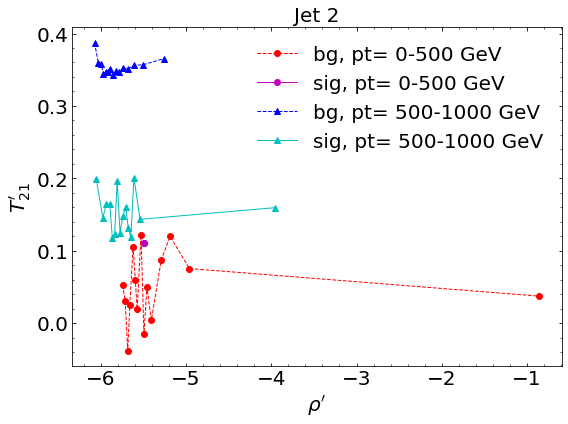

In [71]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_500, T21prim_J2_bg_500, 'o--', linewidth=1, color='r', label="bg, pt= 0-500 GeV")
plt.plot(avg_sigJ2_ro_500, T21prim_J2_sig_500, 'o-', linewidth=1, color='m', label="sig, pt= 0-500 GeV")
plt.plot(avg_bgJ2_ro_1000, T21prim_J2_bg_1000, '^--', linewidth=1, color='b', label="bg, pt= 500-1000 GeV")
plt.plot(avg_sigJ2_ro_1000, T21prim_J2_sig_1000, '^-', linewidth=1, color='c', label="sig, pt= 500-1000 GeV")

plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}'$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

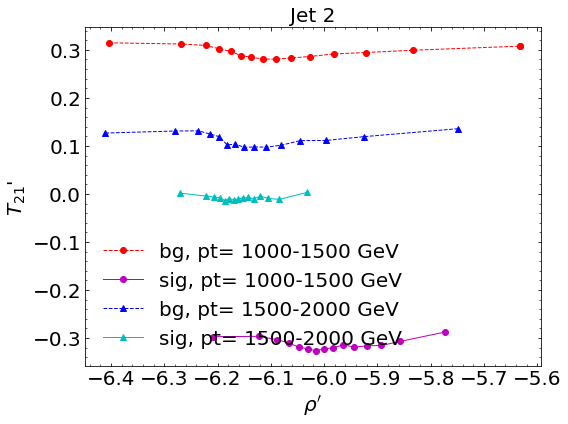

In [72]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_1500, T21prim_J2_bg_1500, 'o--', linewidth=1, color='r', label="bg, pt= 1000-1500 GeV")
plt.plot(avg_sigJ2_ro_1500, T21prim_J2_sig_1500, 'o-', linewidth=1, color='m', label="sig, pt= 1000-1500 GeV")
plt.plot(avg_bgJ2_ro_2000, T21prim_J2_bg_2000, '^--', linewidth=1, color='b', label="bg, pt= 1500-2000 GeV")
plt.plot(avg_sigJ2_ro_2000, T21prim_J2_sig_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

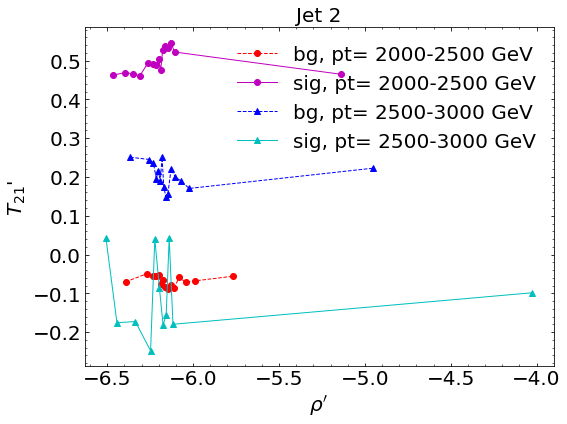

In [73]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_2500, T21prim_J2_bg_2500, 'o--', linewidth=1, color='r', label="bg, pt= 2000-2500 GeV")
plt.plot(avg_sigJ2_ro_2500, T21prim_J2_sig_2500, 'o-', linewidth=1, color='m', label="sig, pt= 2000-2500 GeV")
plt.plot(avg_bgJ2_ro_3000, T21prim_J2_bg_3000, '^--', linewidth=1, color='b', label="bg, pt= 2500-3000 GeV")
plt.plot(avg_sigJ2_ro_3000, T21prim_J2_sig_3000, '^-', linewidth=1, color='c', label="sig, pt= 2500-3000 GeV")

plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

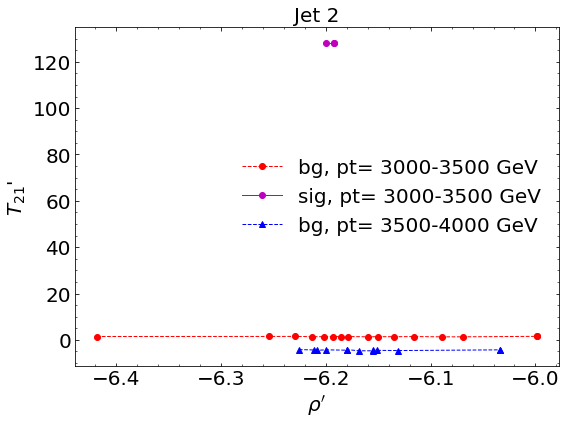

In [74]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_3500, T21prim_J2_bg_3500, 'o--', linewidth=1, color='r', label="bg, pt= 3000-3500 GeV")
plt.plot(avg_sigJ2_ro_3500, T21prim_J2_sig_3500, 'o-', linewidth=1, color='m', label="sig, pt= 3000-3500 GeV")
plt.plot(avg_bgJ2_ro_4000, T21prim_J2_bg_4000, '^--', linewidth=1, color='b', label="bg, pt= 3500-4000 GeV")
#plt.plot(avg_sigJ2_ro_2000, T21prim_J2_sig_2000, '^-', linewidth=1, color='c', label="sig, pt= 1500-2000 GeV")

plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.tight_layout()
#plt.ylim([0,1])

In [75]:
grapf_jet1_bg2 = load_data_J1(features_bg2)
print(grapf_jet1_bg2.shape)

j1_bg2_ro_pt500 = []
j1_bg2_t21_pt500 = []

j1_bg2_ro_pt1000 = []
j1_bg2_t21_pt1000 = []

j1_bg2_ro_pt1500 = []
j1_bg2_t21_pt1500 = []

j1_bg2_ro_pt2000 = []
j1_bg2_t21_pt2000 = []

j1_bg2_ro_pt2500 = []
j1_bg2_t21_pt2500 = []

j1_bg2_ro_pt3000 = []
j1_bg2_t21_pt3000 = []

j1_bg2_ro_pt3500 = []
j1_bg2_t21_pt3500 = []

j1_bg2_ro_pt4000 = []
j1_bg2_t21_pt4000 = []

#1000000
for t in range(999999):
    if grapf_jet1_bg2[t][2] <= 500:
        j1_bg2_ro_pt500.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt500.append(grapf_jet1_bg2[t][0])
        
    elif (grapf_jet1_bg2[t][2] > 500) and (grapf_jet1_bg2[t][2] <= 1000):
        j1_bg2_ro_pt1000.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt1000.append(grapf_jet1_bg2[t][0])
        
    elif (grapf_jet1_bg2[t][2] > 1000) and (grapf_jet1_bg2[t][2] <= 1500):
        j1_bg2_ro_pt1500.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt1500.append(grapf_jet1_bg2[t][0])
        
    elif (grapf_jet1_bg2[t][2] > 1500) and (grapf_jet1_bg2[t][2] <= 2000):
        j1_bg2_ro_pt2000.append(grapf_jet1_bg[t][1])
        j1_bg2_t21_pt2000.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg2[t][2] > 2000) and (grapf_jet1_bg2[t][2] <= 2500):
        j1_bg2_ro_pt2500.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt2500.append(grapf_jet1_bg2[t][0])
    
    elif (grapf_jet1_bg2[t][2] > 2500) and (grapf_jet1_bg2[t][2] <= 3000):
        j1_bg2_ro_pt3000.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt3000.append(grapf_jet1_bg2[t][0])
        
    elif (grapf_jet1_bg2[t][2] > 3000) and (grapf_jet1_bg2[t][2] <= 3500):
        j1_bg2_ro_pt3500.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt3500.append(grapf_jet1_bg2[t][0])
        
    else:
        j1_bg2_ro_pt4000.append(grapf_jet1_bg2[t][1])
        j1_bg2_t21_pt4000.append(grapf_jet1_bg2[t][0])


data_j1_bg2_T21_ro_500 = pd.DataFrame({'ro': j1_bg2_ro_pt500, 
                                       'T21': j1_bg2_t21_pt500})
data_j1_bg2_T21_ro_1000 = pd.DataFrame({'ro': j1_bg2_ro_pt1000, 
                                        'T21': j1_bg2_t21_pt1000})
data_j1_bg2_T21_ro_1500 = pd.DataFrame({'ro': j1_bg2_ro_pt1500, 
                                        'T21': j1_bg2_t21_pt1500})
data_j1_bg2_T21_ro_2000 = pd.DataFrame({'ro': j1_bg2_ro_pt2000, 
                                        'T21': j1_bg2_t21_pt2000})
data_j1_bg2_T21_ro_2500 = pd.DataFrame({'ro': j1_bg2_ro_pt2500, 
                                        'T21': j1_bg2_t21_pt2500})
data_j1_bg2_T21_ro_3000 = pd.DataFrame({'ro': j1_bg2_ro_pt3000, 
                                        'T21': j1_bg2_t21_pt3000})
data_j1_bg2_T21_ro_3500 = pd.DataFrame({'ro': j1_bg2_ro_pt3500, 
                                        'T21': j1_bg2_t21_pt3500})
data_j1_bg2_T21_ro_4000 = pd.DataFrame({'ro': j1_bg2_ro_pt4000, 
                                        'T21': j1_bg2_t21_pt4000})


order_bg2J1_500 = data_j1_bg2_T21_ro_500.sort_values('ro')
order_bg2J1_1000 = data_j1_bg2_T21_ro_1000.sort_values('ro')
order_bg2J1_1500 = data_j1_bg2_T21_ro_1500.sort_values('ro')
order_bg2J1_2000 = data_j1_bg2_T21_ro_2000.sort_values('ro')
order_bg2J1_2500 = data_j1_bg2_T21_ro_2500.sort_values('ro')
order_bg2J1_3000 = data_j1_bg2_T21_ro_3000.sort_values('ro')
order_bg2J1_3500 = data_j1_bg2_T21_ro_3500.sort_values('ro')
order_bg2J1_4000 = data_j1_bg2_T21_ro_4000.sort_values('ro')



bg2J1_500 = order_bg2J1_500.to_numpy()
bg2J1_1000 = order_bg2J1_1000.to_numpy()
bg2J1_1500 = order_bg2J1_1500.to_numpy()
bg2J1_2000 = order_bg2J1_2000.to_numpy()
bg2J1_2500 = order_bg2J1_2500.to_numpy()
bg2J1_3000 = order_bg2J1_3000.to_numpy()
bg2J1_3500 = order_bg2J1_3500.to_numpy()
bg2J1_4000 = order_bg2J1_4000.to_numpy()



avg_bg2J1_T21_500 = []
avg_bg2J1_ro_500 = []

N_bg2J1_500 = math.ceil(len(order_bg2J1_500['T21'])/15)

i = 0
sum_bg2J1_T21_500 = 0
sum_bg2J1_ro_500 = 0

for n in range(len(bg2J1_500)):
    sum_bg2J1_T21_500 = sum_bg2J1_T21_500 + bg2J1_500[n][1]
    sum_bg2J1_ro_500 = sum_bg2J1_ro_500 + bg2J1_500[n][0]      
    i = i+1
        
    if i >= N_bg2J1_500:
            
        avg_bg2J1_T21_500.append(sum_bg2J1_T21_500/N_bg2J1_500)
        avg_bg2J1_ro_500.append(sum_bg2J1_ro_500/N_bg2J1_500)
        sum_bg2J1_T21_500 = 0
        sum_bg2J1_ro_500 = 0
        i = 0
        
    """  """ 
    if n == len(bg2J1_500)-1:
        avg_bg2J1_T21_500.append(sum_bg2J1_T21_500/N_bg2J1_500)
        avg_bg2J1_ro_500.append(sum_bg2J1_ro_500/N_bg2J1_500)



avg_bg2J1_T21_1000 = []
avg_bg2J1_ro_1000 = []

N_bg2J1_1000 = math.ceil(len(order_bg2J1_1000['T21'])/15)

i = 0
sum_bg2J1_T21_1000 = 0
sum_bg2J1_ro_1000 = 0

for n in range(len(bg2J1_1000)):
    sum_bg2J1_T21_1000 = sum_bg2J1_T21_1000 + bg2J1_1000[n][1]
    sum_bg2J1_ro_1000 = sum_bg2J1_ro_1000 + bg2J1_1000[n][0]      
    i = i+1
    
    if n == len(bg2J1_1000)-1:
        avg_bg2J1_T21_1000.append(sum_bg2J1_T21_1000/N_bg2J1_1000)
        avg_bg2J1_ro_1000.append(sum_bg2J1_ro_1000/N_bg2J1_1000)
        
    if i >= N_bg2J1_1000:
        avg_bg2J1_T21_1000.append(sum_bg2J1_T21_1000/N_bg2J1_1000)
        avg_bg2J1_ro_1000.append(sum_bg2J1_ro_1000/N_bg2J1_1000)
        sum_bg2J1_T21_1000 = 0
        sum_bg2J1_ro_1000 = 0
        i = 0

        
avg_bg2J1_T21_1500 = []
avg_bg2J1_ro_1500 = []

N_bg2J1_1500 = math.ceil(len(order_bg2J1_1500['T21'])/15)

i = 0
sum_bg2J1_T21_1500 = 0
sum_bg2J1_ro_1500 = 0

for n in range(len(bg2J1_1500)):
    sum_bg2J1_T21_1500 = sum_bg2J1_T21_1500 + bg2J1_1500[n][1]
    sum_bg2J1_ro_1500 = sum_bg2J1_ro_1500 + bg2J1_1500[n][0]      
    i = i+1
    
    if n == len(bg2J1_1500)-1:
        avg_bg2J1_T21_1500.append(sum_bg2J1_T21_1500/N_bg2J1_1500)
        avg_bg2J1_ro_1500.append(sum_bg2J1_ro_1500/N_bg2J1_1500)
        
    if i >= N_bg2J1_1500:
        avg_bg2J1_T21_1500.append(sum_bg2J1_T21_1500/N_bg2J1_1500)
        avg_bg2J1_ro_1500.append(sum_bg2J1_ro_1500/N_bg2J1_1500)
        sum_bg2J1_T21_1500 = 0
        sum_bg2J1_ro_1500 = 0
        i = 0


avg_bg2J1_T21_2000 = []
avg_bg2J1_ro_2000 = []

N_bg2J1_2000 = math.ceil(len(order_bg2J1_2000['T21'])/15)

i = 0
sum_bg2J1_T21_2000 = 0
sum_bg2J1_ro_2000 = 0

for n in range(len(bg2J1_2000)):
    sum_bg2J1_T21_2000 = sum_bg2J1_T21_2000 + bg2J1_2000[n][1]
    sum_bg2J1_ro_2000 = sum_bg2J1_ro_2000 + bg2J1_2000[n][0]      
    i = i+1
    
    if n == len(bg2J1_2000)-1:
        avg_bg2J1_T21_2000.append(sum_bg2J1_T21_2000/N_bg2J1_2000)
        avg_bg2J1_ro_2000.append(sum_bg2J1_ro_2000/N_bg2J1_2000)
        
    if i >= N_bg2J1_2000:
        avg_bg2J1_T21_2000.append(sum_bg2J1_T21_2000/N_bg2J1_2000)
        avg_bg2J1_ro_2000.append(sum_bg2J1_ro_2000/N_bg2J1_2000)
        sum_bg2J1_T21_2000 = 0
        sum_bg2J1_ro_2000 = 0
        i = 0

        
avg_bg2J1_T21_2500 = []
avg_bg2J1_ro_2500 = []

N_bg2J1_2500 = math.ceil(len(order_bg2J1_2500['T21'])/15)

i = 0
sum_bg2J1_T21_2500 = 0
sum_bg2J1_ro_2500 = 0

for n in range(len(bg2J1_2500)):
    sum_bg2J1_T21_2500 = sum_bg2J1_T21_2500 + bg2J1_2500[n][1]
    sum_bg2J1_ro_2500 = sum_bg2J1_ro_2500 + bg2J1_2500[n][0]      
    i = i+1
    
    if n == len(bg2J1_2500)-1:
        avg_bg2J1_T21_2500.append(sum_bg2J1_T21_2500/N_bg2J1_2500)
        avg_bg2J1_ro_2500.append(sum_bg2J1_ro_2500/N_bg2J1_2500)
        
    if i >= N_bg2J1_2500:
        avg_bg2J1_T21_2500.append(sum_bg2J1_T21_2500/N_bg2J1_2500)
        avg_bg2J1_ro_2500.append(sum_bg2J1_ro_2500/N_bg2J1_2500)
        sum_bg2J1_T21_2500 = 0
        sum_bg2J1_ro_2500 = 0
        i = 0


avg_bg2J1_T21_3000 = []
avg_bg2J1_ro_3000 = []

N_bg2J1_3000 = math.ceil(len(order_bg2J1_3000['T21'])/15)

i = 0
sum_bg2J1_T21_3000 = 0
sum_bg2J1_ro_3000 = 0

for n in range(len(bg2J1_3000)):
    sum_bg2J1_T21_3000 = sum_bg2J1_T21_3000 + bg2J1_3000[n][1]
    sum_bg2J1_ro_3000 = sum_bg2J1_ro_3000 + bg2J1_3000[n][0]      
    i = i+1
    
    if n == len(bg2J1_3000)-1:
        avg_bg2J1_T21_3000.append(sum_bg2J1_T21_3000/N_bg2J1_3000)
        avg_bg2J1_ro_3000.append(sum_bg2J1_ro_3000/N_bg2J1_3000)
        
    if i >= N_bg2J1_3000:
        avg_bg2J1_T21_3000.append(sum_bg2J1_T21_3000/N_bg2J1_3000)
        avg_bg2J1_ro_3000.append(sum_bg2J1_ro_3000/N_bg2J1_3000)
        sum_bg2J1_T21_3000 = 0
        sum_bg2J1_ro_3000 = 0
        i = 0

        
avg_bg2J1_T21_3500 = []
avg_bg2J1_ro_3500 = []

N_bg2J1_3500 = math.ceil(len(order_bg2J1_3500['T21'])/15)

i = 0
sum_bg2J1_T21_3500 = 0
sum_bg2J1_ro_3500 = 0

for n in range(len(bg2J1_3500)):
    sum_bg2J1_T21_3500 = sum_bg2J1_T21_3500 + bg2J1_3500[n][1]
    sum_bg2J1_ro_3500 = sum_bg2J1_ro_3500 + bg2J1_3500[n][0]      
    i = i+1
    
    if n == len(bg2J1_3500)-1:
        avg_bg2J1_T21_3500.append(sum_bg2J1_T21_3500/N_bg2J1_3500)
        avg_bg2J1_ro_3500.append(sum_bg2J1_ro_3500/N_bg2J1_3500)
        
    if i >= N_bg2J1_3500:
        avg_bg2J1_T21_3500.append(sum_bg2J1_T21_3500/N_bg2J1_3500)
        avg_bg2J1_ro_3500.append(sum_bg2J1_ro_3500/N_bg2J1_3500)
        sum_bg2J1_T21_3500 = 0
        sum_bg2J1_ro_3500 = 0
        i = 0


avg_bg2J1_T21_4000 = []
avg_bg2J1_ro_4000 = []

N_bg2J1_4000 = math.ceil(len(order_bg2J1_4000['T21'])/15)

i = 0
sum_bg2J1_T21_4000 = 0
sum_bg2J1_ro_4000 = 0

for n in range(len(bg2J1_4000)):
    sum_bg2J1_T21_4000 = sum_bg2J1_T21_4000 + bg2J1_4000[n][1]
    sum_bg2J1_ro_4000 = sum_bg2J1_ro_4000 + bg2J1_4000[n][0]      
    i = i+1
    
    if n == len(bg2J1_4000)-1:
        avg_bg2J1_T21_4000.append(sum_bg2J1_T21_4000/N_bg2J1_4000)
        avg_bg2J1_ro_4000.append(sum_bg2J1_ro_4000/N_bg2J1_4000)
        
    if i >= N_bg2J1_4000:
        avg_bg2J1_T21_4000.append(sum_bg2J1_T21_4000/N_bg2J1_4000)
        avg_bg2J1_ro_4000.append(sum_bg2J1_ro_4000/N_bg2J1_4000)
        sum_bg2J1_T21_4000 = 0
        sum_bg2J1_ro_4000 = 0
        i = 0



        
from sklearn.linear_model import LinearRegression

reglin_J1_bg2_500 = LinearRegression()
ro_J1_bg2_500 = np.array(avg_bg2J1_ro_500)
t21_J1_bg2_500 = np.array(avg_bg2J1_T21_500)

reglin_J1_bg2_500.fit(ro_J1_bg2_500.reshape(-1, 1), t21_J1_bg2_500)

b_J1_bg2_500 = reglin_J1_bg2_500.coef_[0]

T21prim_J1_bg2_500 = []

for n in range(len(ro_J1_bg2_500)):
    T21prim_J1_bg2_500.append(t21_J1_bg2_500[n]-ro_J1_bg2_500[n]*b_J1_bg2_500)
    

    
reglin_J1_bg2_1000 = LinearRegression()
ro_J1_bg2_1000 = np.array(avg_bg2J1_ro_1000)
t21_J1_bg2_1000 = np.array(avg_bg2J1_T21_1000)

reglin_J1_bg2_1000.fit(ro_J1_bg2_1000.reshape(-1, 1), t21_J1_bg2_1000)

b_J1_bg2_1000 = reglin_J1_bg2_1000.coef_[0]

T21prim_J1_bg2_1000 = []

for n in range(len(ro_J1_bg2_1000)):
    T21prim_J1_bg2_1000.append(t21_J1_bg2_1000[n]-ro_J1_bg2_1000[n]*b_J1_bg2_1000)
    

    
reglin_J1_bg2_1500 = LinearRegression()
ro_J1_bg2_1500 = np.array(avg_bg2J1_ro_1500)
t21_J1_bg2_1500 = np.array(avg_bg2J1_T21_1500)

reglin_J1_bg2_1500.fit(ro_J1_bg2_1500.reshape(-1, 1), t21_J1_bg2_1500)

b_J1_bg2_1500 = reglin_J1_bg2_1500.coef_[0]

T21prim_J1_bg2_1500 = []

for n in range(len(ro_J1_bg2_1500)):
    T21prim_J1_bg2_1500.append(t21_J1_bg2_1500[n]-ro_J1_bg2_1500[n]*b_J1_bg2_1500)
    

    
reglin_J1_bg2_2000 = LinearRegression()
ro_J1_bg2_2000 = np.array(avg_bg2J1_ro_2000)
t21_J1_bg2_2000 = np.array(avg_bg2J1_T21_2000)

reglin_J1_bg2_2000.fit(ro_J1_bg2_2000.reshape(-1, 1), t21_J1_bg2_2000)

b_J1_bg2_2000 = reglin_J1_bg2_2000.coef_[0]

T21prim_J1_bg2_2000 = []

for n in range(len(ro_J1_bg2_2000)):
    T21prim_J1_bg2_2000.append(t21_J1_bg2_2000[n]-ro_J1_bg2_2000[n]*b_J1_bg2_2000)
    

    
reglin_J1_bg2_2500 = LinearRegression()
ro_J1_bg2_2500 = np.array(avg_bg2J1_ro_2500)
t21_J1_bg2_2500 = np.array(avg_bg2J1_T21_2500)

reglin_J1_bg2_2500.fit(ro_J1_bg2_2500.reshape(-1, 1), t21_J1_bg2_2500)

b_J1_bg2_2500 = reglin_J1_bg2_2500.coef_[0]

T21prim_J1_bg2_2500 = []

for n in range(len(ro_J1_bg2_2500)):
    T21prim_J1_bg2_2500.append(t21_J1_bg2_2500[n]-ro_J1_bg2_2500[n]*b_J1_bg2_2500)
    

    
reglin_J1_bg2_3000 = LinearRegression()
ro_J1_bg2_3000 = np.array(avg_bg2J1_ro_3000)
t21_J1_bg2_3000 = np.array(avg_bg2J1_T21_3000)

reglin_J1_bg2_3000.fit(ro_J1_bg2_3000.reshape(-1, 1), t21_J1_bg2_3000)

b_J1_bg2_3000 = reglin_J1_bg2_3000.coef_[0]

T21prim_J1_bg2_3000 = []

for n in range(len(ro_J1_bg2_3000)):
    T21prim_J1_bg2_3000.append(t21_J1_bg2_3000[n]-ro_J1_bg2_3000[n]*b_J1_bg2_3000)
    

    
reglin_J1_bg2_3500 = LinearRegression()
ro_J1_bg2_3500 = np.array(avg_bg2J1_ro_3500)
t21_J1_bg2_3500 = np.array(avg_bg2J1_T21_3500)

reglin_J1_bg2_3500.fit(ro_J1_bg2_3500.reshape(-1, 1), t21_J1_bg2_3500)

b_J1_bg2_3500 = reglin_J1_bg2_3500.coef_[0]

T21prim_J1_bg2_3500 = []

for n in range(len(ro_J1_bg2_3500)):
    T21prim_J1_bg2_3500.append(t21_J1_bg2_3500[n]-ro_J1_bg2_3500[n]*b_J1_bg2_3500)
    

    
reglin_J1_bg2_4000 = LinearRegression()
ro_J1_bg2_4000 = np.array(avg_bg2J1_ro_4000)
t21_J1_bg2_4000 = np.array(avg_bg2J1_T21_4000)

reglin_J1_bg2_4000.fit(ro_J1_bg2_4000.reshape(-1, 1), t21_J1_bg2_4000)

b_J1_bg2_4000 = reglin_J1_bg2_4000.coef_[0]

T21prim_J1_bg2_4000 = []

for n in range(len(ro_J1_bg2_4000)):
    T21prim_J1_bg2_4000.append(t21_J1_bg2_4000[n]-ro_J1_bg2_4000[n]*b_J1_bg2_4000)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2362063628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

0         0.000000
1         0.000000
2         1.892549
3         0.000000
4         1.332904
            ...   
999994    0.000000
999995    0.000000
999996    1.445894
999997    0.000000
999998    1.834872
Length: 999999, dtype: float64
0        -6.026688
1        -6.121561
2        -6.235431
3        -5.427333
4        -6.075915
            ...   
999994   -6.032687
999995   -5.787950
999996   -6.168580
999997   -6.131013
999998   -6.223294
Name: rojOne, Length: 999999, dtype: float64
(999999, 3)


In [76]:
grapf_jet2_bg2 = load_data_J2(features_bg2)
print(grapf_jet2_bg2.shape)

j2_bg2_ro_pt500 = []
j2_bg2_t21_pt500 = []

j2_bg2_ro_pt1000 = []
j2_bg2_t21_pt1000 = []

j2_bg2_ro_pt1500 = []
j2_bg2_t21_pt1500 = []

j2_bg2_ro_pt2000 = []
j2_bg2_t21_pt2000 = []

j2_bg2_ro_pt2500 = []
j2_bg2_t21_pt2500 = []

j2_bg2_ro_pt3000 = []
j2_bg2_t21_pt3000 = []

j2_bg2_ro_pt3500 = []
j2_bg2_t21_pt3500 = []

j2_bg2_ro_pt4000 = []
j2_bg2_t21_pt4000 = []

#1000000
for t in range(999999):
    if grapf_jet2_bg2[t][2] <= 500:
        j2_bg2_ro_pt500.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt500.append(grapf_jet2_bg2[t][0])
        
    elif (grapf_jet2_bg2[t][2] > 500) and (grapf_jet2_bg2[t][2] <= 1000):
        j2_bg2_ro_pt1000.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt1000.append(grapf_jet2_bg2[t][0])
        
    elif (grapf_jet2_bg2[t][2] > 1000) and (grapf_jet2_bg2[t][2] <= 1500):
        j2_bg2_ro_pt1500.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt1500.append(grapf_jet2_bg2[t][0])
        
    elif (grapf_jet2_bg2[t][2] > 1500) and (grapf_jet2_bg2[t][2] <= 2000):
        j2_bg2_ro_pt2000.append(grapf_jet2_bg[t][1])
        j2_bg2_t21_pt2000.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg2[t][2] > 2000) and (grapf_jet2_bg2[t][2] <= 2500):
        j2_bg2_ro_pt2500.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt2500.append(grapf_jet2_bg2[t][0])
    
    elif (grapf_jet2_bg2[t][2] > 2500) and (grapf_jet2_bg2[t][2] <= 3000):
        j2_bg2_ro_pt3000.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt3000.append(grapf_jet2_bg2[t][0])
        
    elif (grapf_jet2_bg2[t][2] > 3000) and (grapf_jet2_bg2[t][2] <= 3500):
        j2_bg2_ro_pt3500.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt3500.append(grapf_jet2_bg2[t][0])
        
    else:
        j2_bg2_ro_pt4000.append(grapf_jet2_bg2[t][1])
        j2_bg2_t21_pt4000.append(grapf_jet2_bg2[t][0])


data_j2_bg2_T21_ro_500 = pd.DataFrame({'ro': j2_bg2_ro_pt500, 
                                       'T21': j2_bg2_t21_pt500})
data_j2_bg2_T21_ro_1000 = pd.DataFrame({'ro': j2_bg2_ro_pt1000, 
                                        'T21': j2_bg2_t21_pt1000})
data_j2_bg2_T21_ro_1500 = pd.DataFrame({'ro': j2_bg2_ro_pt1500, 
                                        'T21': j2_bg2_t21_pt1500})
data_j2_bg2_T21_ro_2000 = pd.DataFrame({'ro': j2_bg2_ro_pt2000, 
                                        'T21': j2_bg2_t21_pt2000})
data_j2_bg2_T21_ro_2500 = pd.DataFrame({'ro': j2_bg2_ro_pt2500, 
                                        'T21': j2_bg2_t21_pt2500})
data_j2_bg2_T21_ro_3000 = pd.DataFrame({'ro': j2_bg2_ro_pt3000, 
                                        'T21': j2_bg2_t21_pt3000})
data_j2_bg2_T21_ro_3500 = pd.DataFrame({'ro': j2_bg2_ro_pt3500, 
                                        'T21': j2_bg2_t21_pt3500})
data_j2_bg2_T21_ro_4000 = pd.DataFrame({'ro': j2_bg2_ro_pt4000, 
                                        'T21': j2_bg2_t21_pt4000})


order_bg2J2_500 = data_j2_bg2_T21_ro_500.sort_values('ro')
order_bg2J2_1000 = data_j2_bg2_T21_ro_1000.sort_values('ro')
order_bg2J2_1500 = data_j2_bg2_T21_ro_1500.sort_values('ro')
order_bg2J2_2000 = data_j2_bg2_T21_ro_2000.sort_values('ro')
order_bg2J2_2500 = data_j2_bg2_T21_ro_2500.sort_values('ro')
order_bg2J2_3000 = data_j2_bg2_T21_ro_3000.sort_values('ro')
order_bg2J2_3500 = data_j2_bg2_T21_ro_3500.sort_values('ro')
order_bg2J2_4000 = data_j2_bg2_T21_ro_4000.sort_values('ro')



bg2J2_500 = order_bg2J2_500.to_numpy()
bg2J2_1000 = order_bg2J2_1000.to_numpy()
bg2J2_1500 = order_bg2J2_1500.to_numpy()
bg2J2_2000 = order_bg2J2_2000.to_numpy()
bg2J2_2500 = order_bg2J2_2500.to_numpy()
bg2J2_3000 = order_bg2J2_3000.to_numpy()
bg2J2_3500 = order_bg2J2_3500.to_numpy()
bg2J2_4000 = order_bg2J2_4000.to_numpy()



avg_bg2J2_T21_500 = []
avg_bg2J2_ro_500 = []

N_bg2J2_500 = math.ceil(len(order_bg2J2_500['T21'])/15)

i = 0
sum_bg2J2_T21_500 = 0
sum_bg2J2_ro_500 = 0

for n in range(len(bg2J2_500)):
    sum_bg2J2_T21_500 = sum_bg2J2_T21_500 + bg2J2_500[n][1]
    sum_bg2J2_ro_500 = sum_bg2J2_ro_500 + bg2J2_500[n][0]      
    i = i+1
        
    if i >= N_bg2J2_500:
            
        avg_bg2J2_T21_500.append(sum_bg2J2_T21_500/N_bg2J2_500)
        avg_bg2J2_ro_500.append(sum_bg2J2_ro_500/N_bg2J2_500)
        sum_bg2J2_T21_500 = 0
        sum_bg2J2_ro_500 = 0
        i = 0
        
    """  """ 
    if n == len(bg2J2_500)-1:
        avg_bg2J2_T21_500.append(sum_bg2J2_T21_500/N_bg2J2_500)
        avg_bg2J2_ro_500.append(sum_bg2J2_ro_500/N_bg2J2_500)



avg_bg2J2_T21_1000 = []
avg_bg2J2_ro_1000 = []

N_bg2J2_1000 = math.ceil(len(order_bg2J2_1000['T21'])/15)

i = 0
sum_bg2J2_T21_1000 = 0
sum_bg2J2_ro_1000 = 0

for n in range(len(bg2J2_1000)):
    sum_bg2J2_T21_1000 = sum_bg2J2_T21_1000 + bg2J2_1000[n][1]
    sum_bg2J2_ro_1000 = sum_bg2J2_ro_1000 + bg2J2_1000[n][0]      
    i = i+1
    
    if n == len(bg2J2_1000)-1:
        avg_bg2J2_T21_1000.append(sum_bg2J2_T21_1000/N_bg2J2_1000)
        avg_bg2J2_ro_1000.append(sum_bg2J2_ro_1000/N_bg2J2_1000)
        
    if i >= N_bg2J2_1000:
        avg_bg2J2_T21_1000.append(sum_bg2J2_T21_1000/N_bg2J2_1000)
        avg_bg2J2_ro_1000.append(sum_bg2J2_ro_1000/N_bg2J2_1000)
        sum_bg2J2_T21_1000 = 0
        sum_bg2J2_ro_1000 = 0
        i = 0

        
avg_bg2J2_T21_1500 = []
avg_bg2J2_ro_1500 = []

N_bg2J2_1500 = math.ceil(len(order_bg2J2_1500['T21'])/15)

i = 0
sum_bg2J2_T21_1500 = 0
sum_bg2J2_ro_1500 = 0

for n in range(len(bg2J2_1500)):
    sum_bg2J2_T21_1500 = sum_bg2J2_T21_1500 + bg2J2_1500[n][1]
    sum_bg2J2_ro_1500 = sum_bg2J2_ro_1500 + bg2J2_1500[n][0]      
    i = i+1
    
    if n == len(bg2J2_1500)-1:
        avg_bg2J2_T21_1500.append(sum_bg2J2_T21_1500/N_bg2J2_1500)
        avg_bg2J2_ro_1500.append(sum_bg2J2_ro_1500/N_bg2J2_1500)
        
    if i >= N_bg2J2_1500:
        avg_bg2J2_T21_1500.append(sum_bg2J2_T21_1500/N_bg2J2_1500)
        avg_bg2J2_ro_1500.append(sum_bg2J2_ro_1500/N_bg2J2_1500)
        sum_bg2J2_T21_1500 = 0
        sum_bg2J2_ro_1500 = 0
        i = 0


avg_bg2J2_T21_2000 = []
avg_bg2J2_ro_2000 = []

N_bg2J2_2000 = math.ceil(len(order_bg2J2_2000['T21'])/15)

i = 0
sum_bg2J2_T21_2000 = 0
sum_bg2J2_ro_2000 = 0

for n in range(len(bg2J2_2000)):
    sum_bg2J2_T21_2000 = sum_bg2J2_T21_2000 + bg2J2_2000[n][1]
    sum_bg2J2_ro_2000 = sum_bg2J2_ro_2000 + bg2J2_2000[n][0]      
    i = i+1
    
    if n == len(bg2J2_2000)-1:
        avg_bg2J2_T21_2000.append(sum_bg2J2_T21_2000/N_bg2J2_2000)
        avg_bg2J2_ro_2000.append(sum_bg2J2_ro_2000/N_bg2J2_2000)
        
    if i >= N_bg2J2_2000:
        avg_bg2J2_T21_2000.append(sum_bg2J2_T21_2000/N_bg2J2_2000)
        avg_bg2J2_ro_2000.append(sum_bg2J2_ro_2000/N_bg2J2_2000)
        sum_bg2J2_T21_2000 = 0
        sum_bg2J2_ro_2000 = 0
        i = 0

        
avg_bg2J2_T21_2500 = []
avg_bg2J2_ro_2500 = []

N_bg2J2_2500 = math.ceil(len(order_bg2J2_2500['T21'])/15)

i = 0
sum_bg2J2_T21_2500 = 0
sum_bg2J2_ro_2500 = 0

for n in range(len(bg2J2_2500)):
    sum_bg2J2_T21_2500 = sum_bg2J2_T21_2500 + bg2J2_2500[n][1]
    sum_bg2J2_ro_2500 = sum_bg2J2_ro_2500 + bg2J2_2500[n][0]      
    i = i+1
    
    if n == len(bg2J2_2500)-1:
        avg_bg2J2_T21_2500.append(sum_bg2J2_T21_2500/N_bg2J2_2500)
        avg_bg2J2_ro_2500.append(sum_bg2J2_ro_2500/N_bg2J2_2500)
        
    if i >= N_bg2J2_2500:
        avg_bg2J2_T21_2500.append(sum_bg2J2_T21_2500/N_bg2J2_2500)
        avg_bg2J2_ro_2500.append(sum_bg2J2_ro_2500/N_bg2J2_2500)
        sum_bg2J2_T21_2500 = 0
        sum_bg2J2_ro_2500 = 0
        i = 0


avg_bg2J2_T21_3000 = []
avg_bg2J2_ro_3000 = []

N_bg2J2_3000 = math.ceil(len(order_bg2J2_3000['T21'])/15)

i = 0
sum_bg2J2_T21_3000 = 0
sum_bg2J2_ro_3000 = 0

for n in range(len(bg2J2_3000)):
    sum_bg2J2_T21_3000 = sum_bg2J2_T21_3000 + bg2J2_3000[n][1]
    sum_bg2J2_ro_3000 = sum_bg2J2_ro_3000 + bg2J2_3000[n][0]      
    i = i+1
    
    if n == len(bg2J2_3000)-1:
        avg_bg2J2_T21_3000.append(sum_bg2J2_T21_3000/N_bg2J2_3000)
        avg_bg2J2_ro_3000.append(sum_bg2J2_ro_3000/N_bg2J2_3000)
        
    if i >= N_bg2J2_3000:
        avg_bg2J2_T21_3000.append(sum_bg2J2_T21_3000/N_bg2J2_3000)
        avg_bg2J2_ro_3000.append(sum_bg2J2_ro_3000/N_bg2J2_3000)
        sum_bg2J2_T21_3000 = 0
        sum_bg2J2_ro_3000 = 0
        i = 0

        
avg_bg2J2_T21_3500 = []
avg_bg2J2_ro_3500 = []

N_bg2J2_3500 = math.ceil(len(order_bg2J2_3500['T21'])/15)

i = 0
sum_bg2J2_T21_3500 = 0
sum_bg2J2_ro_3500 = 0

for n in range(len(bg2J2_3500)):
    sum_bg2J2_T21_3500 = sum_bg2J2_T21_3500 + bg2J2_3500[n][1]
    sum_bg2J2_ro_3500 = sum_bg2J2_ro_3500 + bg2J2_3500[n][0]      
    i = i+1
    
    if n == len(bg2J2_3500)-1:
        avg_bg2J2_T21_3500.append(sum_bg2J2_T21_3500/N_bg2J2_3500)
        avg_bg2J2_ro_3500.append(sum_bg2J2_ro_3500/N_bg2J2_3500)
        
    if i >= N_bg2J2_3500:
        avg_bg2J2_T21_3500.append(sum_bg2J2_T21_3500/N_bg2J2_3500)
        avg_bg2J2_ro_3500.append(sum_bg2J2_ro_3500/N_bg2J2_3500)
        sum_bg2J2_T21_3500 = 0
        sum_bg2J2_ro_3500 = 0
        i = 0


avg_bg2J2_T21_4000 = []
avg_bg2J2_ro_4000 = []

N_bg2J2_4000 = math.ceil(len(order_bg2J2_4000['T21'])/15)

i = 0
sum_bg2J2_T21_4000 = 0
sum_bg2J2_ro_4000 = 0

for n in range(len(bg2J2_4000)):
    sum_bg2J2_T21_4000 = sum_bg2J2_T21_4000 + bg2J2_4000[n][1]
    sum_bg2J2_ro_4000 = sum_bg2J2_ro_4000 + bg2J2_4000[n][0]      
    i = i+1
    
    if n == len(bg2J2_4000)-1:
        avg_bg2J2_T21_4000.append(sum_bg2J2_T21_4000/N_bg2J2_4000)
        avg_bg2J2_ro_4000.append(sum_bg2J2_ro_4000/N_bg2J2_4000)
        
    if i >= N_bg2J2_4000:
        avg_bg2J2_T21_4000.append(sum_bg2J2_T21_4000/N_bg2J2_4000)
        avg_bg2J2_ro_4000.append(sum_bg2J2_ro_4000/N_bg2J2_4000)
        sum_bg2J2_T21_4000 = 0
        sum_bg2J2_ro_4000 = 0
        i = 0

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2440632181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2440632181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

(999999, 3)


In [118]:
j1rho_bg_ro_pt2900_3300 = []
j1rho_bg_t21_pt2900_3300 = []

j1rho_bg_ro_pt3300_3700 = []
j1rho_bg_t21_pt3300_3700 = []

j1rho_bg_ro_pt3700_4100 = []
j1rho_bg_t21_pt3700_4100 = []


for t in range(1000000):

    if (grapf_jet1_bg_ro[t][2] >= 2900) and (grapf_jet1_bg_ro[t][2] <= 3300):
        j1rho_bg_ro_pt2900_3300.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt2900_3300.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 3300) and (grapf_jet1_bg_ro[t][2] <= 3700):
        j1rho_bg_ro_pt3300_3700.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt3300_3700.append(grapf_jet1_bg_ro[t][0])
        
    elif (grapf_jet1_bg_ro[t][2] > 3700) and (grapf_jet1_bg_ro[t][2] <= 4100):
        j1rho_bg_ro_pt3700_4100.append(grapf_jet1_bg_ro[t][1])
        j1rho_bg_t21_pt3700_4100.append(grapf_jet1_bg_ro[t][0])
        
        

        
datarho_j1_T21_ro_2900_3300 = pd.DataFrame({'ro': j1rho_bg_ro_pt2900_3300, 
                                            'T21': j1rho_bg_t21_pt2900_3300})
datarho_j1_T21_ro_3300_3700 = pd.DataFrame({'ro': j1rho_bg_ro_pt3300_3700, 
                                            'T21': j1rho_bg_t21_pt3300_3700})
datarho_j1_T21_ro_3700_4100 = pd.DataFrame({'ro': j1rho_bg_ro_pt3700_4100, 
                                            'T21': j1rho_bg_t21_pt3700_4100})


orderrho_bgJ1_2900_3300 = datarho_j1_T21_ro_2900_3300.sort_values('ro')
orderrho_bgJ1_3300_3700 = datarho_j1_T21_ro_3300_3700.sort_values('ro')
orderrho_bgJ1_3700_4100 = datarho_j1_T21_ro_3700_4100.sort_values('ro')


In [119]:
bgJ1rho_2900_3300 = orderrho_bgJ1_2900_3300.to_numpy()

avgrho_bgJ1_T21_2900_3300 = []
avgrho_bgJ1_ro_2900_3300 = []

Nrho_bgJ1_2900_3300 = math.ceil(len(orderrho_bgJ1_2900_3300['T21'])/15)

i = 0
sumrho_bgJ1_T21_2900_3300 = 0
sumrho_bgJ1_ro_2900_3300 = 0

for n in range(len(bgJ1rho_2900_3300)):
    sumrho_bgJ1_T21_2900_3300 = sumrho_bgJ1_T21_2900_3300 + bgJ1rho_2900_3300[n][1]
    sumrho_bgJ1_ro_2900_3300 = sumrho_bgJ1_ro_2900_3300 + bgJ1rho_2900_3300[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_2900_3300)-1:
        avgrho_bgJ1_T21_2900_3300.append(sumrho_bgJ1_T21_2900_3300/Nrho_bgJ1_2900_3300)
        avgrho_bgJ1_ro_2900_3300.append(sumrho_bgJ1_ro_2900_3300/Nrho_bgJ1_2900_3300)
        
    if i >= Nrho_bgJ1_2900_3300:
        avgrho_bgJ1_T21_2900_3300.append(sumrho_bgJ1_T21_2900_3300/Nrho_bgJ1_2900_3300)
        avgrho_bgJ1_ro_2900_3300.append(sumrho_bgJ1_ro_2900_3300/Nrho_bgJ1_2900_3300)
        sumrho_bgJ1_T21_2900_3300 = 0
        sumrho_bgJ1_ro_2900_3300 = 0
        i = 0
        


bgJ1rho_3300_3700 = orderrho_bgJ1_3300_3700.to_numpy()

avgrho_bgJ1_T21_3300_3700 = []
avgrho_bgJ1_ro_3300_3700 = []

Nrho_bgJ1_3300_3700 = math.ceil(len(orderrho_bgJ1_3300_3700['T21'])/15)

i = 0
sumrho_bgJ1_T21_3300_3700 = 0
sumrho_bgJ1_ro_3300_3700 = 0

for n in range(len(bgJ1rho_3300_3700)):
    sumrho_bgJ1_T21_3300_3700 = sumrho_bgJ1_T21_3300_3700 + bgJ1rho_3300_3700[n][1]
    sumrho_bgJ1_ro_3300_3700 = sumrho_bgJ1_ro_3300_3700 + bgJ1rho_3300_3700[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_3300_3700)-1:
        avgrho_bgJ1_T21_3300_3700.append(sumrho_bgJ1_T21_3300_3700/Nrho_bgJ1_3300_3700)
        avgrho_bgJ1_ro_3300_3700.append(sumrho_bgJ1_ro_3300_3700/Nrho_bgJ1_3300_3700)
        
    if i >= Nrho_bgJ1_3300_3700:
        avgrho_bgJ1_T21_3300_3700.append(sumrho_bgJ1_T21_3300_3700/Nrho_bgJ1_3300_3700)
        avgrho_bgJ1_ro_3300_3700.append(sumrho_bgJ1_ro_3300_3700/Nrho_bgJ1_3300_3700)
        sumrho_bgJ1_T21_3300_3700 = 0
        sumrho_bgJ1_ro_3300_3700 = 0
        i = 0
        
        

bgJ1rho_3700_4100 = orderrho_bgJ1_3700_4100.to_numpy()

avgrho_bgJ1_T21_3700_4100 = []
avgrho_bgJ1_ro_3700_4100 = []

Nrho_bgJ1_3700_4100 = math.ceil(len(orderrho_bgJ1_3700_4100['T21'])/15)

i = 0
sumrho_bgJ1_T21_3700_4100 = 0
sumrho_bgJ1_ro_3700_4100 = 0

for n in range(len(bgJ1rho_3700_4100)):
    sumrho_bgJ1_T21_3700_4100 = sumrho_bgJ1_T21_3700_4100 + bgJ1rho_3700_4100[n][1]
    sumrho_bgJ1_ro_3700_4100 = sumrho_bgJ1_ro_3700_4100 + bgJ1rho_3700_4100[n][0]      
    i = i+1
    
    if n == len(bgJ1rho_3700_4100)-1:
        avgrho_bgJ1_T21_3700_4100.append(sumrho_bgJ1_T21_3700_4100/Nrho_bgJ1_3700_4100)
        avgrho_bgJ1_ro_3700_4100.append(sumrho_bgJ1_ro_3700_4100/Nrho_bgJ1_3700_4100)
        
    if i >= Nrho_bgJ1_3700_4100:
        avgrho_bgJ1_T21_3700_4100.append(sumrho_bgJ1_T21_3700_4100/Nrho_bgJ1_3700_4100)
        avgrho_bgJ1_ro_3700_4100.append(sumrho_bgJ1_ro_3700_4100/Nrho_bgJ1_3700_4100)
        sumrho_bgJ1_T21_3700_4100 = 0
        sumrho_bgJ1_ro_3700_4100 = 0
        i = 0

In [120]:
j1rho_sig_ro_pt2900_3300 = []
j1rho_sig_t21_pt2900_3300 = []

j1rho_sig_ro_pt3300_3700 = []
j1rho_sig_t21_pt3300_3700 = []

j1rho_sig_ro_pt3700_4100 = []
j1rho_sig_t21_pt3700_4100 = []


for t in range(100000):
    
    if (grapf_jet1_sig_ro[t][2] >= 2900) and (grapf_jet1_sig_ro[t][2] <= 3300):
        j1rho_sig_ro_pt2900_3300.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt2900_3300.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 3300) and (grapf_jet1_sig_ro[t][2] <= 3700):
        j1rho_sig_ro_pt3300_3700.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt3300_3700.append(grapf_jet1_sig_ro[t][0])
        
    elif (grapf_jet1_sig_ro[t][2] > 3700) and (grapf_jet1_sig_ro[t][2] <= 4100):
        j1rho_sig_ro_pt3700_4100.append(grapf_jet1_sig_ro[t][1])
        j1rho_sig_t21_pt3700_4100.append(grapf_jet1_sig_ro[t][0])
        

        
datarho_j1sig_T21_ro_2900_3300 = pd.DataFrame({'ro': j1rho_sig_ro_pt2900_3300, 
                                               'T21': j1rho_sig_t21_pt2900_3300})
datarho_j1sig_T21_ro_3300_3700 = pd.DataFrame({'ro': j1rho_sig_ro_pt3300_3700, 
                                               'T21': j1rho_sig_t21_pt3300_3700})
datarho_j1sig_T21_ro_3700_4100 = pd.DataFrame({'ro': j1rho_sig_ro_pt3700_4100, 
                                               'T21': j1rho_sig_t21_pt3700_4100})


orderrho_sigJ1_2900_3300 = datarho_j1sig_T21_ro_2900_3300.sort_values('ro')
orderrho_sigJ1_3300_3700 = datarho_j1sig_T21_ro_3300_3700.sort_values('ro')
orderrho_sigJ1_3700_4100 = datarho_j1sig_T21_ro_3700_4100.sort_values('ro')


In [121]:
sigJ1rho_2900_3300 = orderrho_sigJ1_2900_3300.to_numpy()

avgrho_sigJ1_T21_2900_3300 = []
avgrho_sigJ1_ro_2900_3300 = []

Nrho_sigJ1_2900_3300 = math.ceil(len(orderrho_sigJ1_2900_3300['T21'])/15)

i = 0
sumrho_sigJ1_T21_2900_3300 = 0
sumrho_sigJ1_ro_2900_3300 = 0

for n in range(len(sigJ1rho_2900_3300)):
    sumrho_sigJ1_T21_2900_3300 = sumrho_sigJ1_T21_2900_3300 + sigJ1rho_2900_3300[n][1]
    sumrho_sigJ1_ro_2900_3300 = sumrho_sigJ1_ro_2900_3300 + sigJ1rho_2900_3300[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_2900_3300)-1:
        avgrho_sigJ1_T21_2900_3300.append(sumrho_sigJ1_T21_2900_3300/Nrho_sigJ1_2900_3300)
        avgrho_sigJ1_ro_2900_3300.append(sumrho_sigJ1_ro_2900_3300/Nrho_sigJ1_2900_3300)
        
    if i >= Nrho_sigJ1_2900_3300:
        avgrho_sigJ1_T21_2900_3300.append(sumrho_sigJ1_T21_2900_3300/Nrho_sigJ1_2900_3300)
        avgrho_sigJ1_ro_2900_3300.append(sumrho_sigJ1_ro_2900_3300/Nrho_sigJ1_2900_3300)
        sumrho_sigJ1_T21_2900_3300 = 0
        sumrho_sigJ1_ro_2900_3300 = 0
        i = 0
        


sigJ1rho_3300_3700 = orderrho_sigJ1_3300_3700.to_numpy()

avgrho_sigJ1_T21_3300_3700 = []
avgrho_sigJ1_ro_3300_3700 = []

Nrho_sigJ1_3300_3700 = math.ceil(len(orderrho_sigJ1_3300_3700['T21'])/15)

i = 0
sumrho_sigJ1_T21_3300_3700 = 0
sumrho_sigJ1_ro_3300_3700 = 0

for n in range(len(sigJ1rho_3300_3700)):
    sumrho_sigJ1_T21_3300_3700 = sumrho_sigJ1_T21_3300_3700 + sigJ1rho_3300_3700[n][1]
    sumrho_sigJ1_ro_3300_3700 = sumrho_sigJ1_ro_3300_3700 + sigJ1rho_3300_3700[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_3300_3700)-1:
        avgrho_sigJ1_T21_3300_3700.append(sumrho_sigJ1_T21_3300_3700/Nrho_sigJ1_3300_3700)
        avgrho_sigJ1_ro_3300_3700.append(sumrho_sigJ1_ro_3300_3700/Nrho_sigJ1_3300_3700)
        
    if i >= Nrho_sigJ1_3300_3700:
        avgrho_sigJ1_T21_3300_3700.append(sumrho_sigJ1_T21_3300_3700/Nrho_sigJ1_3300_3700)
        avgrho_sigJ1_ro_3300_3700.append(sumrho_sigJ1_ro_3300_3700/Nrho_sigJ1_3300_3700)
        sumrho_sigJ1_T21_3300_3700 = 0
        sumrho_sigJ1_ro_3300_3700 = 0
        i = 0
        
        

sigJ1rho_3700_4100 = orderrho_sigJ1_3700_4100.to_numpy()

avgrho_sigJ1_T21_3700_4100 = []
avgrho_sigJ1_ro_3700_4100 = []

Nrho_sigJ1_3700_4100 = math.ceil(len(orderrho_sigJ1_3700_4100['T21'])/15)

i = 0
sumrho_sigJ1_T21_3700_4100 = 0
sumrho_sigJ1_ro_3700_4100 = 0

for n in range(len(sigJ1rho_3700_4100)):
    sumrho_sigJ1_T21_3700_4100 = sumrho_sigJ1_T21_3700_4100 + sigJ1rho_3700_4100[n][1]
    sumrho_sigJ1_ro_3700_4100 = sumrho_sigJ1_ro_3700_4100 + sigJ1rho_3700_4100[n][0]      
    i = i+1
    
    if n == len(sigJ1rho_3700_4100)-1:
        avgrho_sigJ1_T21_3700_4100.append(sumrho_sigJ1_T21_3700_4100/Nrho_sigJ1_3700_4100)
        avgrho_sigJ1_ro_3700_4100.append(sumrho_sigJ1_ro_3700_4100/Nrho_sigJ1_3700_4100)
        
    if i >= Nrho_sigJ1_3700_4100:
        avgrho_sigJ1_T21_3700_4100.append(sumrho_sigJ1_T21_3700_4100/Nrho_sigJ1_3700_4100)
        avgrho_sigJ1_ro_3700_4100.append(sumrho_sigJ1_ro_3700_4100/Nrho_sigJ1_3700_4100)
        sumrho_sigJ1_T21_3700_4100 = 0
        sumrho_sigJ1_ro_3700_4100 = 0
        i = 0



(-14.7, -13.5)

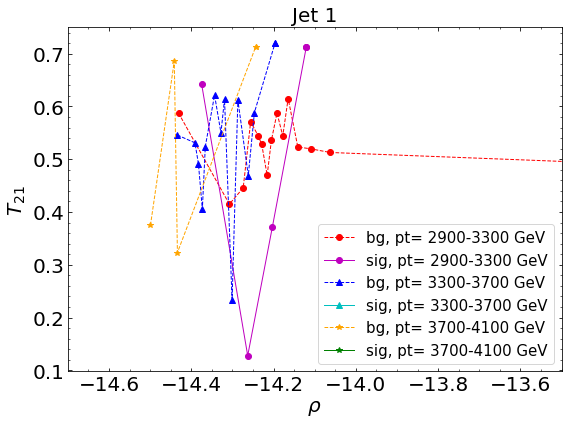

In [237]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_2900_3300, avgrho_bgJ1_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avgrho_sigJ1_ro_2900_3300, avgrho_sigJ1_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avgrho_bgJ1_ro_3300_3700, avgrho_bgJ1_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avgrho_sigJ1_ro_3300_3700, avgrho_sigJ1_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avgrho_bgJ1_ro_3700_4100, avgrho_bgJ1_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")
plt.plot(avgrho_sigJ1_ro_3700_4100, avgrho_sigJ1_T21_3700_4100, '*-', linewidth=1, color='green', label="sig, pt= 3700-4100 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim(-14.70, -13.50)

(-14.7, -13.5)

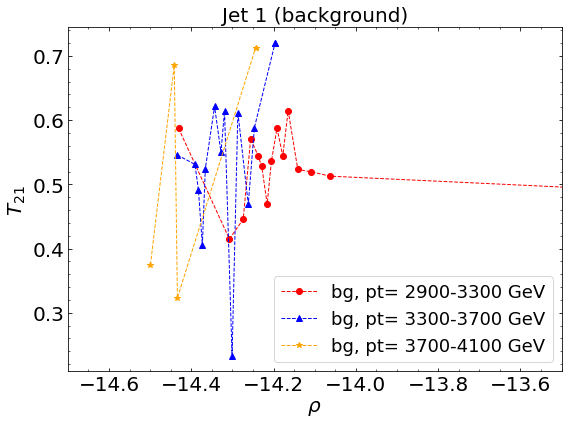

In [238]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ1_ro_2900_3300, avgrho_bgJ1_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avgrho_bgJ1_ro_3300_3700, avgrho_bgJ1_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avgrho_bgJ1_ro_3700_4100, avgrho_bgJ1_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1 (background)",fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.xlim(-14.70, -13.50)

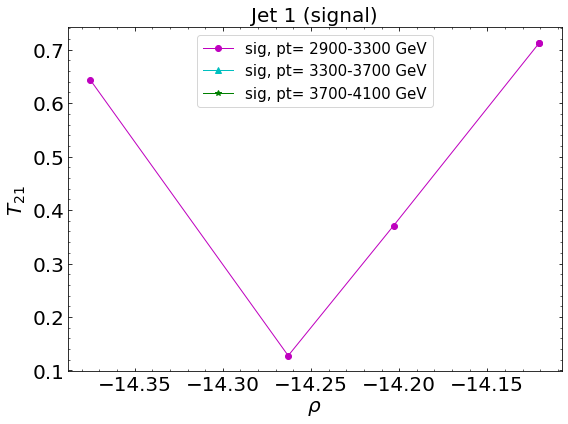

In [239]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_sigJ1_ro_2900_3300, avgrho_sigJ1_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avgrho_sigJ1_ro_3300_3700, avgrho_sigJ1_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avgrho_sigJ1_ro_3700_4100, avgrho_sigJ1_T21_3700_4100, '*-', linewidth=1, color='green', label="sig, pt= 3700-4100 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 1 (signal)",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

In [125]:
j2rho_bg_ro_pt2900_3300 = []
j2rho_bg_t21_pt2900_3300 = []

j2rho_bg_ro_pt3300_3700 = []
j2rho_bg_t21_pt3300_3700 = []

j2rho_bg_ro_pt3700_4100 = []
j2rho_bg_t21_pt3700_4100 = []


for t in range(1000000):
    
    if (grapf_jet2_bg_ro[t][2] >= 2900) and (grapf_jet2_bg_ro[t][2] <= 3300):
        j2rho_bg_ro_pt2900_3300.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt2900_3300.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 3300) and (grapf_jet2_bg_ro[t][2] <= 3700):
        j2rho_bg_ro_pt3300_3700.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt3300_3700.append(grapf_jet2_bg_ro[t][0])
        
    elif (grapf_jet2_bg_ro[t][2] > 3700) and (grapf_jet2_bg_ro[t][2] <= 4100):
        j2rho_bg_ro_pt3700_4100.append(grapf_jet2_bg_ro[t][1])
        j2rho_bg_t21_pt3700_4100.append(grapf_jet2_bg_ro[t][0])
        
        

        
datarho_j2_T21_ro_2900_3300 = pd.DataFrame({'ro': j2rho_bg_ro_pt2900_3300, 
                                            'T21': j2rho_bg_t21_pt2900_3300})
datarho_j2_T21_ro_3300_3700 = pd.DataFrame({'ro': j2rho_bg_ro_pt3300_3700, 
                                            'T21': j2rho_bg_t21_pt3300_3700})
datarho_j2_T21_ro_3700_4100 = pd.DataFrame({'ro': j2rho_bg_ro_pt3700_4100, 
                                            'T21': j2rho_bg_t21_pt3700_4100})


orderrho_bgJ2_2900_3300 = datarho_j2_T21_ro_2900_3300.sort_values('ro')
orderrho_bgJ2_3300_3700 = datarho_j2_T21_ro_3300_3700.sort_values('ro')
orderrho_bgJ2_3700_4100 = datarho_j2_T21_ro_3700_4100.sort_values('ro')


In [126]:
bgJ2rho_2900_3300 = orderrho_bgJ2_2900_3300.to_numpy()

avgrho_bgJ2_T21_2900_3300 = []
avgrho_bgJ2_ro_2900_3300 = []

Nrho_bgJ2_2900_3300 = math.ceil(len(orderrho_bgJ2_2900_3300['T21'])/15)

i = 0
sumrho_bgJ2_T21_2900_3300 = 0
sumrho_bgJ2_ro_2900_3300 = 0

for n in range(len(bgJ2rho_2900_3300)):
    sumrho_bgJ2_T21_2900_3300 = sumrho_bgJ2_T21_2900_3300 + bgJ2rho_2900_3300[n][1]
    sumrho_bgJ2_ro_2900_3300 = sumrho_bgJ2_ro_2900_3300 + bgJ2rho_2900_3300[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_2900_3300)-1:
        avgrho_bgJ2_T21_2900_3300.append(sumrho_bgJ2_T21_2900_3300/Nrho_bgJ2_2900_3300)
        avgrho_bgJ2_ro_2900_3300.append(sumrho_bgJ2_ro_2900_3300/Nrho_bgJ2_2900_3300)
        
    if i >= Nrho_bgJ2_2900_3300:
        avgrho_bgJ2_T21_2900_3300.append(sumrho_bgJ2_T21_2900_3300/Nrho_bgJ2_2900_3300)
        avgrho_bgJ2_ro_2900_3300.append(sumrho_bgJ2_ro_2900_3300/Nrho_bgJ2_2900_3300)
        sumrho_bgJ2_T21_2900_3300 = 0
        sumrho_bgJ2_ro_2900_3300 = 0
        i = 0
        


bgJ2rho_3300_3700 = orderrho_bgJ2_3300_3700.to_numpy()

avgrho_bgJ2_T21_3300_3700 = []
avgrho_bgJ2_ro_3300_3700 = []

Nrho_bgJ2_3300_3700 = math.ceil(len(orderrho_bgJ2_3300_3700['T21'])/15)

i = 0
sumrho_bgJ2_T21_3300_3700 = 0
sumrho_bgJ2_ro_3300_3700 = 0

for n in range(len(bgJ2rho_3300_3700)):
    sumrho_bgJ2_T21_3300_3700 = sumrho_bgJ2_T21_3300_3700 + bgJ2rho_3300_3700[n][1]
    sumrho_bgJ2_ro_3300_3700 = sumrho_bgJ2_ro_3300_3700 + bgJ2rho_3300_3700[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_3300_3700)-1:
        avgrho_bgJ2_T21_3300_3700.append(sumrho_bgJ2_T21_3300_3700/Nrho_bgJ2_3300_3700)
        avgrho_bgJ2_ro_3300_3700.append(sumrho_bgJ2_ro_3300_3700/Nrho_bgJ2_3300_3700)
        
    if i >= Nrho_bgJ2_3300_3700:
        avgrho_bgJ2_T21_3300_3700.append(sumrho_bgJ2_T21_3300_3700/Nrho_bgJ2_3300_3700)
        avgrho_bgJ2_ro_3300_3700.append(sumrho_bgJ2_ro_3300_3700/Nrho_bgJ2_3300_3700)
        sumrho_bgJ2_T21_3300_3700 = 0
        sumrho_bgJ2_ro_3300_3700 = 0
        i = 0
        
        

bgJ2rho_3700_4100 = orderrho_bgJ2_3700_4100.to_numpy()

avgrho_bgJ2_T21_3700_4100 = []
avgrho_bgJ2_ro_3700_4100 = []

Nrho_bgJ2_3700_4100 = math.ceil(len(orderrho_bgJ2_3700_4100['T21'])/15)

i = 0
sumrho_bgJ2_T21_3700_4100 = 0
sumrho_bgJ2_ro_3700_4100 = 0

for n in range(len(bgJ2rho_3700_4100)):
    sumrho_bgJ2_T21_3700_4100 = sumrho_bgJ2_T21_3700_4100 + bgJ2rho_3700_4100[n][1]
    sumrho_bgJ2_ro_3700_4100 = sumrho_bgJ2_ro_3700_4100 + bgJ2rho_3700_4100[n][0]      
    i = i+1
    
    if n == len(bgJ2rho_3700_4100)-1:
        avgrho_bgJ2_T21_3700_4100.append(sumrho_bgJ2_T21_3700_4100/Nrho_bgJ2_3700_4100)
        avgrho_bgJ2_ro_3700_4100.append(sumrho_bgJ2_ro_3700_4100/Nrho_bgJ2_3700_4100)
        
    if i >= Nrho_bgJ2_3700_4100:
        avgrho_bgJ2_T21_3700_4100.append(sumrho_bgJ2_T21_3700_4100/Nrho_bgJ2_3700_4100)
        avgrho_bgJ2_ro_3700_4100.append(sumrho_bgJ2_ro_3700_4100/Nrho_bgJ2_3700_4100)
        sumrho_bgJ2_T21_3700_4100 = 0
        sumrho_bgJ2_ro_3700_4100 = 0
        i = 0



In [133]:
j2rho_sig_ro_pt2900_3300 = []
j2rho_sig_t21_pt2900_3300 = []

j2rho_sig_ro_pt3300_3700 = []
j2rho_sig_t21_pt3300_3700 = []

j2rho_sig_ro_pt3700_4100 = []
j2rho_sig_t21_pt3700_4100 = []


for t in range(100000):
    
    if (grapf_jet2_sig_ro[t][2] >= 2900) and (grapf_jet2_sig_ro[t][2] <= 3300):
        j2rho_sig_ro_pt2900_3300.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt2900_3300.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 3300) and (grapf_jet2_sig_ro[t][2] <= 3700):
        j2rho_sig_ro_pt3300_3700.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt3300_3700.append(grapf_jet2_sig_ro[t][0])
        
    elif (grapf_jet2_sig_ro[t][2] > 3700) and (grapf_jet2_sig_ro[t][2] <= 4100):
        j2rho_sig_ro_pt3700_4100.append(grapf_jet2_sig_ro[t][1])
        j2rho_sig_t21_pt3700_4100.append(grapf_jet2_sig_ro[t][0])


        
datarho_j2sig_T21_ro_2900_3300 = pd.DataFrame({'ro': j2rho_sig_ro_pt2900_3300, 
                                               'T21': j2rho_sig_t21_pt2900_3300})
datarho_j2sig_T21_ro_3300_3700 = pd.DataFrame({'ro': j2rho_sig_ro_pt3300_3700, 
                                               'T21': j2rho_sig_t21_pt3300_3700})
datarho_j2sig_T21_ro_3700_4100 = pd.DataFrame({'ro': j2rho_sig_ro_pt3700_4100, 
                                               'T21': j2rho_sig_t21_pt3700_4100})


orderrho_sigJ2_2900_3300 = datarho_j2sig_T21_ro_2900_3300.sort_values('ro')
orderrho_sigJ2_3300_3700 = datarho_j2sig_T21_ro_3300_3700.sort_values('ro')
orderrho_sigJ2_3700_4100 = datarho_j2sig_T21_ro_3700_4100.sort_values('ro')


In [134]:
sigJ2rho_2900_3300 = orderrho_sigJ2_2900_3300.to_numpy()

avgrho_sigJ2_T21_2900_3300 = []
avgrho_sigJ2_ro_2900_3300 = []

Nrho_sigJ2_2900_3300 = math.ceil(len(orderrho_sigJ2_2900_3300['T21'])/15)

i = 0
sumrho_sigJ2_T21_2900_3300 = 0
sumrho_sigJ2_ro_2900_3300 = 0

for n in range(len(sigJ2rho_2900_3300)):
    sumrho_sigJ2_T21_2900_3300 = sumrho_sigJ2_T21_2900_3300 + sigJ2rho_2900_3300[n][1]
    sumrho_sigJ2_ro_2900_3300 = sumrho_sigJ2_ro_2900_3300 + sigJ2rho_2900_3300[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_2900_3300)-1:
        avgrho_sigJ2_T21_2900_3300.append(sumrho_sigJ2_T21_2900_3300/Nrho_sigJ2_2900_3300)
        avgrho_sigJ2_ro_2900_3300.append(sumrho_sigJ2_ro_2900_3300/Nrho_sigJ2_2900_3300)
        
    if i >= Nrho_sigJ2_2900_3300:
        avgrho_sigJ2_T21_2900_3300.append(sumrho_sigJ2_T21_2900_3300/Nrho_sigJ2_2900_3300)
        avgrho_sigJ2_ro_2900_3300.append(sumrho_sigJ2_ro_2900_3300/Nrho_sigJ2_2900_3300)
        sumrho_sigJ2_T21_2900_3300 = 0
        sumrho_sigJ2_ro_2900_3300 = 0
        i = 0
        


sigJ2rho_3300_3700 = orderrho_sigJ2_3300_3700.to_numpy()

avgrho_sigJ2_T21_3300_3700 = []
avgrho_sigJ2_ro_3300_3700 = []

Nrho_sigJ2_3300_3700 = math.ceil(len(orderrho_sigJ2_3300_3700['T21'])/15)

i = 0
sumrho_sigJ2_T21_3300_3700 = 0
sumrho_sigJ2_ro_3300_3700 = 0

for n in range(len(sigJ2rho_3300_3700)):
    sumrho_sigJ2_T21_3300_3700 = sumrho_sigJ2_T21_3300_3700 + sigJ2rho_3300_3700[n][1]
    sumrho_sigJ2_ro_3300_3700 = sumrho_sigJ2_ro_3300_3700 + sigJ2rho_3300_3700[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_3300_3700)-1:
        avgrho_sigJ2_T21_3300_3700.append(sumrho_sigJ2_T21_3300_3700/Nrho_sigJ2_3300_3700)
        avgrho_sigJ2_ro_3300_3700.append(sumrho_sigJ2_ro_3300_3700/Nrho_sigJ2_3300_3700)
        
    if i >= Nrho_sigJ2_3300_3700:
        avgrho_sigJ2_T21_3300_3700.append(sumrho_sigJ2_T21_3300_3700/Nrho_sigJ2_3300_3700)
        avgrho_sigJ2_ro_3300_3700.append(sumrho_sigJ2_ro_3300_3700/Nrho_sigJ2_3300_3700)
        sumrho_sigJ2_T21_3300_3700 = 0
        sumrho_sigJ2_ro_3300_3700 = 0
        i = 0
        
        

sigJ2rho_3700_4100 = orderrho_sigJ2_3700_4100.to_numpy()

avgrho_sigJ2_T21_3700_4100 = []
avgrho_sigJ2_ro_3700_4100 = []

Nrho_sigJ2_3700_4100 = math.ceil(len(orderrho_sigJ2_3700_4100['T21'])/15)

i = 0
sumrho_sigJ2_T21_3700_4100 = 0
sumrho_sigJ2_ro_3700_4100 = 0

for n in range(len(sigJ2rho_3700_4100)):
    sumrho_sigJ2_T21_3700_4100 = sumrho_sigJ2_T21_3700_4100 + sigJ2rho_3700_4100[n][1]
    sumrho_sigJ2_ro_3700_4100 = sumrho_sigJ2_ro_3700_4100 + sigJ2rho_3700_4100[n][0]      
    i = i+1
    
    if n == len(sigJ2rho_3700_4100)-1:
        avgrho_sigJ2_T21_3700_4100.append(sumrho_sigJ2_T21_3700_4100/Nrho_sigJ2_3700_4100)
        avgrho_sigJ2_ro_3700_4100.append(sumrho_sigJ2_ro_3700_4100/Nrho_sigJ2_3700_4100)
        
    if i >= Nrho_sigJ2_3700_4100:
        avgrho_sigJ2_T21_3700_4100.append(sumrho_sigJ2_T21_3700_4100/Nrho_sigJ2_3700_4100)
        avgrho_sigJ2_ro_3700_4100.append(sumrho_sigJ2_ro_3700_4100/Nrho_sigJ2_3700_4100)
        sumrho_sigJ2_T21_3700_4100 = 0
        sumrho_sigJ2_ro_3700_4100 = 0
        i = 0





(-14.7, -13.5)

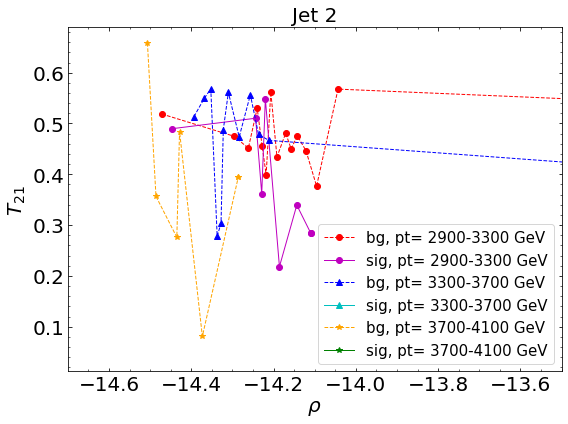

In [240]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_2900_3300, avgrho_bgJ2_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avgrho_sigJ2_ro_2900_3300, avgrho_sigJ2_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avgrho_bgJ2_ro_3300_3700, avgrho_bgJ2_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avgrho_sigJ2_ro_3300_3700, avgrho_sigJ2_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avgrho_bgJ2_ro_3700_4100, avgrho_bgJ2_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")
plt.plot(avgrho_sigJ2_ro_3700_4100, avgrho_sigJ2_T21_3700_4100, '*-', linewidth=1, color='green', label="sig, pt= 3700-4100 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim(-14.70, -13.50)

(-14.7, -13.5)

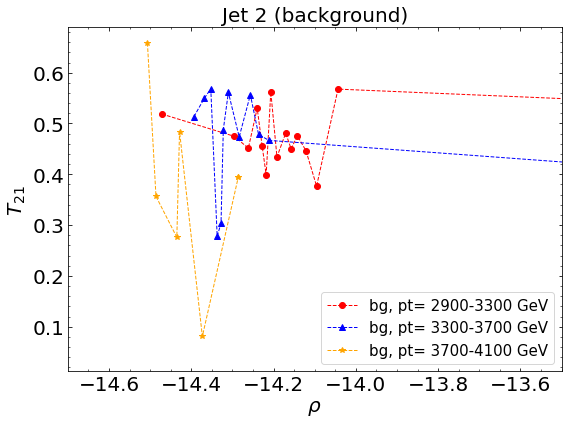

In [241]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_bgJ2_ro_2900_3300, avgrho_bgJ2_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avgrho_bgJ2_ro_3300_3700, avgrho_bgJ2_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avgrho_bgJ2_ro_3700_4100, avgrho_bgJ2_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")


plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2 (background)",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim(-14.70, -13.50)

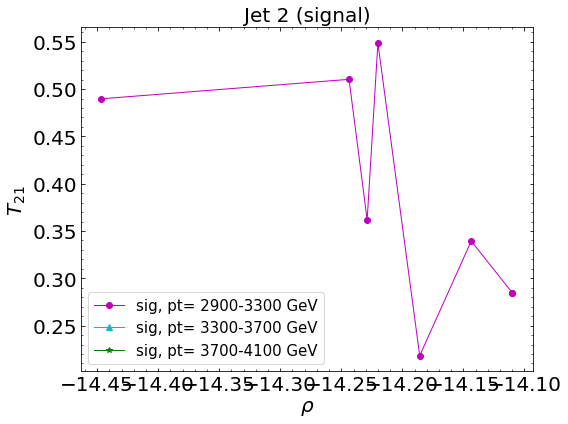

In [242]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.plot(avgrho_sigJ2_ro_2900_3300, avgrho_sigJ2_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avgrho_sigJ2_ro_3300_3700, avgrho_sigJ2_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avgrho_sigJ2_ro_3700_4100, avgrho_sigJ2_T21_3700_4100, '*-', linewidth=1, color='green', label="sig, pt= 3700-4100 GeV")

plt.xlabel(r'${\rho}$',fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.title("Jet 2 (signal)",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()

In [138]:
j1_bg_ro_pt2900_3300 = []
j1_bg_t21_pt2900_3300 = []

j1_bg_ro_pt3300_3700 = []
j1_bg_t21_pt3300_3700 = []

j1_bg_ro_pt3700_4100 = []
j1_bg_t21_pt3700_4100 = []


#1000000
for t in range(1000000):
    if (grapf_jet1_bg[t][2] >= 2900) and (grapf_jet1_bg[t][2] <= 3300):
        j1_bg_ro_pt2900_3300.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt2900_3300.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 3300) and (grapf_jet1_bg[t][2] <= 3700):
        j1_bg_ro_pt3300_3700.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt3300_3700.append(grapf_jet1_bg[t][0])
        
    elif (grapf_jet1_bg[t][2] > 3700) and (grapf_jet1_bg[t][2] <= 4100):
        j1_bg_ro_pt3700_4100.append(grapf_jet1_bg[t][1])
        j1_bg_t21_pt3700_4100.append(grapf_jet1_bg[t][0])
        


data_j1_T21_ro_2900_3300 = pd.DataFrame({'ro': j1_bg_ro_pt2900_3300, 
                                         'T21': j1_bg_t21_pt2900_3300})
data_j1_T21_ro_3300_3700 = pd.DataFrame({'ro': j1_bg_ro_pt3300_3700, 
                                         'T21': j1_bg_t21_pt3300_3700})
data_j1_T21_ro_3700_4100 = pd.DataFrame({'ro': j1_bg_ro_pt3700_4100, 
                                         'T21': j1_bg_t21_pt3700_4100})


order_bgJ1_2900_3300 = data_j1_T21_ro_2900_3300.sort_values('ro')
order_bgJ1_3300_3700 = data_j1_T21_ro_3300_3700.sort_values('ro')
order_bgJ1_3700_4100 = data_j1_T21_ro_3700_4100.sort_values('ro')



In [140]:
bgJ1_2900_3300 = order_bgJ1_2900_3300.to_numpy()
bgJ1_3300_3700 = order_bgJ1_3300_3700.to_numpy()
bgJ1_3700_4100 = order_bgJ1_3700_4100.to_numpy()


avg_bgJ1_T21_2900_3300 = []
avg_bgJ1_ro_2900_3300 = []

N_bgJ1_2900_3300 = math.ceil(len(order_bgJ1_2900_3300['T21'])/15)

i = 0
sum_bgJ1_T21_2900_3300 = 0
sum_bgJ1_ro_2900_3300 = 0

for n in range(len(bgJ1_2900_3300)):
    sum_bgJ1_T21_2900_3300 = sum_bgJ1_T21_2900_3300 + bgJ1_2900_3300[n][1]
    sum_bgJ1_ro_2900_3300 = sum_bgJ1_ro_2900_3300 + bgJ1_2900_3300[n][0]      
    i = i+1
    
    if n == len(bgJ1_2900_3300)-1:
        avg_bgJ1_T21_2900_3300.append(sum_bgJ1_T21_2900_3300/N_bgJ1_2900_3300)
        avg_bgJ1_ro_2900_3300.append(sum_bgJ1_ro_2900_3300/N_bgJ1_2900_3300)
        
    if i >= N_bgJ1_2900_3300:
        avg_bgJ1_T21_2900_3300.append(sum_bgJ1_T21_2900_3300/N_bgJ1_2900_3300)
        avg_bgJ1_ro_2900_3300.append(sum_bgJ1_ro_2900_3300/N_bgJ1_2900_3300)
        sum_bgJ1_T21_2900_3300 = 0
        sum_bgJ1_ro_2900_3300 = 0
        i = 0

        
avg_bgJ1_T21_3300_3700 = []
avg_bgJ1_ro_3300_3700 = []

N_bgJ1_3300_3700 = math.ceil(len(order_bgJ1_3300_3700['T21'])/15)

i = 0
sum_bgJ1_T21_3300_3700 = 0
sum_bgJ1_ro_3300_3700 = 0

for n in range(len(bgJ1_3300_3700)):
    sum_bgJ1_T21_3300_3700 = sum_bgJ1_T21_3300_3700 + bgJ1_3300_3700[n][1]
    sum_bgJ1_ro_3300_3700 = sum_bgJ1_ro_3300_3700 + bgJ1_3300_3700[n][0]      
    i = i+1
    
    if n == len(bgJ1_3300_3700)-1:
        avg_bgJ1_T21_3300_3700.append(sum_bgJ1_T21_3300_3700/N_bgJ1_3300_3700)
        avg_bgJ1_ro_3300_3700.append(sum_bgJ1_ro_3300_3700/N_bgJ1_3300_3700)
        
    if i >= N_bgJ1_3300_3700:
        avg_bgJ1_T21_3300_3700.append(sum_bgJ1_T21_3300_3700/N_bgJ1_3300_3700)
        avg_bgJ1_ro_3300_3700.append(sum_bgJ1_ro_3300_3700/N_bgJ1_3300_3700)
        sum_bgJ1_T21_3300_3700 = 0
        sum_bgJ1_ro_3300_3700 = 0
        i = 0


        
avg_bgJ1_T21_3700_4100 = []
avg_bgJ1_ro_3700_4100 = []

N_bgJ1_3700_4100 = math.ceil(len(order_bgJ1_3700_4100['T21'])/15)

i = 0
sum_bgJ1_T21_3700_4100 = 0
sum_bgJ1_ro_3700_4100 = 0

for n in range(len(bgJ1_3700_4100)):
    sum_bgJ1_T21_3700_4100 = sum_bgJ1_T21_3700_4100 + bgJ1_3700_4100[n][1]
    sum_bgJ1_ro_3700_4100 = sum_bgJ1_ro_3700_4100 + bgJ1_3700_4100[n][0]      
    i = i+1
    
    if n == len(bgJ1_3700_4100)-1:
        avg_bgJ1_T21_3700_4100.append(sum_bgJ1_T21_3700_4100/N_bgJ1_3700_4100)
        avg_bgJ1_ro_3700_4100.append(sum_bgJ1_ro_3700_4100/N_bgJ1_3700_4100)
        
    if i >= N_bgJ1_3700_4100:
        avg_bgJ1_T21_3700_4100.append(sum_bgJ1_T21_3700_4100/N_bgJ1_3700_4100)
        avg_bgJ1_ro_3700_4100.append(sum_bgJ1_ro_3700_4100/N_bgJ1_3700_4100)
        sum_bgJ1_T21_3700_4100 = 0
        sum_bgJ1_ro_3700_4100 = 0
        i = 0

        


In [152]:
j1_sig_ro_pt2900_3300 = []
j1_sig_t21_pt2900_3300 = []

j1_sig_ro_pt3300_3700 = []
j1_sig_t21_pt3300_3700 = []

j1_sig_ro_pt3700_4100 = []
j1_sig_t21_pt3700_4100 = []


#1000000
for t in range(100000):
        
    if (grapf_jet1_sig[t][2] >= 2900) and (grapf_jet1_sig[t][2] <= 3300):
        j1_sig_ro_pt2900_3300.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt2900_3300.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 3300) and (grapf_jet1_sig[t][2] <= 3700):
        j1_sig_ro_pt3300_3700.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt3300_3700.append(grapf_jet1_sig[t][0])
        
    elif (grapf_jet1_sig[t][2] > 3700) and (grapf_jet1_sig[t][2] <= 4100):
        j1_sig_ro_pt3700_4100.append(grapf_jet1_sig[t][1])
        j1_sig_t21_pt3700_4100.append(grapf_jet1_sig[t][0])
        


data_j1_sig_T21_ro_2900_3300 = pd.DataFrame({'ro': j1_sig_ro_pt2900_3300, 
                                             'T21': j1_sig_t21_pt2900_3300})
data_j1_sig_T21_ro_3300_3700 = pd.DataFrame({'ro': j1_sig_ro_pt3300_3700, 
                                             'T21': j1_sig_t21_pt3300_3700})
data_j1_sig_T21_ro_3700_4100 = pd.DataFrame({'ro': j1_sig_ro_pt3700_4100, 
                                             'T21': j1_sig_t21_pt3700_4100})



order_sigJ1_2900_3300 = data_j1_sig_T21_ro_2900_3300.sort_values('ro')
order_sigJ1_3300_3700 = data_j1_sig_T21_ro_3300_3700.sort_values('ro')
order_sigJ1_3700_4100 = data_j1_sig_T21_ro_3700_4100.sort_values('ro')


sigJ1_2900_3300 = order_sigJ1_2900_3300.to_numpy()
sigJ1_3300_3700 = order_sigJ1_3300_3700.to_numpy()
sigJ1_3700_4100 = order_sigJ1_3700_4100.to_numpy()


In [153]:
avg_sigJ1_T21_2900_3300 = []
avg_sigJ1_ro_2900_3300 = []

avg_sigJ1_T21_3300_3700 = []
avg_sigJ1_ro_3300_3700 = []

avg_sigJ1_T21_3700_4100 = []
avg_sigJ1_ro_3700_4100 = []



N_sigJ1_2900_3300 = math.ceil(len(order_sigJ1_2900_3300['T21'])/15)

i = 0
sum_sigJ1_T21_2900_3300 = 0
sum_sigJ1_ro_2900_3300 = 0

for n in range(len(sigJ1_2900_3300)):
    sum_sigJ1_T21_2900_3300 = sum_sigJ1_T21_2900_3300 + sigJ1_2900_3300[n][1]
    sum_sigJ1_ro_2900_3300 = sum_sigJ1_ro_2900_3300 + sigJ1_2900_3300[n][0]      
    i = i+1
        
    if i >= N_sigJ1_2900_3300:
            
        avg_sigJ1_T21_2900_3300.append(sum_sigJ1_T21_2900_3300/N_sigJ1_2900_3300)
        avg_sigJ1_ro_2900_3300.append(sum_sigJ1_ro_2900_3300/N_sigJ1_2900_3300)
        sum_sigJ1_T21_2900_3300 = 0
        sum_sigJ1_ro_2900_3300 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_2900_3300)-1:
        avg_sigJ1_T21_2900_3300.append(sum_sigJ1_T21_2900_3300/N_sigJ1_2900_3300)
        avg_sigJ1_ro_2900_3300.append(sum_sigJ1_ro_2900_3300/N_sigJ1_2900_3300)
         


N_sigJ1_3300_3700 = math.ceil(len(order_sigJ1_3300_3700['T21'])/15)

i = 0
sum_sigJ1_T21_3300_3700 = 0
sum_sigJ1_ro_3300_3700 = 0

for n in range(len(sigJ1_3300_3700)):
    sum_sigJ1_T21_3300_3700 = sum_sigJ1_T21_3300_3700 + sigJ1_3300_3700[n][1]
    sum_sigJ1_ro_3300_3700 = sum_sigJ1_ro_3300_3700 + sigJ1_3300_3700[n][0]      
    i = i+1
        
    if i >= N_sigJ1_3300_3700:
            
        avg_sigJ1_T21_3300_3700.append(sum_sigJ1_T21_3300_3700/N_sigJ1_3300_3700)
        avg_sigJ1_ro_3300_3700.append(sum_sigJ1_ro_3300_3700/N_sigJ1_3300_3700)
        sum_sigJ1_T21_3300_3700 = 0
        sum_sigJ1_ro_3300_3700 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_3300_3700)-1:
        avg_sigJ1_T21_3300_3700.append(sum_sigJ1_T21_3300_3700/N_sigJ1_3300_3700)
        avg_sigJ1_ro_3300_3700.append(sum_sigJ1_ro_3300_3700/N_sigJ1_3300_3700)
        
        
        
N_sigJ1_3700_4100 = math.ceil(len(order_sigJ1_3700_4100['T21'])/15)

i = 0
sum_sigJ1_T21_3700_4100 = 0
sum_sigJ1_ro_3700_4100 = 0

for n in range(len(sigJ1_3700_4100)):
    sum_sigJ1_T21_3700_4100 = sum_sigJ1_T21_3700_4100 + sigJ1_3700_4100[n][1]
    sum_sigJ1_ro_3700_4100 = sum_sigJ1_ro_3700_4100 + sigJ1_3700_4100[n][0]      
    i = i+1
        
    if i >= N_sigJ1_3700_4100:
            
        avg_sigJ1_T21_3700_4100.append(sum_sigJ1_T21_3700_4100/N_sigJ1_3700_4100)
        avg_sigJ1_ro_3700_4100.append(sum_sigJ1_ro_3700_4100/N_sigJ1_3700_4100)
        sum_sigJ1_T21_3700_4100 = 0
        sum_sigJ1_ro_3700_4100 = 0
        i = 0
        
    """  """ 
    if n == len(sigJ1_3700_4100)-1:
        avg_sigJ1_T21_3700_4100.append(sum_sigJ1_T21_3700_4100/N_sigJ1_3700_4100)
        avg_sigJ1_ro_3700_4100.append(sum_sigJ1_ro_3700_4100/N_sigJ1_3700_4100)
        
        
        


(-6.5, -5.8)

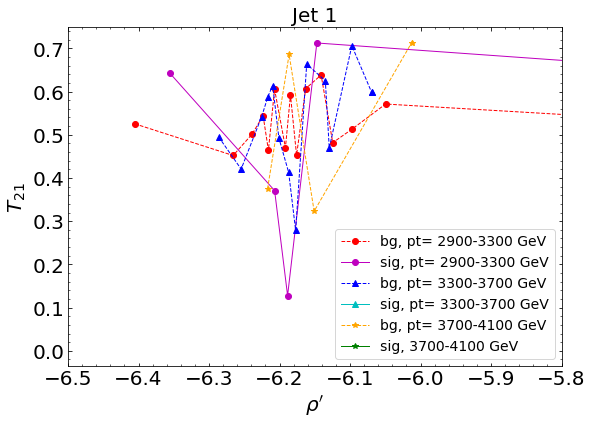

In [244]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_2900_3300, avg_bgJ1_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_sigJ1_ro_2900_3300, avg_sigJ1_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_bgJ1_ro_3300_3700, avg_bgJ1_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_sigJ1_ro_3300_3700, avg_sigJ1_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avg_bgJ1_ro_3700_4100, avg_bgJ1_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")
plt.plot(avg_sigJ1_ro_3700_4100, avg_sigJ1_T21_3700_4100, '*-', linewidth=1, color='g', label="sig, 3700-4100 GeV")

plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.xlim(-6.50,-5.80)

(-6.5, -5.8)

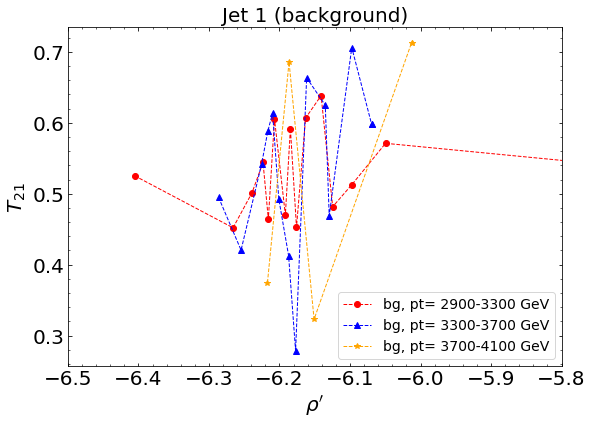

In [243]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_2900_3300, avg_bgJ1_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_bgJ1_ro_3300_3700, avg_bgJ1_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_bgJ1_ro_3700_4100, avg_bgJ1_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")

plt.title("Jet 1 (background)",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.xlim(-6.50,-5.80)

(-6.5, -5.8)

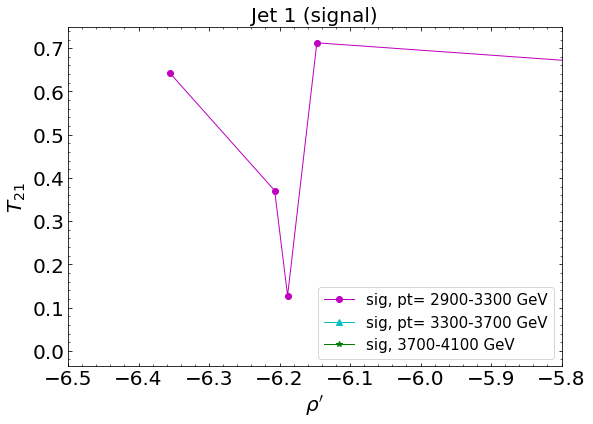

In [246]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_sigJ1_ro_2900_3300, avg_sigJ1_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_sigJ1_ro_3300_3700, avg_sigJ1_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avg_sigJ1_ro_3700_4100, avg_sigJ1_T21_3700_4100, '*-', linewidth=1, color='g', label="sig, 3700-4100 GeV")

plt.title("Jet 1 (signal)",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim(-6.50,-5.80)

In [166]:
j2_bg_ro_pt2900_3300 = []
j2_bg_t21_pt2900_3300 = []

j2_bg_ro_pt3300_3700 = []
j2_bg_t21_pt3300_3700 = []

j2_bg_ro_pt3700_4100 = []
j2_bg_t21_pt3700_4100 = []


#1000000
for t in range(1000000):

    if (grapf_jet2_bg[t][2] >= 2900) and (grapf_jet2_bg[t][2] <= 3300):
        j2_bg_ro_pt2900_3300.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt2900_3300.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 3300) and (grapf_jet2_bg[t][2] <= 3700):
        j2_bg_ro_pt3300_3700.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt3300_3700.append(grapf_jet2_bg[t][0])
        
    elif (grapf_jet2_bg[t][2] > 3700) and (grapf_jet2_bg[t][2] <= 4100):
        j2_bg_ro_pt3700_4100.append(grapf_jet2_bg[t][1])
        j2_bg_t21_pt3700_4100.append(grapf_jet2_bg[t][0])
        

data_j2_T21_ro_2900_3300 = pd.DataFrame({'ro': j2_bg_ro_pt2900_3300, 
                                         'T21': j2_bg_t21_pt2900_3300})
data_j2_T21_ro_3300_3700 = pd.DataFrame({'ro': j2_bg_ro_pt3300_3700, 
                                         'T21': j2_bg_t21_pt3300_3700})
data_j2_T21_ro_3700_4100 = pd.DataFrame({'ro': j2_bg_ro_pt3700_4100, 
                                         'T21': j2_bg_t21_pt3700_4100})


order_bgJ2_2900_3300 = data_j2_T21_ro_2900_3300.sort_values('ro')
order_bgJ2_3300_3700 = data_j2_T21_ro_3300_3700.sort_values('ro')
order_bgJ2_3700_4100 = data_j2_T21_ro_3700_4100.sort_values('ro')

bgJ2_2900_3300 = order_bgJ2_2900_3300.to_numpy()
bgJ2_3300_3700 = order_bgJ2_3300_3700.to_numpy()
bgJ2_3700_4100 = order_bgJ2_3700_4100.to_numpy()


In [168]:
avg_bgJ2_T21_2900_3300 = []
avg_bgJ2_ro_2900_3300 = []

N_bgJ2_2900_3300 = math.ceil(len(order_bgJ2_2900_3300['T21'])/15)

i = 0
sum_bgJ2_T21_2900_3300 = 0
sum_bgJ2_ro_2900_3300 = 0

for n in range(len(bgJ2_2900_3300)):
    sum_bgJ2_T21_2900_3300 = sum_bgJ2_T21_2900_3300 + bgJ2_2900_3300[n][1]
    sum_bgJ2_ro_2900_3300 = sum_bgJ2_ro_2900_3300 + bgJ2_2900_3300[n][0]      
    i = i+1
        
    if i >= N_bgJ2_2900_3300:
            
        avg_bgJ2_T21_2900_3300.append(sum_bgJ2_T21_2900_3300/N_bgJ2_2900_3300)
        avg_bgJ2_ro_2900_3300.append(sum_bgJ2_ro_2900_3300/N_bgJ2_2900_3300)
        sum_bgJ2_T21_2900_3300 = 0
        sum_bgJ2_ro_2900_3300 = 0
        i = 0
        
    """  """ 
    if n == len(bgJ2_2900_3300)-1:
        avg_bgJ2_T21_2900_3300.append(sum_bgJ2_T21_500/N_bgJ2_2900_3300)
        avg_bgJ2_ro_2900_3300.append(sum_bgJ2_ro_500/N_bgJ2_2900_3300)
         
    
avg_bgJ2_T21_3300_3700 = []
avg_bgJ2_ro_3300_3700 = []

N_bgJ2_3300_3700 = math.ceil(len(order_bgJ2_3300_3700['T21'])/15)

i = 0
sum_bgJ2_T21_3300_3700 = 0
sum_bgJ2_ro_3300_3700 = 0

for n in range(len(bgJ2_3300_3700)):
    sum_bgJ2_T21_3300_3700 = sum_bgJ2_T21_3300_3700 + bgJ2_3300_3700[n][1]
    sum_bgJ2_ro_3300_3700 = sum_bgJ2_ro_3300_3700 + bgJ2_3300_3700[n][0]      
    i = i+1
    
    if n == len(bgJ2_3300_3700)-1:
        avg_bgJ2_T21_3300_3700.append(sum_bgJ2_T21_3300_3700/N_bgJ2_3300_3700)
        avg_bgJ2_ro_3300_3700.append(sum_bgJ2_ro_3300_3700/N_bgJ2_3300_3700)
        
    if i >= N_bgJ2_3300_3700:
        avg_bgJ2_T21_3300_3700.append(sum_bgJ2_T21_3300_3700/N_bgJ2_3300_3700)
        avg_bgJ2_ro_3300_3700.append(sum_bgJ2_ro_3300_3700/N_bgJ2_3300_3700)
        sum_bgJ2_T21_3300_3700 = 0
        sum_bgJ2_ro_3300_3700 = 0
        i = 0

        
avg_bgJ2_T21_3700_4100 = []
avg_bgJ2_ro_3700_4100 = []

N_bgJ2_3700_4100 = math.ceil(len(order_bgJ2_3700_4100['T21'])/15)

i = 0
sum_bgJ2_T21_3700_4100 = 0
sum_bgJ2_ro_3700_4100 = 0

for n in range(len(bgJ2_3700_4100)):
    sum_bgJ2_T21_3700_4100 = sum_bgJ2_T21_3700_4100 + bgJ2_3700_4100[n][1]
    sum_bgJ2_ro_3700_4100 = sum_bgJ2_ro_3700_4100 + bgJ2_3700_4100[n][0]      
    i = i+1
    
    if n == len(bgJ2_3700_4100)-1:
        avg_bgJ2_T21_3700_4100.append(sum_bgJ2_T21_3700_4100/N_bgJ2_3700_4100)
        avg_bgJ2_ro_3700_4100.append(sum_bgJ2_ro_3700_4100/N_bgJ2_3700_4100)
        
    if i >= N_bgJ2_3700_4100:
        avg_bgJ2_T21_3700_4100.append(sum_bgJ2_T21_3700_4100/N_bgJ2_3700_4100)
        avg_bgJ2_ro_3700_4100.append(sum_bgJ2_ro_3700_4100/N_bgJ2_3700_4100)
        sum_bgJ2_T21_3700_4100 = 0
        sum_bgJ2_ro_3700_4100 = 0
        i = 0



In [169]:
j2_sig_ro_pt2900_3300 = []
j2_sig_t21_pt2900_3300 = []

j2_sig_ro_pt3300_3700 = []
j2_sig_t21_pt3300_3700 = []

j2_sig_ro_pt3700_4100 = []
j2_sig_t21_pt3700_4100 = []


#1000000
for t in range(100000):
        
    if (grapf_jet2_sig[t][2] >= 2900) and (grapf_jet2_sig[t][2] <= 3300):
        j2_sig_ro_pt2900_3300.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt2900_3300.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 3300) and (grapf_jet2_sig[t][2] <= 3700):
        j2_sig_ro_pt3300_3700.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt3300_3700.append(grapf_jet2_sig[t][0])
        
    elif (grapf_jet2_sig[t][2] > 3700) and (grapf_jet2_sig[t][2] <= 4100):
        j2_sig_ro_pt3700_4100.append(grapf_jet2_sig[t][1])
        j2_sig_t21_pt3700_4100.append(grapf_jet2_sig[t][0])



data_j2_sig_T21_ro_2900_3300 = pd.DataFrame({'ro': j2_sig_ro_pt2900_3300, 
                                             'T21': j2_sig_t21_pt2900_3300})
data_j2_sig_T21_ro_3300_3700 = pd.DataFrame({'ro': j2_sig_ro_pt3300_3700, 
                                             'T21': j2_sig_t21_pt3300_3700})
data_j2_sig_T21_ro_3700_4100 = pd.DataFrame({'ro': j2_sig_ro_pt3700_4100, 
                                             'T21': j2_sig_t21_pt3700_4100})


order_sigJ2_2900_3300 = data_j2_sig_T21_ro_2900_3300.sort_values('ro')
order_sigJ2_3300_3700 = data_j2_sig_T21_ro_3300_3700.sort_values('ro')
order_sigJ2_3700_4100 = data_j2_sig_T21_ro_3700_4100.sort_values('ro')


sigJ2_2900_3300 = order_sigJ2_2900_3300.to_numpy()
sigJ2_3300_3700 = order_sigJ2_3300_3700.to_numpy()
sigJ2_3700_4100 = order_sigJ2_3700_4100.to_numpy()


In [170]:
avg_sigJ2_T21_2900_3300 = []
avg_sigJ2_ro_2900_3300 = []

avg_sigJ2_T21_3300_3700 = []
avg_sigJ2_ro_3300_3700 = []

avg_sigJ2_T21_3700_4100 = []
avg_sigJ2_ro_3700_4100 = []




N_sigJ2_2900_3300 = math.ceil(len(order_sigJ2_2900_3300['T21'])/15)

i = 0
sum_sigJ2_T21_2900_3300 = 0
sum_sigJ2_ro_2900_3300 = 0

for n in range(len(sigJ2_2900_3300)):
    sum_sigJ2_T21_2900_3300 = sum_sigJ2_T21_2900_3300 + sigJ2_2900_3300[n][1]
    sum_sigJ2_ro_2900_3300 = sum_sigJ2_ro_2900_3300 + sigJ2_2900_3300[n][0]      
    i = i+1
    
    if n == len(sigJ2_2900_3300)-1:
        avg_sigJ2_T21_2900_3300.append(sum_sigJ2_T21_2900_3300/N_sigJ2_2900_3300)
        avg_sigJ2_ro_2900_3300.append(sum_sigJ2_ro_2900_3300/N_sigJ2_2900_3300)
        
    if i >= N_sigJ2_2900_3300:
            
        avg_sigJ2_T21_2900_3300.append(sum_sigJ2_T21_2900_3300/N_sigJ2_2900_3300)
        avg_sigJ2_ro_2900_3300.append(sum_sigJ2_ro_2900_3300/N_sigJ2_2900_3300)
        sum_sigJ2_T21_2900_3300 = 0
        sum_sigJ2_ro_2900_3300 = 0
        i = 0
    
         

N_sigJ2_3300_3700 = math.ceil(len(order_sigJ2_3300_3700['T21'])/15)

i = 0
sum_sigJ2_T21_3300_3700 = 0
sum_sigJ2_ro_3300_3700 = 0

for n in range(len(sigJ2_3300_3700)):
    sum_sigJ2_T21_3300_3700 = sum_sigJ2_T21_3300_3700 + sigJ2_3300_3700[n][1]
    sum_sigJ2_ro_3300_3700 = sum_sigJ2_ro_3300_3700 + sigJ2_3300_3700[n][0]      
    i = i+1
    
    if n == len(sigJ2_3300_3700)-1:
        avg_sigJ2_T21_3300_3700.append(sum_sigJ2_T21_3300_3700/N_sigJ2_3300_3700)
        avg_sigJ2_ro_3300_3700.append(sum_sigJ2_ro_3300_3700/N_sigJ2_3300_3700)
        
    if i >= N_sigJ2_3300_3700:           
        avg_sigJ2_T21_3300_3700.append(sum_sigJ2_T21_3300_3700/N_sigJ2_3300_3700)
        avg_sigJ2_ro_3300_3700.append(sum_sigJ2_ro_3300_3700/N_sigJ2_3300_3700)
        sum_sigJ2_T21_3300_3700 = 0
        sum_sigJ2_ro_3300_3700 = 0
        i = 0
        
    """  """ 

N_sigJ2_3700_4100 = math.ceil(len(order_sigJ2_3700_4100['T21'])/15)

i = 0
sum_sigJ2_T21_3700_4100 = 0
sum_sigJ2_ro_3700_4100 = 0

for n in range(len(sigJ2_3700_4100)):
    sum_sigJ2_T21_3700_4100 = sum_sigJ2_T21_3700_4100 + sigJ2_3700_4100[n][1]
    sum_sigJ2_ro_3700_4100 = sum_sigJ2_ro_3700_4100 + sigJ2_3700_4100[n][0]      
    i = i+1
            
    """  """ 
    if n == len(sigJ2_3700_4100)-1:
        avg_sigJ2_T21_3700_4100.append(sum_sigJ2_T21_3700_4100/N_sigJ2_3700_4100)
        avg_sigJ2_ro_3700_4100.append(sum_sigJ2_ro_3700_4100/N_sigJ2_3700_4100)
        
    if i >= N_sigJ2_3700_4100:
            
        avg_sigJ2_T21_3700_4100.append(sum_sigJ2_T21_3700_4100/N_sigJ2_3700_4100)
        avg_sigJ2_ro_3700_4100.append(sum_sigJ2_ro_3700_4100/N_sigJ2_3700_4100)
        sum_sigJ2_T21_3700_4100 = 0
        sum_sigJ2_ro_3700_4100 = 0
        i = 0


(-6.5, -5.9)

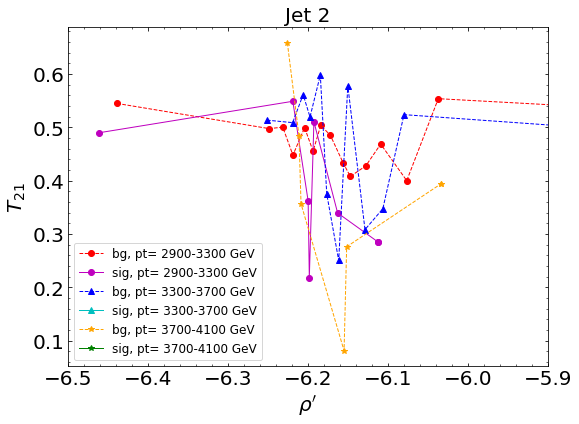

In [247]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_2900_3300, avg_bgJ2_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_sigJ2_ro_2900_3300, avg_sigJ2_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_bgJ2_ro_3300_3700, avg_bgJ2_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_sigJ2_ro_3300_3700, avg_sigJ2_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avg_bgJ2_ro_3700_4100, avg_bgJ2_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")
plt.plot(avg_sigJ2_ro_3700_4100, avg_sigJ2_T21_3700_4100, '*-', linewidth=1, color='g', label="sig, pt= 3700-4100 GeV")


plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()
plt.xlim([-6.5,-5.90])

(-6.5, -5.9)

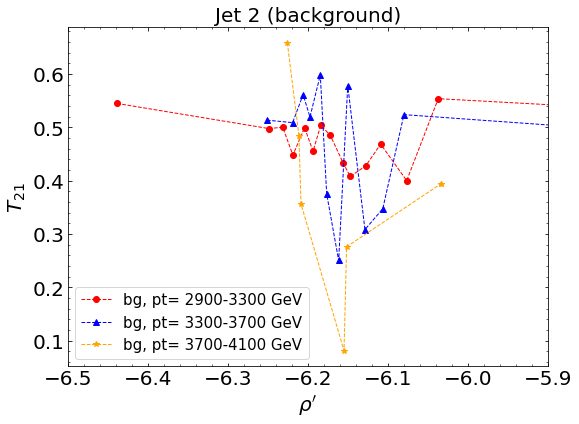

In [248]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_2900_3300, avg_bgJ2_T21_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_bgJ2_ro_3300_3700, avg_bgJ2_T21_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_bgJ2_ro_3700_4100, avg_bgJ2_T21_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")


plt.title("Jet 2 (background)",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim([-6.5,-5.90])

(-6.5, -5.9)

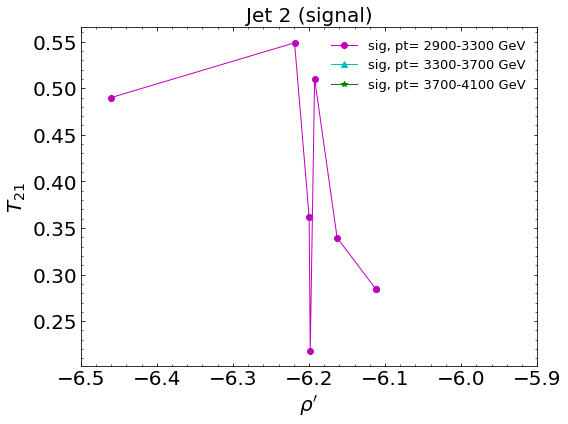

In [249]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_sigJ2_ro_2900_3300, avg_sigJ2_T21_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_sigJ2_ro_3300_3700, avg_sigJ2_T21_3300_3700, '^-', linewidth=1, color='c', label="sig, pt= 3300-3700 GeV")
plt.plot(avg_sigJ2_ro_3700_4100, avg_sigJ2_T21_3700_4100, '*-', linewidth=1, color='g', label="sig, pt= 3700-4100 GeV")


plt.title("Jet 2 (signal)",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$",fontsize=20)
plt.legend(frameon=False,fontsize=13,loc=1)
plt.tight_layout()
plt.xlim([-6.5,-5.90])

In [177]:
from sklearn.linear_model import LinearRegression

reglin_J1_bg_2900_3300 = LinearRegression()
ro_J1_bg_2900_3300 = np.array(avg_bgJ1_ro_2900_3300)
t21_J1_bg_2900_3300 = np.array(avg_bgJ1_T21_2900_3300)

reglin_J1_bg_2900_3300.fit(ro_J1_bg_2900_3300.reshape(-1, 1), t21_J1_bg_2900_3300)

b_J1_bg_2900_3300 = reglin_J1_bg_2900_3300.coef_[0]

T21prim_J1_bg_2900_3300 = []

for n in range(len(ro_J1_bg_2900_3300)):
    T21prim_J1_bg_2900_3300.append(t21_J1_bg_2900_3300[n]-ro_J1_bg_2900_3300[n]*b_J1_bg_2900_3300)
    

    
reglin_J1_bg_3300_3700 = LinearRegression()
ro_J1_bg_3300_3700 = np.array(avg_bgJ1_ro_3300_3700)
t21_J1_bg_3300_3700 = np.array(avg_bgJ1_T21_3300_3700)

reglin_J1_bg_3300_3700.fit(ro_J1_bg_3300_3700.reshape(-1, 1), t21_J1_bg_3300_3700)

b_J1_bg_3300_3700 = reglin_J1_bg_3300_3700.coef_[0]

T21prim_J1_bg_3300_3700 = []

for n in range(len(ro_J1_bg_3300_3700)):
    T21prim_J1_bg_3300_3700.append(t21_J1_bg_3300_3700[n]-ro_J1_bg_3300_3700[n]*b_J1_bg_3300_3700)
    

    
reglin_J1_bg_3700_4100 = LinearRegression()
ro_J1_bg_3700_4100 = np.array(avg_bgJ1_ro_3700_4100)
t21_J1_bg_3700_4100 = np.array(avg_bgJ1_T21_3700_4100)

reglin_J1_bg_3700_4100.fit(ro_J1_bg_3700_4100.reshape(-1, 1), t21_J1_bg_3700_4100)

b_J1_bg_3700_4100 = reglin_J1_bg_3700_4100.coef_[0]

T21prim_J1_bg_3700_4100 = []

for n in range(len(ro_J1_bg_3700_4100)):
    T21prim_J1_bg_3700_4100.append(t21_J1_bg_3700_4100[n]-ro_J1_bg_3700_4100[n]*b_J1_bg_3700_4100)
    

    


In [179]:


reglin_J1_sig_2900_3300 = LinearRegression()
ro_J1_sig_2900_3300 = np.array(avg_sigJ1_ro_2900_3300)
t21_J1_sig_2900_3300 = np.array(avg_sigJ1_T21_2900_3300)

reglin_J1_sig_2900_3300.fit(ro_J1_sig_2900_3300.reshape(-1, 1), t21_J1_sig_2900_3300)

b_J1_sig_2900_3300 = reglin_J1_sig_2900_3300.coef_[0]

T21prim_J1_sig_2900_3300 = []

for n in range(len(ro_J1_sig_2900_3300)):
    T21prim_J1_sig_2900_3300.append(t21_J1_sig_2900_3300[n]-ro_J1_sig_2900_3300[n]*b_J1_sig_2900_3300)
    

"""    
reglin_J1_sig_3300_3700 = LinearRegression()
ro_J1_sig_3300_3700 = np.array(avg_sigJ1_ro_3300_3700)
t21_J1_sig_3300_3700 = np.array(avg_sigJ1_T21_3300_3700)

reglin_J1_sig_3300_3700.fit(ro_J1_sig_3300_3700.reshape(-1, 1), t21_J1_sig_3300_3700)

b_J1_sig_3300_3700 = reglin_J1_sig_3300_3700.coef_[0]

T21prim_J1_sig_3300_3700 = []

for n in range(len(ro_J1_sig_3300_3700)):
    T21prim_J1_sig_3300_3700.append(t21_J1_sig_3300_3700[n]-ro_J1_sig_3300_3700[n]*b_J1_sig_3300_3700)
    

    
reglin_J1_sig_3700_4100 = LinearRegression()
ro_J1_sig_3700_4100 = np.array(avg_sigJ1_ro_3700_4100)
t21_J1_sig_3700_4100 = np.array(avg_sigJ1_T21_3700_4100)

reglin_J1_sig_3700_4100.fit(ro_J1_sig_3700_4100.reshape(-1, 1), t21_J1_sig_3700_4100)

b_J1_sig_3700_4100 = reglin_J1_sig_3700_4100.coef_[0]

T21prim_J1_sig_3700_4100 = []

for n in range(len(ro_J1_sig_3700_4100)):
    T21prim_J1_sig_3700_4100.append(t21_J1_sig_3700_4100[n]-ro_J1_sig_3700_4100[n]*b_J1_sig_3700_4100)
    
"""

'    \nreglin_J1_sig_3300_3700 = LinearRegression()\nro_J1_sig_3300_3700 = np.array(avg_sigJ1_ro_3300_3700)\nt21_J1_sig_3300_3700 = np.array(avg_sigJ1_T21_3300_3700)\n\nreglin_J1_sig_3300_3700.fit(ro_J1_sig_3300_3700.reshape(-1, 1), t21_J1_sig_3300_3700)\n\nb_J1_sig_3300_3700 = reglin_J1_sig_3300_3700.coef_[0]\n\nT21prim_J1_sig_3300_3700 = []\n\nfor n in range(len(ro_J1_sig_3300_3700)):\n    T21prim_J1_sig_3300_3700.append(t21_J1_sig_3300_3700[n]-ro_J1_sig_3300_3700[n]*b_J1_sig_3300_3700)\n    \n\n    \nreglin_J1_sig_3700_4100 = LinearRegression()\nro_J1_sig_3700_4100 = np.array(avg_sigJ1_ro_3700_4100)\nt21_J1_sig_3700_4100 = np.array(avg_sigJ1_T21_3700_4100)\n\nreglin_J1_sig_3700_4100.fit(ro_J1_sig_3700_4100.reshape(-1, 1), t21_J1_sig_3700_4100)\n\nb_J1_sig_3700_4100 = reglin_J1_sig_3700_4100.coef_[0]\n\nT21prim_J1_sig_3700_4100 = []\n\nfor n in range(len(ro_J1_sig_3700_4100)):\n    T21prim_J1_sig_3700_4100.append(t21_J1_sig_3700_4100[n]-ro_J1_sig_3700_4100[n]*b_J1_sig_3700_4100)\n   

(-6.5, -5.8)

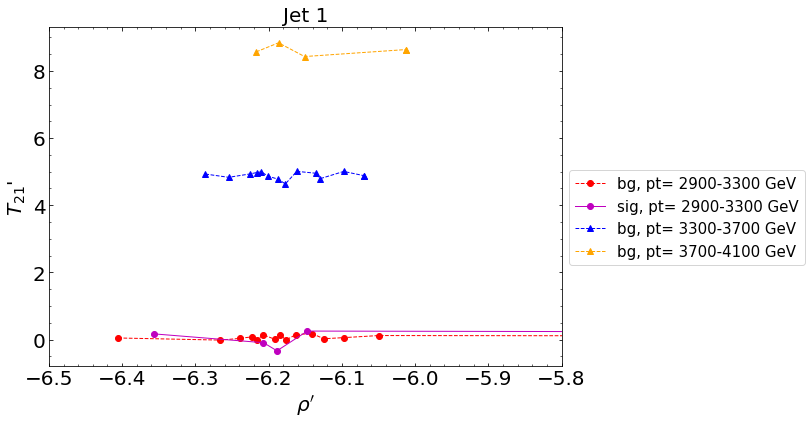

In [253]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ1_ro_2900_3300, T21prim_J1_bg_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_sigJ1_ro_2900_3300, T21prim_J1_sig_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_bgJ1_ro_3300_3700, T21prim_J1_bg_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_bgJ1_ro_3700_4100, T21prim_J1_bg_3700_4100, '^--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")



plt.title("Jet 1",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}$'",fontsize=20)
plt.legend(fontsize=15,bbox_to_anchor=(1.0, 0.6))
plt.tight_layout()
plt.xlim([-6.5,-5.8])

In [191]:
reglin_J2_bg_2900_3300 = LinearRegression()
ro_J2_bg_2900_3300 = np.array(avg_bgJ2_ro_2900_3300)
t21_J2_bg_2900_3300 = np.array(avg_bgJ2_T21_2900_3300)

reglin_J2_bg_2900_3300.fit(ro_J2_bg_2900_3300.reshape(-1, 1), t21_J2_bg_2900_3300)

b_J2_bg_2900_3300 = reglin_J2_bg_2900_3300.coef_[0]

T21prim_J2_bg_2900_3300 = []

for n in range(len(ro_J2_bg_2900_3300)):
    T21prim_J2_bg_2900_3300.append(t21_J2_bg_2900_3300[n]-ro_J2_bg_2900_3300[n]*b_J2_bg_2900_3300)
    

    
reglin_J2_bg_3300_3700 = LinearRegression()
ro_J2_bg_3300_3700 = np.array(avg_bgJ2_ro_3300_3700)
t21_J2_bg_3300_3700 = np.array(avg_bgJ2_T21_3300_3700)

reglin_J2_bg_3300_3700.fit(ro_J2_bg_3300_3700.reshape(-1, 1), t21_J2_bg_3300_3700)

b_J2_bg_3300_3700 = reglin_J2_bg_3300_3700.coef_[0]

T21prim_J2_bg_3300_3700 = []

for n in range(len(ro_J2_bg_3300_3700)):
    T21prim_J2_bg_3300_3700.append(t21_J2_bg_3300_3700[n]-ro_J2_bg_3300_3700[n]*b_J2_bg_3300_3700)
    

    
reglin_J2_bg_3700_4100 = LinearRegression()
ro_J2_bg_3700_4100 = np.array(avg_bgJ2_ro_3700_4100)
t21_J2_bg_3700_4100 = np.array(avg_bgJ2_T21_3700_4100)

reglin_J2_bg_3700_4100.fit(ro_J2_bg_3700_4100.reshape(-1, 1), t21_J2_bg_3700_4100)

b_J2_bg_3700_4100 = reglin_J2_bg_3700_4100.coef_[0]

T21prim_J2_bg_3700_4100 = []

for n in range(len(ro_J2_bg_3700_4100)):
    T21prim_J2_bg_3700_4100.append(t21_J2_bg_3700_4100[n]-ro_J2_bg_3700_4100[n]*b_J2_bg_3700_4100)
    



In [189]:


reglin_J2_sig_2900_3300 = LinearRegression()
ro_J2_sig_2900_3300 = np.array(avg_sigJ2_ro_2900_3300)
t21_J2_sig_2900_3300 = np.array(avg_sigJ2_T21_2900_3300)

reglin_J2_sig_2900_3300.fit(ro_J2_sig_2900_3300.reshape(-1, 1), t21_J2_sig_2900_3300)

b_J2_sig_2900_3300 = reglin_J2_sig_2900_3300.coef_[0]

T21prim_J2_sig_2900_3300 = []

for n in range(len(ro_J2_sig_2900_3300)):
    T21prim_J2_sig_2900_3300.append(t21_J2_sig_2900_3300[n]-ro_J2_sig_2900_3300[n]*b_J2_sig_2900_3300)
    


(-6.5, -5.8)

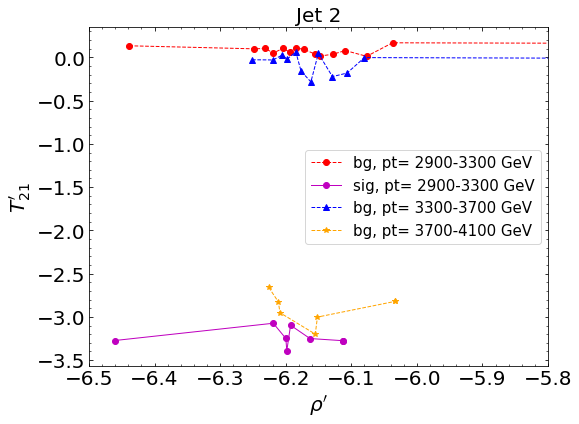

In [255]:
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(avg_bgJ2_ro_2900_3300, T21prim_J2_bg_2900_3300, 'o--', linewidth=1, color='r', label="bg, pt= 2900-3300 GeV")
plt.plot(avg_sigJ2_ro_2900_3300, T21prim_J2_sig_2900_3300, 'o-', linewidth=1, color='m', label="sig, pt= 2900-3300 GeV")
plt.plot(avg_bgJ2_ro_3300_3700, T21prim_J2_bg_3300_3700, '^--', linewidth=1, color='b', label="bg, pt= 3300-3700 GeV")
plt.plot(avg_bgJ2_ro_3700_4100, T21prim_J2_bg_3700_4100, '*--', linewidth=1, color='orange', label="bg, pt= 3700-4100 GeV")

plt.title("Jet 2",fontsize=20)
plt.xlabel(r"$\rho'$",fontsize=20)
plt.ylabel(r"$T_{21}'$",fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.xlim([-6.5,-5.8])

# T_{21}' vs T_{32} and T_{21} with CWoLa Model

In [77]:
alpha = 0.1

def load_dataT21(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2"]]
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)

    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta", "tau21jOne", "tau21jTwo"]]
    return dataset.to_numpy()

def load_dataT32(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)

    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau3jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jOne"] = dataset["tau3jOne"]/dataset["tau2jOne"]
    dataset["tau32jTwo"] = dataset["tau3jTwo"]/dataset["tau2jTwo"] 
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta", "tau32jOne", "tau32jTwo"]]
    return dataset.to_numpy()

def load_data_more(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    
    #Masa ya al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)

    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    
    #tau32
    dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau3jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jOne"] = dataset["tau3jOne"]/dataset["tau2jOne"]
    dataset["tau32jTwo"] = dataset["tau3jTwo"]/dataset["tau2jTwo"]   
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"]    
    
    #eta
    dataset["E1"] = ((1000*dataset["pT1"])**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5/1000.
    dataset["E2"] = ((1000*dataset["pT2"])**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5/1000.
    dataset["y1"] = 0.5*np.log((dataset["E1"] + input_frame["pzj1"]/1000.)/(dataset["E1"] - input_frame["pzj1"]/1000.))
    dataset["y2"] = 0.5*np.log((dataset["E2"] + input_frame["pzj2"]/1000.)/(dataset["E2"] - input_frame["pzj2"]/1000.))
    dataset["Dy"] = dataset["y1"]-dataset["y2"]
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta", "tau21jOne", "tau21jTwo", "tau32jOne", "tau32jTwo","pTjOne","pTjTwo","Dy"]]
    return dataset.to_numpy()

column_labelsT21 = [
    r"$m_{JJ}$",
    r"$m^{J_1}$",
    "$m^{J_2} - m^{J_1}$",
    r"$\tau_{2,1}^{J_1}$", 
    r"$\tau_{2,1}^{J_2}$",
]

column_labelsT32 = [
    r"$m_{JJ}$",
    r"$m^{J_1}$",
    "$m^{J_2} - m^{J_1}$",
    r"$\tau_{3,2}^{J_1}$", 
    r"$\tau_{3,2}^{J_2}$",
]

In [78]:
dataset_bgT21=load_dataT21(features_bg)
dataset_bg2T21=load_dataT21(features_bg2)
dataset_sigT21=load_dataT21(features_sig)

dataset_bgT32=load_dataT32(features_bg)
dataset_bg2T32=load_dataT32(features_bg2)
dataset_sigT32=load_dataT32(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
C:\Users\bolit\AppData\L

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]


In [79]:
from sklearn.model_selection import train_test_split

SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200

def sr_crit(d):
    print((d[:,0] < SR_high) & (d[:,0] >= SR_low))
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)

bg_srsbT21, bg2_srsbT21, sig_srsbT21 = sr_crit(dataset_bgT21), sr_crit(dataset_bg2T21), sr_crit(dataset_sigT21)

SR_background_dataT21 = dataset_bgT21[bg_srsbT21]
SB_background_dataT21 = dataset_bgT21[~bg_srsbT21]

SR_background_simT21 = dataset_bg2T21[bg2_srsbT21]
SB_background_simT21 = dataset_bg2T21[~bg2_srsbT21]

SR_signalT21 = dataset_sigT21[sig_srsbT21]
SB_signalT21 = dataset_sigT21[~sig_srsbT21]

N_inputs = len(SR_background_dataT21.T) - 1


((SR_background_dataT21, SR_background_data_fortestT21),
 (SR_background_simT21, SR_background_sim_fortestT21),
 (SB_background_dataT21, SB_background_data_fortestT21),
 (SB_background_simT21, SB_background_sim_fortestT21),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_dataT21, SR_background_simT21,
    SB_background_dataT21, SB_background_simT21,
]]

mn,mx = np.percentile(np.concatenate([SB_background_dataT21, SB_background_simT21, SR_background_dataT21, 
                                      SR_background_simT21]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signalT21)*Nsig/len(SR_signalT21)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signalT21[0:Nsig])/len(SR_background_dataT21)**0.5))
print(fmt.format('s/b ratio', len(SR_signalT21[0:Nsig])/len(SR_background_dataT21)))

n_injectionsT21 = 20
SR_signals_to_injectT21 = [None] * n_injectionsT21
SB_signals_to_injectT21 = [None] * n_injectionsT21
signals_to_testT21 = [None] * n_injectionsT21

for i in range(n_injectionsT21):
    idx = np.isin(range(len(SR_signalT21)), np.random.choice(SR_signalT21.shape[0], size=Nsig, replace=False))
    SR_signals_to_injectT21[i] = SR_signalT21[idx, :]
    signals_to_testT21[i] = SR_signalT21[~idx, :]
    
    idx = np.isin(range(len(SB_signalT21)), np.random.choice(SB_signalT21.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_injectT21[i] = SB_signalT21[idx, :]

[ True False False ... False False False]
[False False False ... False False  True]
[ True  True  True ...  True  True  True]
     # signal events:  1000
 signal significance:  4.059677443835412
           s/b ratio:  0.016480980947986026


In [80]:
#CWoLa with T21 and relu 
cwola_rocsT21 = pd.DataFrame(columns=['fpr', 'tpr'])
SB_width = 0.3

for i in tqdm.tqdm(range(n_injectionsT21)):
    
    SR_signal_to_injectT21 = SR_signals_to_injectT21[i]
    SB_signal_to_injectT21 = SB_signals_to_injectT21[i]

    signal_to_testT21 = signals_to_testT21[i]
        
    X_cwola_trainT21 = np.concatenate([SR_signal_to_injectT21, SR_background_dataT21, SB_signal_to_injectT21, SB_background_dataT21])
    Y_cwola_trainT21 = np.concatenate([np.ones(len(SR_signal_to_injectT21)), np.ones(len(SR_background_dataT21)),
                                    np.zeros(len(SB_signal_to_injectT21)), np.zeros(len(SB_background_dataT21))])
    
    X_cwola_trainT21, Y_cwola_trainT21 = shuffle(X_cwola_trainT21, Y_cwola_trainT21, )

    sbmjjT21 = X_cwola_trainT21[:,0]
    sb_critT21 = ((sbmjjT21 > SR_low - SB_width)&(sbmjjT21 <= SR_high + SB_width))
    
    X_cwola_trainT21 = X_cwola_trainT21[sb_critT21]
    Y_cwola_trainT21 = Y_cwola_trainT21[sb_critT21]
    
    w_lowT21 = 0.5*(len(SR_signal_to_injectT21) + len(SR_background_dataT21))/((X_cwola_trainT21[:,0] <= SR_low).sum())
    w_highT21 = 0.5*(len(SR_signal_to_injectT21) + len(SR_background_dataT21))/((X_cwola_trainT21[:,0] >= SR_high).sum())

    W_cwola_trainT21 = np.ones_like(Y_cwola_trainT21)
    W_cwola_trainT21[(Y_cwola_trainT21 == 0) & (X_cwola_trainT21[:,0] <= SR_low)] = w_lowT21
    W_cwola_trainT21[(Y_cwola_trainT21 == 0) & (X_cwola_trainT21[:,0] >= SR_high)] = w_highT21
    
    X_cwola_valT21 = np.concatenate([signal_to_testT21,SR_background_data_fortestT21])
    Y_cwola_valT21 = np.concatenate([np.ones(len(signal_to_testT21)),np.zeros(len(SR_background_data_fortestT21))])
    
    K.clear_session()
    model_cwolaT21 = Sequential()
    model_cwolaT21.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_cwolaT21.add(Dense(64, activation='relu'))
    model_cwolaT21.add(Dense(64, activation='relu'))
    model_cwolaT21.add(Dense(1, activation='sigmoid'))
    model_cwolaT21.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist_cwolaT21 = model_cwolaT21.fit(X_cwola_trainT21[:,1:], Y_cwola_trainT21, epochs=EPOCHS, 
                                 batch_size=batch_size, verbose=0, sample_weight=W_cwola_trainT21)

    scores_cwolaT21 = model_cwolaT21.predict(X_cwola_valT21[:,1:],batch_size=batch_size)
        
    fpr_cwolaT21, tpr_cwolaT21, _ = roc_curve(Y_cwola_valT21, scores_cwolaT21)
    cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
  5%|████▏                                                                              | 1/20 [01:29<28:24, 89.71s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 10%|████████▎                                                                          | 2/20 [02:58<26:42, 89.04s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 15%|████████████▍                                                                      | 3/20 [04:29<25:28, 89.90s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 20%|████████████████▌                                                                  | 4/20 [06:00<24:06, 90.42s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 25%|████████████████████▊                                                              | 5/20 [07:31<22:37, 90.52s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 30%|████████████████████████▉                                                          | 6/20 [09:00<20:59, 89.96s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 35%|█████████████████████████████                                                      | 7/20 [10:27<19:20, 89.26s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 40%|█████████████████████████████████▏                                                 | 8/20 [11:55<17:46, 88.91s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 45%|█████████████████████████████████████▎                                             | 9/20 [13:31<16:39, 90.86s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 50%|█████████████████████████████████████████                                         | 10/20 [15:00<15:02, 90.26s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 55%|█████████████████████████████████████████████                                     | 11/20 [16:27<13:25, 89.48s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 60%|█████████████████████████████████████████████████▏                                | 12/20 [17:55<11:52, 89.02s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 65%|█████████████████████████████████████████████████████▎                            | 13/20 [19:30<10:34, 90.64s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [20:59<09:02, 90.39s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [22:30<07:32, 90.42s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [24:03<06:04, 91.17s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [25:36<04:35, 91.87s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [27:16<03:08, 94.13s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [28:50<01:34, 94.04s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\3083969201.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21 = cwola_rocsT21.append({'fpr': fpr_cwolaT21, 'tpr': tpr_cwolaT21}, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [30:19<00:00, 90.96s/it]


In [81]:
SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200

def sr_crit(d):
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)

bg_srsbT32, bg2_srsbT32, sig_srsbT32 = sr_crit(dataset_bgT32), sr_crit(dataset_bg2T32), sr_crit(dataset_sigT32)

SR_background_dataT32 = dataset_bgT32[bg_srsbT32]
SB_background_dataT32 = dataset_bgT32[~bg_srsbT32]

SR_background_simT32 = dataset_bg2T32[bg2_srsbT32]
SB_background_simT32 = dataset_bg2T32[~bg2_srsbT32]

SR_signalT32 = dataset_sigT32[sig_srsbT32]
SB_signalT32 = dataset_sigT32[~sig_srsbT32]

N_inputs = len(SR_background_dataT32.T) - 1


((SR_background_dataT32, SR_background_data_fortestT32),
 (SR_background_simT32, SR_background_sim_fortestT32),
 (SB_background_dataT32, SB_background_data_fortestT32),
 (SB_background_simT32, SB_background_sim_fortestT32),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_dataT32, SR_background_simT32,
    SB_background_dataT32, SB_background_simT32,
]]

mn,mx = np.percentile(np.concatenate([SB_background_dataT32, SB_background_simT32, SR_background_dataT32, 
                                      SR_background_simT32]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signalT32)*Nsig/len(SR_signalT32)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signalT32[0:Nsig])/len(SR_background_dataT32)**0.5))
print(fmt.format('s/b ratio', len(SR_signalT32[0:Nsig])/len(SR_background_dataT32)))

n_injectionsT32 = 20
SR_signals_to_injectT32 = [None] * n_injectionsT32
SB_signals_to_injectT32 = [None] * n_injectionsT32
signals_to_testT32 = [None] * n_injectionsT32

for i in range(n_injectionsT32):
    idx = np.isin(range(len(SR_signalT32)), np.random.choice(SR_signalT32.shape[0], size=Nsig, replace=False))
    SR_signals_to_injectT32[i] = SR_signalT32[idx, :]
    signals_to_testT32[i] = SR_signalT32[~idx, :]
    
    idx = np.isin(range(len(SB_signalT32)), np.random.choice(SB_signalT32.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_injectT32[i] = SB_signalT32[idx, :]

     # signal events:  1000
 signal significance:  4.059677443835412
           s/b ratio:  0.016480980947986026


In [82]:
#CWoLa with T32 and relu
cwola_rocsT32 = pd.DataFrame(columns=['fpr', 'tpr'])
SB_width = 0.3

for i in tqdm.tqdm(range(n_injectionsT32)):
    
    SR_signal_to_injectT32 = SR_signals_to_injectT32[i]
    SB_signal_to_injectT32 = SB_signals_to_injectT32[i]

    signal_to_testT32 = signals_to_testT32[i]
        
    X_cwola_trainT32 = np.concatenate([SR_signal_to_injectT32, SR_background_dataT32, SB_signal_to_injectT32, SB_background_dataT32])
    Y_cwola_trainT32 = np.concatenate([np.ones(len(SR_signal_to_injectT32)), np.ones(len(SR_background_dataT32)),
                                    np.zeros(len(SB_signal_to_injectT32)), np.zeros(len(SB_background_dataT32))])
    
    X_cwola_trainT32, Y_cwola_trainT32 = shuffle(X_cwola_trainT32, Y_cwola_trainT32, )

    sbmjjT32 = X_cwola_trainT32[:,0]
    sb_critT32 = ((sbmjjT32 > SR_low - SB_width)&(sbmjjT32 <= SR_high + SB_width))
    
    X_cwola_trainT32 = X_cwola_trainT32[sb_critT32]
    Y_cwola_trainT32 = Y_cwola_trainT32[sb_critT32]
    
    w_lowT32 = 0.5*(len(SR_signal_to_injectT32) + len(SR_background_dataT32))/((X_cwola_trainT32[:,0] <= SR_low).sum())
    w_highT32 = 0.5*(len(SR_signal_to_injectT32) + len(SR_background_dataT32))/((X_cwola_trainT32[:,0] >= SR_high).sum())

    W_cwola_trainT32 = np.ones_like(Y_cwola_trainT32)
    W_cwola_trainT32[(Y_cwola_trainT32 == 0) & (X_cwola_trainT32[:,0] <= SR_low)] = w_lowT32
    W_cwola_trainT32[(Y_cwola_trainT32 == 0) & (X_cwola_trainT32[:,0] >= SR_high)] = w_highT32
    
    X_cwola_valT32 = np.concatenate([signal_to_testT32,SR_background_data_fortestT32])
    Y_cwola_valT32 = np.concatenate([np.ones(len(signal_to_testT32)),np.zeros(len(SR_background_data_fortestT32))])
    
    K.clear_session()
    model_cwolaT32 = Sequential()
    model_cwolaT32.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_cwolaT32.add(Dense(64, activation='relu'))
    model_cwolaT32.add(Dense(64, activation='relu'))
    model_cwolaT32.add(Dense(1, activation='sigmoid'))
    model_cwolaT32.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist_cwolaT32 = model_cwolaT32.fit(X_cwola_trainT32[:,1:], Y_cwola_trainT32, epochs=EPOCHS, 
                                 batch_size=batch_size, verbose=0, sample_weight=W_cwola_trainT32)

    scores_cwolaT32 = model_cwolaT32.predict(X_cwola_valT32[:,1:],batch_size=batch_size)
        
    fpr_cwolaT32, tpr_cwolaT32, _ = roc_curve(Y_cwola_valT32, scores_cwolaT32)
    cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
  5%|████▏                                                                              | 1/20 [01:29<28:17, 89.32s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 10%|████████▎                                                                          | 2/20 [03:00<27:11, 90.66s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 15%|████████████▍                                                                      | 3/20 [04:37<26:28, 93.47s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 20%|████████████████▌                                                                  | 4/20 [06:08<24:36, 92.30s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 25%|████████████████████▊                                                              | 5/20 [07:36<22:42, 90.80s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 30%|████████████████████████▉                                                          | 6/20 [09:06<21:07, 90.57s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 35%|█████████████████████████████                                                      | 7/20 [10:37<19:38, 90.66s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 40%|█████████████████████████████████▏                                                 | 8/20 [12:14<18:31, 92.62s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 45%|█████████████████████████████████████▎                                             | 9/20 [13:46<16:59, 92.64s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 50%|█████████████████████████████████████████                                         | 10/20 [15:15<15:14, 91.40s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 55%|█████████████████████████████████████████████                                     | 11/20 [16:46<13:40, 91.18s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 60%|█████████████████████████████████████████████████▏                                | 12/20 [18:13<12:00, 90.07s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 65%|█████████████████████████████████████████████████████▎                            | 13/20 [19:48<10:40, 91.44s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [21:21<09:11, 91.97s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [22:50<07:34, 90.95s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [24:17<05:59, 89.82s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [25:46<04:28, 89.52s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [27:22<03:03, 91.57s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [28:58<01:32, 92.91s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1169343743.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT32 = cwola_rocsT32.append({'fpr': fpr_cwolaT32, 'tpr': tpr_cwolaT32}, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [30:33<00:00, 91.69s/it]


In [83]:
#features_bg.head(10)

#t_bg = features_bg.head(1000)
#t_bg2 = features_bg2.head(1000)
#t_sig = features_sig.head(1000)

In [84]:
alpha = 0.1

def load_dataT21p(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    
    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    #dataset = dataset.sort_values("rhopjOne")
    
    linear_regression = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t21_J1 = np.array(dataset["tau21jOne"])
    
    tau21p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    for n in range(len(dataset["rhopjOne"])):
        if dataset["pTjOne"][n] <= 500:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 500) and (dataset["pTjOne"][n] <= 1000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_1000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1000) and (dataset["pTjOne"][n] <= 1500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_1500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1500) and (dataset["pTjOne"][n] <= 2000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_2000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2000) and (dataset["pTjOne"][n] <= 2500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_2500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2500) and (dataset["pTjOne"][n] <= 3000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_3000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 3000) and (dataset["pTjOne"][n] <= 3500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_3500*dataset["rhopjOne"][n])
            
        else:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg_4000*dataset["rhopjOne"][n])
    
    dataset["tau21pjOne"] = tau21p_J1
    
    print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression2 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t21_J2 = np.array(dataset["tau21jTwo"])
    
    linear_regression2.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2 = linear_regression2.coef_[0]
    
    dataset["tau21pjTwo"] = dataset["tau21jTwo"]-b_J2*dataset["tau21jTwo"]
    
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21pjOne","tau21pjTwo"]]
    dataset = dataset.sort_index()
    print(dataset)
    return dataset.to_numpy()




dataset_bgT21p=load_dataT21p(features_bg)
#dataset_bg2T21p=load_dataT21p(features_bg2)
#dataset_sigT21p=load_dataT21p(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584539098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584539098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

0         0.463959
1         0.611833
2         0.663790
3         0.155759
4         0.462138
            ...   
999995    0.084862
999996    0.724350
999997    0.530966
999998    0.519655
999999    0.511054
Name: tau21pjOne, Length: 1000000, dtype: float64
             mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
0       3.307219  0.369618  0.529720    0.463959    0.271660
1       3.107621  0.333761  0.677295    0.611833    0.535696
2       3.004895  0.372645  0.306565    0.663790    0.940985
3       3.233075  0.379105  0.626623    0.155759    0.609631
4       2.919346  0.369441  0.299320    0.462138    0.595775
...          ...       ...       ...         ...         ...
999995  3.283302  0.387100  0.417077    0.084862    0.699689
999996  3.021083  0.334351  0.406255    0.724350    0.723448
999997  4.283545  0.484826  0.767995    0.530966    0.865889
999998  2.784058  0.383593  0.537010    0.519655    0.235260
999999  2.926457  0.342266  0.393240    0.511054    0.946082

[1000000

In [85]:
alpha = 0.1

def load_dataT21p_sig(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    
    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    #dataset = dataset.sort_values("rhopjOne")
    
    linear_regression = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t21_J1 = np.array(dataset["tau21jOne"])
    
    tau21p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    print(dataset["pTjOne"][1000000])
    
    for n in range(len(dataset["rhopjOne"])):
        n = n + 1000000
        if dataset["pTjOne"][n] <= 500:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 500) and (dataset["pTjOne"][n] <= 1000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1000) and (dataset["pTjOne"][n] <= 1500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1500) and (dataset["pTjOne"][n] <= 2000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2000) and (dataset["pTjOne"][n] <= 2500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2500) and (dataset["pTjOne"][n] <= 3000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 3000) and (dataset["pTjOne"][n] <= 3500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n])
            
        else:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sigg_4000*dataset["rhopjOne"][n])
    
    dataset["tau21pjOne"] = tau21p_J1
    
    print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression2 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t21_J2 = np.array(dataset["tau21jTwo"])
    
    linear_regression2.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2 = linear_regression2.coef_[0]
    
    dataset["tau21pjTwo"] = dataset["tau21jTwo"]-b_J2*dataset["tau21jTwo"]
    
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21pjOne","tau21pjTwo"]]
    dataset = dataset.sort_index()
    print(dataset)
    return dataset.to_numpy()




#dataset_bgT21p=load_dataT21p(features_bg)
#dataset_bg2T21p=load_dataT21p_bg2(features_bg2)
dataset_sigT21p=load_dataT21p_sig(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\470164586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\470164586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

1914.942975899741
1000000    0.516879
1000001    0.405468
1000002    0.100171
1000003    0.581661
1000004    0.547901
             ...   
1099995    0.591478
1099996    0.364888
1099997    0.682958
1099998    0.118489
1099999    0.762587
Name: tau21pjOne, Length: 100000, dtype: float64
              mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
1000000  3.662211  0.471256  0.722760    0.516879    0.119951
1000001  3.586711  0.518537  0.713689    0.405468    0.296519
1000002  3.421777  0.435844  0.723829    0.100171    0.133958
1000003  3.536983  0.470025  0.798607    0.581661    0.291343
1000004  3.481574  0.456910  0.752420    0.547901    0.181030
...           ...       ...       ...         ...         ...
1099995  3.105457  0.419436  0.327840    0.591478    0.222800
1099996  3.622837  0.478003  0.735618    0.364888    0.200656
1099997  3.546809  0.445786  0.771621    0.682958    0.164213
1099998  3.607571  0.475695  0.799556    0.118489    0.518639
1099999  3.491635  0.503274  0.

In [86]:
alpha = 0.1

def load_dataT21p_bg2(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
       
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    
    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    #dataset = dataset.sort_values("rhopjOne")
    
    linear_regression = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t21_J1 = np.array(dataset["tau21jOne"])
    
    tau21p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    for n in range(len(dataset["rhopjOne"])):
        if dataset["pTjOne"][n] <= 500:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 500) and (dataset["pTjOne"][n] <= 1000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_1000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1000) and (dataset["pTjOne"][n] <= 1500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_1500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1500) and (dataset["pTjOne"][n] <= 2000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_2000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2000) and (dataset["pTjOne"][n] <= 2500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_2500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2500) and (dataset["pTjOne"][n] <= 3000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_3000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 3000) and (dataset["pTjOne"][n] <= 3500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_3500*dataset["rhopjOne"][n])
            
        else:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_bg2_4000*dataset["rhopjOne"][n])
    
    dataset["tau21pjOne"] = tau21p_J1
    
    print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression2 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t21_J2 = np.array(dataset["tau21jTwo"])
    
    linear_regression2.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2 = linear_regression2.coef_[0]
    
    dataset["tau21pjTwo"] = dataset["tau21jTwo"]-b_J2*dataset["tau21jTwo"]
    
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21pjOne","tau21pjTwo"]]
    dataset = dataset.sort_index()
    print(dataset)
    return dataset.to_numpy()




#dataset_bgT21p=load_dataT21p(features_bg)
dataset_bg2T21p=load_dataT21p_bg2(features_bg2)
#dataset_sigT21p=load_dataT21p(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584400212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584400212.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

0         0.282037
1         0.699687
2         0.709036
3         0.498769
4         0.047475
            ...   
999994    0.614729
999995    0.148748
999996    0.441618
999997    0.547615
999998    0.254599
Name: tau21pjOne, Length: 999999, dtype: float64
             mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
0       2.096182  0.276789  0.365517    0.282037    0.608052
1       2.397091  0.317239  0.404315    0.699687    0.240819
2       3.707095  0.466458  0.858282    0.709036    0.189218
3       4.376528  0.582550  0.733413    0.498769    0.632411
4       3.062404  0.358207  0.370862    0.047475    0.459338
...          ...       ...       ...         ...         ...
999994  2.872773  0.319426  1.051235    0.614729    0.519370
999995  3.933182  0.518312  0.601938    0.148748    0.747665
999996  3.028001  0.380325  0.645534    0.441618    0.203626
999997  3.198573  0.509275  0.763220    0.547615    0.219811
999998  3.638007  0.464279  0.414217    0.254599    0.658422

[999999 r

In [87]:
from sklearn.model_selection import train_test_split

SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200

def sr_crit(d):
    #print((d[:,0] < SR_high) & (d[:,0] >= SR_low))
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)

bg_srsbT21p, bg2_srsbT21p, sig_srsbT21p = sr_crit(dataset_bgT21p), sr_crit(dataset_bg2T21p), sr_crit(dataset_sigT21p)

SR_background_dataT21p = dataset_bgT21p[bg_srsbT21p]
SB_background_dataT21p = dataset_bgT21p[~bg_srsbT21p]

SR_background_simT21p = dataset_bg2T21p[bg2_srsbT21p]
SB_background_simT21p = dataset_bg2T21p[~bg2_srsbT21p]

SR_signalT21p = dataset_sigT21p[sig_srsbT21p]
SB_signalT21p = dataset_sigT21p[~sig_srsbT21p]

N_inputs = len(SR_background_dataT21p.T) - 1


((SR_background_dataT21p, SR_background_data_fortestT21p),
 (SR_background_simT21p, SR_background_sim_fortestT21p),
 (SB_background_dataT21p, SB_background_data_fortestT21p),
 (SB_background_simT21p, SB_background_sim_fortestT21p),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_dataT21p, SR_background_simT21p,
    SB_background_dataT21p, SB_background_simT21p,
]]

mn,mx = np.percentile(np.concatenate([SB_background_dataT21p, SB_background_simT21p, SR_background_dataT21p, 
                                      SR_background_simT21p]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signalT21p)*Nsig/len(SR_signalT21p)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signalT21p[0:Nsig])/len(SR_background_dataT21p)**0.5))
print(fmt.format('s/b ratio', len(SR_signalT21p[0:Nsig])/len(SR_background_dataT21p)))

n_injectionsT21p = 20
SR_signals_to_injectT21p = [None] * n_injectionsT21p
SB_signals_to_injectT21p = [None] * n_injectionsT21p
signals_to_testT21p = [None] * n_injectionsT21p

for i in range(n_injectionsT21p):
    idx = np.isin(range(len(SR_signalT21p)), np.random.choice(SR_signalT21p.shape[0], size=Nsig, replace=False))
    SR_signals_to_injectT21p[i] = SR_signalT21p[idx, :]
    signals_to_testT21p[i] = SR_signalT21p[~idx, :]
    
    idx = np.isin(range(len(SB_signalT21p)), np.random.choice(SB_signalT21p.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_injectT21p[i] = SB_signalT21p[idx, :]





#CWoLa with T21p and relu 
cwola_rocsT21p = pd.DataFrame(columns=['fpr', 'tpr'])
SB_width = 0.3

for i in tqdm.tqdm(range(n_injectionsT21p)):
    
    SR_signal_to_injectT21p = SR_signals_to_injectT21p[i]
    SB_signal_to_injectT21p = SB_signals_to_injectT21p[i]

    signal_to_testT21p = signals_to_testT21p[i]
        
    X_cwola_trainT21p = np.concatenate([SR_signal_to_injectT21p, SR_background_dataT21p, SB_signal_to_injectT21p, SB_background_dataT21p])
    Y_cwola_trainT21p = np.concatenate([np.ones(len(SR_signal_to_injectT21p)), np.ones(len(SR_background_dataT21p)),
                                    np.zeros(len(SB_signal_to_injectT21p)), np.zeros(len(SB_background_dataT21p))])
    
    X_cwola_trainT21p, Y_cwola_trainT21p = shuffle(X_cwola_trainT21p, Y_cwola_trainT21p, )

    sbmjjT21p = X_cwola_trainT21p[:,0]
    sb_critT21p = ((sbmjjT21p > SR_low - SB_width)&(sbmjjT21p <= SR_high + SB_width))
    
    X_cwola_trainT21p = X_cwola_trainT21p[sb_critT21p]
    Y_cwola_trainT21p = Y_cwola_trainT21p[sb_critT21p]
    
    w_lowT21p = 0.5*(len(SR_signal_to_injectT21p) + len(SR_background_dataT21p))/((X_cwola_trainT21p[:,0] <= SR_low).sum())
    w_highT21p = 0.5*(len(SR_signal_to_injectT21p) + len(SR_background_dataT21p))/((X_cwola_trainT21p[:,0] >= SR_high).sum())

    W_cwola_trainT21p = np.ones_like(Y_cwola_trainT21p)
    W_cwola_trainT21p[(Y_cwola_trainT21p == 0) & (X_cwola_trainT21p[:,0] <= SR_low)] = w_lowT21p
    W_cwola_trainT21p[(Y_cwola_trainT21p == 0) & (X_cwola_trainT21p[:,0] >= SR_high)] = w_highT21p
    
    X_cwola_valT21p = np.concatenate([signal_to_testT21p,SR_background_data_fortestT21p])
    Y_cwola_valT21p = np.concatenate([np.ones(len(signal_to_testT21p)),np.zeros(len(SR_background_data_fortestT21p))])
    
    K.clear_session()
    model_cwolaT21p = Sequential()
    model_cwolaT21p.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_cwolaT21p.add(Dense(64, activation='relu'))
    model_cwolaT21p.add(Dense(64, activation='relu'))
    model_cwolaT21p.add(Dense(1, activation='sigmoid'))
    model_cwolaT21p.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist_cwolaT21p = model_cwolaT21p.fit(X_cwola_trainT21p[:,1:], Y_cwola_trainT21p, epochs=EPOCHS, 
                                 batch_size=batch_size, verbose=0, sample_weight=W_cwola_trainT21p) #ya no

    scores_cwolaT21p = model_cwolaT21p.predict(X_cwola_valT21p[:,1:],batch_size=batch_size) #en X solo los datos de CWoLa
        
    fpr_cwolaT21p, tpr_cwolaT21p, _ = roc_curve(Y_cwola_valT21p, scores_cwolaT21p)
    cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)

     # signal events:  1000
 signal significance:  4.059677443835412
           s/b ratio:  0.016480980947986026


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
  5%|████▏                                                                              | 1/20 [01:30<28:31, 90.08s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 10%|████████▎                                                                          | 2/20 [03:02<27:22, 91.27s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 15%|████████████▍                                                                      | 3/20 [04:35<26:08, 92.27s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 20%|████████████████▌                                                                  | 4/20 [06:09<24:47, 92.99s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 25%|████████████████████▊                                                              | 5/20 [07:42<23:11, 92.79s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 30%|████████████████████████▉                                                          | 6/20 [09:15<21:39, 92.82s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 35%|█████████████████████████████                                                      | 7/20 [10:50<20:15, 93.54s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 40%|█████████████████████████████████▏                                                 | 8/20 [12:25<18:51, 94.28s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 45%|█████████████████████████████████████▎                                             | 9/20 [14:01<17:23, 94.82s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 50%|████████████████████████████████████████▌                                        | 10/20 [17:34<21:50, 131.02s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 55%|████████████████████████████████████████████▌                                    | 11/20 [19:06<17:51, 119.09s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 60%|████████████████████████████████████████████████▌                                | 12/20 [20:37<14:44, 110.60s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 65%|████████████████████████████████████████████████████▋                            | 13/20 [22:10<12:17, 105.35s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 70%|████████████████████████████████████████████████████████▋                        | 14/20 [23:43<10:10, 101.69s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [25:13<08:10, 98.13s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [26:41<06:19, 94.95s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [28:08<04:38, 92.79s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [29:44<03:06, 93.49s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [31:21<01:34, 94.52s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\46914131.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cwola_rocsT21p = cwola_rocsT21p.append({'fpr': fpr_cwolaT21p, 'tpr': tpr_cwolaT21p}, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [32:52<00:00, 98.65s/it]


In [88]:
 with np.errstate(divide='ignore'):
    tpr_pts = np.linspace(0, 1, 10000)
    
    # CWoLa T21
    fpr_interp = [None] * len(cwola_rocsT21)

    for i, row in cwola_rocsT21.iterrows():
        fpr, tpr = row
        interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

        fpr_pts = interp(tpr_pts)
        fpr_interp[i] = fpr_pts

    fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

    cwola_maxT21 = np.nanmax(fpr_interp, axis=0).data
    cwola_minT21 = np.nanmin(fpr_interp, axis=0).data
    cwola_medT21 = np.median(fpr_interp, axis=0).data
    cwola_meanT21 = np.nanmean(fpr_interp, axis=0).data
    cwola_stdT21 = np.nanstd(fpr_interp, axis=0).data
    
    sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
    cwola_smeanT21 = np.nanmean(sig_interp, axis=0).data
    cwola_sstdT21 = np.nanstd(sig_interp, axis=0).data
    
    
    # CWoLa T32
    fpr_interp = [None] * len(cwola_rocsT32)

    for i, row in cwola_rocsT32.iterrows():
        fpr, tpr = row
        interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

        fpr_pts = interp(tpr_pts)
        fpr_interp[i] = fpr_pts

    fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

    cwola_maxT32 = np.nanmax(fpr_interp, axis=0).data
    cwola_minT32 = np.nanmin(fpr_interp, axis=0).data
    cwola_medT32 = np.median(fpr_interp, axis=0).data
    cwola_meanT32 = np.nanmean(fpr_interp, axis=0).data
    cwola_stdT32 = np.nanstd(fpr_interp, axis=0).data
    
    sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
    cwola_smeanT32 = np.nanmean(sig_interp, axis=0).data
    cwola_sstdT32 = np.nanstd(sig_interp, axis=0).data
    
    
    # CWoLa T21'
    fpr_interp = [None] * len(cwola_rocsT21p)

    for i, row in cwola_rocsT21p.iterrows():
        fpr, tpr = row
        interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

        fpr_pts = interp(tpr_pts)
        fpr_interp[i] = fpr_pts

    fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

    cwola_maxT21p = np.nanmax(fpr_interp, axis=0).data
    cwola_minT21p = np.nanmin(fpr_interp, axis=0).data
    cwola_medT21p = np.median(fpr_interp, axis=0).data
    cwola_meanT21p = np.nanmean(fpr_interp, axis=0).data
    cwola_stdT21p = np.nanstd(fpr_interp, axis=0).data
    
    sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
    cwola_smeanT21p = np.nanmean(sig_interp, axis=0).data
    cwola_sstdT21p = np.nanstd(sig_interp, axis=0).data

C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [89]:
bands = {'cwola_T21': (cwola_maxT21, cwola_medT21, cwola_minT21, cwola_meanT21, cwola_stdT21, cwola_smeanT21, cwola_sstdT21, {'label':'$T_{21}$', 'color':'blue'}),
         'cwola_T32': (cwola_maxT32, cwola_medT32, cwola_minT32, cwola_meanT32, cwola_stdT32, cwola_smeanT32, cwola_sstdT32, {'label':'$T_{32}$', 'color':'red'}),}

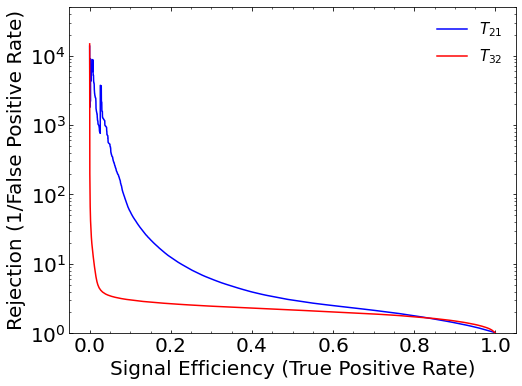

In [90]:
# Plot without banding
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale("log")
plt.ylim([1,5*1e4])
ERR=False
#plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='green')

for band in bands:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands[band][3:5]

    plt.plot(tpr_pts, mu, **bands[band][-1])
    if ERR:
        plt.fill_between(tpr_pts, mu - std, mu + std, alpha=.2, color=bands[band][-1]['color'])
#plt.plot(tpr_sup,1./tpr_sup,color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Rejection (1/False Positive Rate)",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right")

In [91]:
bands2 = {'cwola_T21': (cwola_maxT21, cwola_medT21, cwola_minT21, cwola_meanT21, cwola_stdT21, cwola_smeanT21, cwola_sstdT21, {'label':'$T_{21}$', 'color':'blue'}),
          'cwola_T32': (cwola_maxT32, cwola_medT32, cwola_minT32, cwola_meanT32, cwola_stdT32, cwola_smeanT32, cwola_sstdT32, {'label':'$T_{32}$', 'color':'red'}),
          'cwola_T21p': (cwola_maxT21p, cwola_medT21p, cwola_minT21p, cwola_meanT21p, cwola_stdT21p, cwola_smeanT21p, cwola_sstdT21p, {'label':"$T_{21}$'", 'color':'green'})}

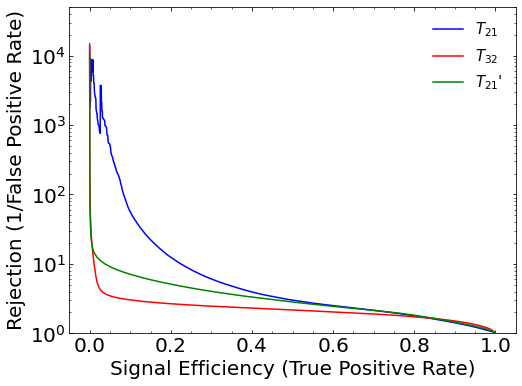

In [92]:
# Plot without banding
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale("log")
plt.ylim([1,5*1e4])
ERR=False
#plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='green')

for band in bands2:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands2[band][3:5]

    plt.plot(tpr_pts, mu, **bands2[band][-1])
    if ERR:
        plt.fill_between(tpr_pts, mu - std, mu + std, alpha=.2, color=bands2[band][-1]['color'])
#plt.plot(tpr_sup,1./tpr_sup,color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Rejection (1/False Positive Rate)",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right")

# ANN, ANN with decorrelated data, CWoLa and extra models comparison

In [93]:
# Autoencoder
dataset_bg_inSR = dataset_bgT21p[sr_crit(dataset_bgT21p)]
dataset_sig_inSR = dataset_sigT21p[sr_crit(dataset_sigT21p)]
ae_rocs = pd.DataFrame(columns=['fpr', 'tpr'])

for i in tqdm.tqdm(range(n_injectionsT21p)):
    
    X_ae_train = dataset_bg_inSR[0:int(0.5*len(dataset_bg_inSR)),1:]
    X_ae_val = np.concatenate([dataset_bg_inSR[int(0.5*len(dataset_bg_inSR)):, 1:],
                               dataset_sig_inSR[:, 1:]])
    Y_ae_val = np.concatenate([np.zeros(len(dataset_bg_inSR[int(0.5*len(dataset_bg_inSR)):, 1:])),
                               np.ones(len(dataset_sig_inSR[:, 1:]))])
    
    model_ae = Sequential()
    model_ae.add(Dense(64, input_dim=4, activation='relu'))
    #model_ae.add(Dense(64, activation='relu'))
    model_ae.add(Dense(2, activation='relu'))
    model_ae.add(Dense(64, activation='relu'))
    #model_ae.add(Dense(64, activation='relu'))
    model_ae.add(Dense(4, activation='linear'))
    model_ae.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    hist_ae = model_ae.fit(X_ae_train, X_ae_train, epochs=EPOCHS, 
                           batch_size=batch_size, verbose=0)  
    
    #ae_save_folder = 'models/autoencoder/'
    #if not os.path.exists(ae_save_folder):
        #os.makedirs(ae_save_folder)
    #model_ae.save('models/autoencoder/model_%i'%i)
    
    scores_ae = model_ae.predict(X_ae_val,batch_size=batch_size,verbose=0)
    mses_ae = np.linalg.norm(scores_ae-X_ae_val,axis=1)
    
    if (False):
        plt.hist(mses_ae[Y_sup_train==0],bins=np.linspace(0,1,20),alpha=0.5,label="Background",density=True)
        plt.hist(mses_ae[Y_sup_train==1],bins=np.linspace(0,1,20),alpha=0.5,label="Signal",density=True)
        plt.xlabel("MSE")
        plt.legend(frameon=False)
        
    fpr_ae, tpr_ae, _ = roc_curve(Y_ae_val, mses_ae)
    ae_rocs = ae_rocs.append({'fpr': fpr_ae, 'tpr': tpr_ae}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1199695161.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ae_rocs = ae_rocs.append({'fpr': fpr_ae, 'tpr': tpr_ae}, ignore_index=True)
  5%|████▏                                                                              | 1/20 [00:10<03:13, 10.19s/it]C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1199695161.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ae_rocs = ae_rocs.append({'fpr': fpr_ae, 'tpr': tpr_ae}, ignore_index=True)
 10%|████████▎                                                                          | 2/20 [00:20<03:05, 10.32s/it]C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1199695161.py:40: FutureWarning: The f

In [94]:
# autoencoder
fpr_interp = [None] * len(ae_rocs)
    
for i, row in ae_rocs.iterrows():
    fpr, tpr = row
    interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts = interp(tpr_pts)
    fpr_interp[i] = fpr_pts

fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

ae_max = np.nanmax(fpr_interp, axis=0).data
ae_min = np.nanmin(fpr_interp, axis=0).data
ae_med = np.median(fpr_interp, axis=0).data
ae_mean = np.nanmean(fpr_interp, axis=0).data
ae_std = np.nanstd(fpr_interp, axis=0).data
    
sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
ae_smean = np.nanmean(sig_interp, axis=0).data
ae_sstd = np.nanstd(sig_interp, axis=0).data

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2450094283.py:11: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))
C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [95]:
alpha = 0.1

def load_dataTp(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2","label"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    
    #T_{32} Jet 1
    dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jOne"] = dataset["tau3jOne"]/dataset["tau2jOne"]
    
    
    #T_{32} Jet 2
    dataset["tau3jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jTwo"] = dataset["tau3jTwo"]/dataset["tau2jTwo"]    
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    

    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    #dataset = dataset.sort_values("rhopjOne")
    
    linear_regression = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t21_J1 = np.array(dataset["tau21jOne"])
    
    tau21p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    print(len(dataset["rhopjOne"]))
    
    print(dataset["pTjOne"])
    
    for n in range(len(dataset["rhopjOne"])):
        
        #n = n + 1000000
        #print(n)
        if dataset["pTjOne"][n] <= 500:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 500) and (dataset["pTjOne"][n] <= 1000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1000) and (dataset["pTjOne"][n] <= 1500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1500) and (dataset["pTjOne"][n] <= 2000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2000) and (dataset["pTjOne"][n] <= 2500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2500) and (dataset["pTjOne"][n] <= 3000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3000*dataset["rhopjOne"][n])
            
        else:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n])
        """ 
        elif (dataset["pTjOne"][n] > 3000) and (dataset["pTjOne"][n] <= 3500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n])
            
        #else:
            #tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_4000*dataset["rhopjOne"][n])
        else:
            tau21p_J1.append(0)
        """   
    
    dataset["tau21pjOne"] = tau21p_J1
    
    print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression2 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t21_J2 = np.array(dataset["tau21jTwo"])
    
    linear_regression2.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2 = linear_regression2.coef_[0]
    
    dataset["tau21pjTwo"] = dataset["tau21jTwo"]-b_J2*dataset["tau21jTwo"]
    
    
    
    
    
    
    
    
    linear_regression3 = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t32_J1 = np.array(dataset["tau32jOne"])
    
    tau32p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    #print(dataset["pTjOne"][1000000])
    
    for n2 in range(len(dataset["rhopjOne"])):
        #n2 = n2 + 1000000
        if dataset["pTjOne"][n2] <= 500:
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 500) and (dataset["pTjOne"][n2] <= 1000):
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_1000*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 1000) and (dataset["pTjOne"][n2] <= 1500):
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_1500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 1500) and (dataset["pTjOne"][n2] <= 2000):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_2000*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 2000) and (dataset["pTjOne"][n2] <= 2500):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_2500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 2500) and (dataset["pTjOne"][n2] <= 3000):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3000*dataset["rhopjOne"][n2])
            
        else:
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n2])
          
        """
        elif (dataset["pTjOne"][n2] > 3000) and (dataset["pTjOne"][n2] <= 3500):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n2])
          
        
        #else:
            #tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_4000*dataset["rhopjOne"][n2])
            
        else:
            tau32p_J1.append(0)
        """
    
    dataset["tau32pjOne"] = tau32p_J1
    
    #print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression4 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t32_J2 = np.array(dataset["tau32jTwo"])
    
    linear_regression4.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2_32 = linear_regression4.coef_[0]
    
    dataset["tau32pjTwo"] = dataset["tau32jTwo"]-b_J2_32*dataset["tau32jTwo"]
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])
    
    #eta
    dataset["E1"] = ((1000*dataset["pT1"])**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5/1000.
    dataset["E2"] = ((1000*dataset["pT2"])**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5/1000.
    dataset["y1"] = 0.5*np.log((dataset["E1"] + input_frame["pzj1"]/1000.)/(dataset["E1"] - input_frame["pzj1"]/1000.))
    dataset["y2"] = 0.5*np.log((dataset["E2"] + input_frame["pzj2"]/1000.)/(dataset["E2"] - input_frame["pzj2"]/1000.))
    dataset["Dy"] = dataset["y1"]-dataset["y2"]

    

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21pjOne","tau21pjTwo","tau32pjOne","tau32pjTwo","pTjOne","pTjTwo","Dy","label"]]
    #dataset = dataset[["mjj","mjOne","mjDelta", "tau21jOne", "tau21jTwo", "tau32jOne", "tau32jTwo","pTjOne","pTjTwo","Dy"]]
    
    
    dataset = dataset.sort_index()
    #print(dataset)
    return dataset






In [96]:
alpha = 0.1

def load_dataT(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2","label"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    
    #T_{32} Jet 1
    dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jOne"] = dataset["tau3jOne"]/dataset["tau2jOne"]
    
    
    #T_{32} Jet 2
    dataset["tau3jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jTwo"] = dataset["tau3jTwo"]/dataset["tau2jTwo"]    
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    

    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])

    

    dataset = dataset.fillna(0)
    dataset = dataset[["tau21jOne","tau21jTwo","tau32jOne","tau32jTwo","label"]]
    #dataset = dataset[["mjj","mjOne","mjDelta", "tau21jOne", "tau21jTwo", "tau32jOne", "tau32jTwo","pTjOne","pTjTwo","Dy"]]
    
    
    dataset = dataset.sort_index()
    #print(dataset)
    return dataset






In [97]:
def load (basedir, name, model=None):

    # Import(s)
    from keras.models import load_model

    # Load full pre-trained model or model weights
    if model is None:
        model = load_model(basedir + '{}.h5'.format(name))
    else:
        model.load_weights(basedir + '{}_weights.h5'.format(name))
        pass

    # Load associated training histories
    try:
        history_file = basedir + 'history__{}.json'.format(name)
        with open(history_file, 'r') as f:
            history = json.load(f)
            pass
    except:
        print ("[WARN] Could not find history file {}.") #
        history = None
        pass

    return model, history

In [98]:
 # Define variable(s)
name    = 'classifier'
#Change to: "place where you have the folder" + "/CWoLa_ANN_Analysis/output/"
basedir = '/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/output/'

ann_rocsp = pd.DataFrame(columns=['fpr', 'tpr'])




datap = load_dataTp(original_data)

Xp = datap[["tau21pjOne","tau21pjTwo","tau32pjOne","tau32pjTwo"]].values
Yp = datap["label"].values

#print(Y)

classifierp, historyp = load(basedir, name)

# Predict
scores_annp = classifierp.predict(Xp, batch_size = 1024)


fpr_annp, tpr_annp, _ = roc_curve(Yp, scores_annp)

#print(fpr_ann)

ann_rocsp = ann_rocsp.append({'fpr': fpr_annp, 'tpr': tpr_annp}, ignore_index=True)


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

1100000
0          1589.568464
1           622.454251
2          1390.784209
3          1255.513485
4          1415.794362
              ...     
1099995    1001.325622
1099996    1289.501837
1099997    1381.171137
1099998    1745.240519
1099999    1591.161193
Name: pTjOne, Length: 1100000, dtype: float64
0          0.547871
1          0.410560
2          0.887101
3          0.372684
4          0.687149
             ...   
1099995    0.591478
1099996    0.364888
1099997    0.682958
1099998    0.118489
1099999    0.762587
Name: tau21pjOne, Length: 1100000, dtype: float64
[WARN] Could not find history file {}.
1075/1075 [==============================] - 2s 2ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1558521013.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_rocsp = ann_rocsp.append({'fpr': fpr_annp, 'tpr': tpr_annp}, ignore_index=True)


In [99]:
# ANN_p
fpr_interpp = [None] * len(ann_rocsp)
    
for i, row in ann_rocsp.iterrows():
    fprp, tprp = row
    interpp = interpolate.interp1d(tprp, fprp, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_ptsp = interpp(tpr_pts)
    fpr_interpp[i] = fpr_ptsp

fpr_interpp = np.ma.masked_invalid(1./np.array(fpr_interpp))

ann_maxp = np.nanmax(fpr_interpp, axis=0).data
ann_minp = np.nanmin(fpr_interpp, axis=0).data
ann_medp = np.median(fpr_interpp, axis=0).data
ann_meanp = np.nanmean(fpr_interpp, axis=0).data
ann_stdp = np.nanstd(fpr_interpp, axis=0).data
   
sig_interpp = np.ma.masked_invalid(np.sqrt(fpr_interpp))
    
ann_smeanp = np.nanmean(sig_interpp, axis=0).data
ann_sstdp = np.nanstd(sig_interpp, axis=0).data

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1280761755.py:11: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interpp = np.ma.masked_invalid(1./np.array(fpr_interpp))
C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [100]:
 # Define variable(s)
name    = 'classifier'
#Change to: "place where you have the folder" + "/CWoLa_ANN_Analysis/output/"
basedir = '/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/output/'

ann_rocs = pd.DataFrame(columns=['fpr', 'tpr'])



data = load_dataT(original_data)

# Prepare arrays
X = data[["tau21jOne","tau21jTwo","tau32jOne","tau32jTwo"]].values
Y = data["label"].values

#print(Y)

classifier, history = load(basedir, name)

# Predict
scores_ann = classifier.predict(X, batch_size = 1024)


fpr_ann, tpr_ann, _ = roc_curve(Y, scores_ann)

#print(fpr_ann)

ann_rocs = ann_rocs.append({'fpr': fpr_ann, 'tpr': tpr_ann}, ignore_index=True)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2374451860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2374451860.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

[WARN] Could not find history file {}.
1075/1075 [==============================] - 2s 2ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2942859756.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ann_rocs = ann_rocs.append({'fpr': fpr_ann, 'tpr': tpr_ann}, ignore_index=True)


In [101]:
# ANN
fpr_interp = [None] * len(ann_rocs)
    
for i, row in ann_rocs.iterrows():
    fpr, tpr = row
    interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts = interp(tpr_pts)
    fpr_interp[i] = fpr_pts

fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

ann_max = np.nanmax(fpr_interp, axis=0).data
ann_min = np.nanmin(fpr_interp, axis=0).data
ann_med = np.median(fpr_interp, axis=0).data
ann_mean = np.nanmean(fpr_interp, axis=0).data
ann_std = np.nanstd(fpr_interp, axis=0).data
   
sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
ann_smean = np.nanmean(sig_interp, axis=0).data
ann_sstd = np.nanstd(sig_interp, axis=0).data

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1081347376.py:11: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))
C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [102]:
bands3 = {'cwola_T21': (cwola_maxT21, cwola_medT21, cwola_minT21, cwola_meanT21, cwola_stdT21, cwola_smeanT21, cwola_sstdT21, {'label':'$T_{21}$', 'color':'blue'}),
          'cwola_T32': (cwola_maxT32, cwola_medT32, cwola_minT32, cwola_meanT32, cwola_stdT32, cwola_smeanT32, cwola_sstdT32, {'label':'$T_{32}$', 'color':'red'}),
          'cwola_T21p': (cwola_maxT21p, cwola_medT21p, cwola_minT21p, cwola_meanT21p, cwola_stdT21p, cwola_smeanT21p, cwola_sstdT21p, {'label':"$T_{21}$'", 'color':'green'}),
          'ANN': (ann_max, ann_med, ann_min, ann_mean, ann_std, ann_smean, ann_sstd, {'label':'ANN', 'color':'tab:orange'}),
          'ANNp': (ann_maxp, ann_medp, ann_minp, ann_meanp, ann_stdp, ann_smeanp, ann_sstdp, {'label':'ANN decorrelated', 'color':'tab:purple'})}

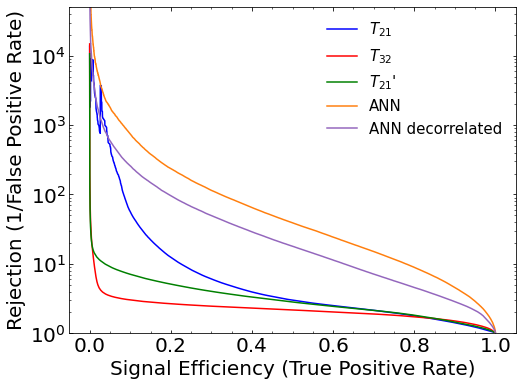

In [103]:
# Plot without banding
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale("log")
plt.ylim([1,5*1e4])
ERR=False
#plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='green')

for band in bands3:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands3[band][3:5]

    plt.plot(tpr_pts, mu, **bands3[band][-1])
    if ERR:
        plt.fill_between(tpr_pts, mu - std, mu + std, alpha=.2, color=bands2[band][-1]['color'])
#plt.plot(tpr_sup,1./tpr_sup,color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Rejection (1/False Positive Rate)",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right")

In [104]:
dataset_bg_more=load_data_more(features_bg)
dataset_bg2_more=load_data_more(features_bg2)
dataset_sig_more=load_data_more(features_sig)

dataset_bg=load_dataT21(features_bg)
dataset_bg2=load_dataT21(features_bg2)
dataset_sig=load_dataT21(features_sig)

dataset_bgT32=load_dataT32(features_bg)
dataset_bg2T32=load_dataT32(features_bg2)
dataset_sigT32=load_dataT32(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
C:\Users\bolit\AppData\L

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\259476259.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]


In [105]:
from sklearn.model_selection import train_test_split

SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200
SB_width = 0.3

def sr_crit(d):
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)



bg_srsb, bg2_srsb, sig_srsb = sr_crit(dataset_bg_more), sr_crit(dataset_bg2_more), sr_crit(dataset_sig_more)

SR_background_data = dataset_bg[bg_srsb]
SB_background_data = dataset_bg[~bg_srsb]
print(~bg_srsb)

SR_background_sim = dataset_bg2[bg2_srsb]
SB_background_sim = dataset_bg2[~bg2_srsb]

SR_signal = dataset_sig[sig_srsb]
SB_signal = dataset_sig[~sig_srsb]

N_inputs = len(SR_background_data.T) - 1


((SR_background_data, SR_background_data_fortest),
 (SR_background_sim, SR_background_sim_fortest),
 (SB_background_data, SB_background_data_fortest),
 (SB_background_sim, SB_background_sim_fortest),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_data, SR_background_sim,
    SB_background_data, SB_background_sim,
]]

mn,mx = np.percentile(np.concatenate([SB_background_data, SB_background_sim, SR_background_data, 
                                      SR_background_sim]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signal)*Nsig/len(SR_signal)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signal[0:Nsig])/len(SR_background_data)**0.5))
print(fmt.format('s/b ratio', len(SR_signal[0:Nsig])/len(SR_background_data)))

n_injections = 20
SR_signals_to_inject = [None] * n_injections
SB_signals_to_inject = [None] * n_injections
signals_to_test = [None] * n_injections

for i in range(n_injections):
    idx = np.isin(range(len(SR_signal)), np.random.choice(SR_signal.shape[0], size=Nsig, replace=False))
    SR_signals_to_inject[i] = SR_signal[idx, :]
    signals_to_test[i] = SR_signal[~idx, :]
    
    idx = np.isin(range(len(SB_signal)), np.random.choice(SB_signal.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_inject[i] = SB_signal[idx, :]

[False  True  True ...  True  True  True]
     # signal events:  1000
 signal significance:  4.059677443835412
           s/b ratio:  0.016480980947986026


In [106]:
#Now let's optimal CWoLa

n_injections = 20
ocwola_rocs = pd.DataFrame(columns=['fpr', 'tpr'])

for i in tqdm.tqdm(range(n_injections)):
    SR_signal_to_inject = SR_signals_to_inject[i]
    SB_signal_to_inject = SB_signals_to_inject[i]

    signal_to_test = signals_to_test[i]

    X_ocwola_train = np.concatenate([SR_signal_to_inject, SR_background_data,SR_background_data_fortest])
    Y_ocwola_train = np.concatenate([np.ones(len(SR_signal_to_inject)),np.ones(len(SR_background_data)),np.zeros(len(SR_background_data_fortest))])

    X_ocwola_train, Y_ocwola_train = shuffle(X_ocwola_train, Y_ocwola_train)

    sbmjj = X_ocwola_train[:,0]
    sb_crit = ((sbmjj > SR_low - SB_width)&(sbmjj <= SR_high + SB_width))
    
    X_ocwola_train = X_ocwola_train[sb_crit]
    Y_ocwola_train = Y_ocwola_train[sb_crit]

    X_ocwola_val = np.concatenate([signal_to_test,SR_background_data_fortest])
    Y_ocwola_val = np.concatenate([np.ones(len(signal_to_test)),np.zeros(len(SR_background_data_fortest))])


    K.clear_session()
    model_ocwola = Sequential()
    model_ocwola.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    
    model_ocwola.add(Dense(64, activation='relu'))
    model_ocwola.add(Dense(64, activation='relu'))
    model_ocwola.add(Dense(1, activation='sigmoid'))
    model_ocwola.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist_ocwola = model_ocwola.fit(X_ocwola_train[:,1:], Y_ocwola_train, epochs=EPOCHS, 
                                 batch_size=batch_size, verbose=0)

    scores_ocwola = model_ocwola.predict(X_ocwola_val[:,1:],batch_size=batch_size)
    
    fpr_ocwola, tpr_ocwola, _ = roc_curve(Y_ocwola_val, scores_ocwola)
    ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
  5%|████▏                                                                              | 1/20 [00:23<07:32, 23.83s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 10%|████████▎                                                                          | 2/20 [00:47<07:07, 23.76s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 15%|████████████▍                                                                      | 3/20 [01:10<06:41, 23.61s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 20%|████████████████▌                                                                  | 4/20 [01:34<06:15, 23.47s/it]

675/675 [==============================] - 1s 820us/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 25%|████████████████████▌                                                             | 5/20 [06:04<28:07, 112.49s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 30%|████████████████████████▉                                                          | 6/20 [06:29<19:19, 82.83s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 35%|█████████████████████████████                                                      | 7/20 [06:54<13:50, 63.87s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 40%|█████████████████████████████████▏                                                 | 8/20 [07:19<10:18, 51.55s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 45%|█████████████████████████████████████▎                                             | 9/20 [07:43<07:51, 42.83s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 50%|█████████████████████████████████████████                                         | 10/20 [08:08<06:12, 37.20s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 55%|█████████████████████████████████████████████                                     | 11/20 [08:34<05:04, 33.86s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 60%|█████████████████████████████████████████████████▏                                | 12/20 [08:57<04:05, 30.73s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 65%|█████████████████████████████████████████████████████▎                            | 13/20 [09:20<03:18, 28.38s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [09:44<02:40, 26.82s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [10:07<02:08, 25.65s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [10:30<01:39, 24.96s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [10:53<01:13, 24.50s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [11:17<00:48, 24.29s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [11:42<00:24, 24.31s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1154393058.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ocwola_rocs = ocwola_rocs.append({'fpr': fpr_ocwola, 'tpr': tpr_ocwola}, ignore_index=True)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [12:05<00:00, 36.27s/it]


In [107]:
# optimal CWoLa
tpr_pts = np.linspace(0, 1, 10000)

fpr_interp = [None] * len(ocwola_rocs)
    
for i, row in ocwola_rocs.iterrows():
    fpr, tpr = row
    interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts = interp(tpr_pts)
    fpr_interp[i] = fpr_pts

fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

ocwola_max = np.nanmax(fpr_interp, axis=0).data
ocwola_min = np.nanmin(fpr_interp, axis=0).data
ocwola_med = np.median(fpr_interp, axis=0).data
ocwola_mean = np.nanmean(fpr_interp, axis=0).data
ocwola_std = np.nanstd(fpr_interp, axis=0).data
   
sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
ocwola_smean = np.nanmean(sig_interp, axis=0).data
ocwola_sstd = np.nanstd(sig_interp, axis=0).data

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2785028550.py:13: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))
C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [108]:
#Next is SA-CWoLa
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

ksacwola_rocs = pd.DataFrame(columns=['fpr', 'tpr'])

for i in tqdm.tqdm(range(n_injections)):
    
    SR_signal_to_inject = SR_signals_to_inject[i]
    SB_signal_to_inject = SB_signals_to_inject[i]

    signal_to_test = signals_to_test[i]

    X_ksacwola_train = np.concatenate([
        SR_signal_to_inject, SB_signal_to_inject[SB_signal_to_inject[:,0] < SR_low], SB_signal_to_inject[SB_signal_to_inject[:,0] > SR_high],
        SR_background_data, SB_background_data[SB_background_data[:,0] < SR_low], SB_background_data[SB_background_data[:,0] > SR_high],
        SR_background_sim, SB_background_sim[SB_background_sim[:,0] < SR_low], SB_background_sim[SB_background_sim[:,0] > SR_high]
    ])
    Y_ksacwola_train = np.concatenate([
        np.ones(len(SR_signal_to_inject)), np.zeros(len(SB_signal_to_inject)),
        np.ones(len(SR_background_data)), np.zeros(len(SB_background_data)),
        np.zeros(len(SR_background_sim)), np.ones(len(SB_background_sim))
    ])
        
    n_low_data = ((SB_background_data[:,0] > (SR_low - SB_width)) & ((SB_background_data[:,0] <= SR_low))).sum()
    n_low_sim = ((SB_background_sim[:,0] > (SR_low - SB_width)) & ((SB_background_sim[:,0] <= SR_low))).sum()
    n_low_sig = ((SB_signal_to_inject[:,0] > (SR_low - SB_width)) & ((SB_signal_to_inject[:,0] <= SR_low))).sum()

    n_hi_data = ((SB_background_data[:,0] < (SR_high + SB_width)) & ((SB_background_data[:,0] >= SR_high))).sum()
    n_hi_sim = ((SB_background_sim[:,0] < (SR_high + SB_width)) & ((SB_background_sim[:,0] >= SR_high))).sum()
    n_hi_sig = ((SB_signal_to_inject[:,0] < (SR_high + SB_width)) & ((SB_signal_to_inject[:,0] >= SR_high))).sum()

    n_sr_data = len(SR_background_data)
    n_sr_sim = len(SR_background_sim)
    n_sr_sig = len(SR_signal_to_inject)
        
    
    w_low = 0.5*(n_sr_sig + n_sr_data)/(n_low_sig + n_low_data)
    w_low_sim = 0.5*(n_sr_sim)/(n_low_sim)
    
    w_high = 0.5*(n_sr_sig + n_sr_data)/(n_hi_sig + n_hi_data)
    w_high_sim = 0.5*(n_sr_sim)/(n_hi_sim)
    
    
    
    W_ksacwola_train = np.concatenate([
        np.ones(len(SR_signal_to_inject)), w_low*np.ones((SB_signal_to_inject[:,0] <= SR_low).sum()), w_high*np.ones((SB_signal_to_inject[:,0] > SR_high).sum()),
        np.ones(len(SR_background_data)), w_low*np.ones((SB_background_data[:,0] <= SR_low).sum()), w_high*np.ones((SB_background_data[:,0] > SR_high).sum()),
        myklambda*np.ones(len(SR_background_sim)), w_low_sim*myklambda*np.ones((SB_background_sim[:,0] <= SR_low).sum()), w_high_sim*myklambda*np.ones((SB_background_sim[:,0] > SR_high).sum())
    ])
    
    sbmjj = X_ksacwola_train[:,0]
    sb_crit = ((sbmjj > SR_low - SB_width)&(sbmjj <= SR_high + SB_width))
    
    X_ksacwola_train = X_ksacwola_train[sb_crit]
    Y_ksacwola_train = Y_ksacwola_train[sb_crit]
    W_ksacwola_train = W_ksacwola_train[sb_crit]
    
    
    X_ksacwola_train, Y_ksacwola_train, W_ksacwola_train = shuffle(X_ksacwola_train, Y_ksacwola_train, W_ksacwola_train)

    
    X_ksacwola_val = np.concatenate([signal_to_test,SR_background_data_fortest])
    Y_ksacwola_val = np.concatenate([np.ones(len(signal_to_test)),np.zeros(len(SR_background_data_fortest))])
    
    K.clear_session()
    model_ksacwola = Sequential()
    model_ksacwola.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_ksacwola.add(Dense(64, activation='relu'))
    model_ksacwola.add(Dense(64, activation='relu'))
    model_ksacwola.add(Dense(1, activation='sigmoid'))
    model_ksacwola.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist_ksacwola = model_ksacwola.fit(X_ksacwola_train[:,1:], Y_ksacwola_train, epochs=EPOCHS, 
                                     batch_size=batch_size,sample_weight=W_ksacwola_train,
                                     verbose=0
                                    )

    scores_ksacwola = model_ksacwola.predict(X_ksacwola_val[:,1:],batch_size=batch_size)
    
    fpr_ksacwola, tpr_ksacwola, _ = roc_curve(Y_ksacwola_val, scores_ksacwola)
    ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
  5%|████                                                                              | 1/20 [02:58<56:26, 178.22s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 10%|████████▏                                                                         | 2/20 [05:55<53:17, 177.61s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 15%|████████████▎                                                                     | 3/20 [08:52<50:13, 177.28s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 20%|████████████████▍                                                                 | 4/20 [11:47<47:01, 176.33s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 25%|████████████████████▌                                                             | 5/20 [14:45<44:15, 177.01s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 30%|████████████████████████▌                                                         | 6/20 [17:47<41:42, 178.75s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 35%|████████████████████████████▋                                                     | 7/20 [20:47<38:50, 179.25s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 40%|████████████████████████████████▊                                                 | 8/20 [23:47<35:52, 179.41s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 45%|████████████████████████████████████▉                                             | 9/20 [26:47<32:56, 179.65s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 50%|████████████████████████████████████████▌                                        | 10/20 [29:48<30:00, 180.04s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 55%|████████████████████████████████████████████▌                                    | 11/20 [32:50<27:04, 180.49s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 60%|████████████████████████████████████████████████▌                                | 12/20 [35:52<24:07, 181.00s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 65%|████████████████████████████████████████████████████▋                            | 13/20 [38:48<20:56, 179.53s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 70%|████████████████████████████████████████████████████████▋                        | 14/20 [41:49<18:00, 180.05s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [44:54<15:07, 181.51s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [47:54<12:04, 181.02s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [50:57<09:05, 181.74s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [54:02<06:05, 182.52s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [57:01<03:01, 181.39s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\210455975.py:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ksacwola_rocs = ksacwola_rocs.append({'fpr': fpr_ksacwola, 'tpr': tpr_ksacwola}, ignore_index=True)
100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:00:10<00:00, 180.53s/it]


In [109]:
#Next is SALAD
SALAD_rocs = pd.DataFrame(columns=['fpr', 'tpr'])
SB_width = 0.3

for i in tqdm.tqdm(range(n_injections)):
    SR_signal_to_inject = SR_signals_to_inject[i]
    SB_signal_to_inject = SB_signals_to_inject[i]
    signal_to_test = signals_to_test[i]
    
    n_data_sb = len(SB_background_sim) - len(SB_signal_to_inject)
    n_data_sr = len(SR_background_sim) - len(SR_signal_to_inject)

    X_SALAD_sb_train = np.concatenate([SB_background_sim, SB_background_data[np.random.choice(len(SB_background_data), n_data_sb, replace=False)], SB_signal_to_inject])
    Y_SALAD_sb_train = np.concatenate([np.zeros(len(SB_background_sim)), np.ones(n_data_sb), np.ones(len(SB_signal_to_inject))])
    
    sbmjj = X_SALAD_sb_train[:,0]
    sb_crit = ((sbmjj > SR_low - SB_width)&(sbmjj <= SR_high + SB_width))

    X_SALAD_sb_train = X_SALAD_sb_train[sb_crit]
    Y_SALAD_sb_train = Y_SALAD_sb_train[sb_crit]
    
    N_sb_low = (X_SALAD_sb_train[Y_SALAD_sb_train == 1][:,0] <= SR_low).sum()    
    N_sb_high = (X_SALAD_sb_train[Y_SALAD_sb_train == 1][:,0] >= SR_high).sum()    
    w_low = 0.5*(len(SR_signal_to_inject) + n_data_sr)/((SB_signal_to_inject[:,0] <= SR_low).sum() + N_sb_low)
    w_high = 0.5*(len(SR_signal_to_inject) + n_data_sr)/((SB_signal_to_inject[:,0] >= SR_high).sum() + N_sb_high)
    
    W_SALAD_sb_train = np.ones_like(Y_SALAD_sb_train)
    W_SALAD_sb_train[X_SALAD_sb_train[:,0]<=SR_low] *= w_low
    W_SALAD_sb_train[X_SALAD_sb_train[:,0]>=SR_high] *= w_high
    
    
    X_SALAD_sr_train = np.concatenate([SR_signal_to_inject, SR_background_sim, SR_background_data[np.random.choice(len(SR_background_data), n_data_sr, replace=False)]])
    Y_SALAD_sr_train = np.concatenate([np.ones(len(SR_signal_to_inject)), np.zeros(len(SR_background_sim)), np.ones(n_data_sr)])
    
    X_SALAD_sb_train, Y_SALAD_sb_train, W_SALAD_sb_train = shuffle(X_SALAD_sb_train, Y_SALAD_sb_train, W_SALAD_sb_train)
    X_SALAD_sr_train, Y_SALAD_sr_train = shuffle(X_SALAD_sr_train, Y_SALAD_sr_train)
    
    X_SALAD_val = np.concatenate([signal_to_test, SR_background_data_fortest])
    Y_SALAD_val = np.concatenate([np.ones(len(signal_to_test)),np.zeros(len(SR_background_data_fortest))])
    
    K.clear_session()
    model_SALAD_sb = Sequential()
    model_SALAD_sb.add(Dense(64, input_dim=N_inputs + 1, activation='relu')) 
    model_SALAD_sb.add(Dense(64, activation='relu'))
    model_SALAD_sb.add(Dense(64, activation='relu'))
    model_SALAD_sb.add(Dense(1, activation='sigmoid'))
    model_SALAD_sb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],)

    hist_SALAD_sb = model_SALAD_sb.fit(
        X_SALAD_sb_train, Y_SALAD_sb_train, epochs=EPOCHS,
        batch_size=batch_size,
        verbose=0, sample_weight=W_SALAD_sb_train
    )

    def get_weights(data, model):
        yhat = model.predict(data, batch_size=int(0.1*len(data)))
        return np.squeeze(yhat/(1 - yhat))

    # apply weight function
    W_SALAD_sr_train = np.ones_like(Y_SALAD_sr_train)
    W_SALAD_sr_train[Y_SALAD_sr_train == 0] = get_weights(X_SALAD_sr_train[Y_SALAD_sr_train == 0], model_SALAD_sb)

    # run discriminating model
    model_SALAD_sr = Sequential()
    model_SALAD_sr.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_SALAD_sr.add(Dense(64, activation='relu'))
    model_SALAD_sr.add(Dense(64, activation='relu'))
    model_SALAD_sr.add(Dense(1, activation='sigmoid'))
    model_SALAD_sr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist_SALAD_sr = model_SALAD_sr.fit(
        X_SALAD_sr_train[:, 1:], Y_SALAD_sr_train, epochs=EPOCHS,
        batch_size=batch_size, verbose=0,
        sample_weight=W_SALAD_sr_train
    )

    scores_SALAD = model_SALAD_sr.predict(X_SALAD_val[:, 1:], batch_size=batch_size)

    fpr_SALAD, tpr_SALAD, _ = roc_curve(Y_SALAD_val, scores_SALAD)
    SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
  5%|████                                                                              | 1/20 [03:03<58:05, 183.46s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 10%|████████▏                                                                         | 2/20 [06:04<54:35, 181.99s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 15%|████████████▎                                                                     | 3/20 [09:04<51:19, 181.17s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 20%|████████████████▍                                                                 | 4/20 [12:08<48:34, 182.13s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 25%|████████████████████▌                                                             | 5/20 [15:04<44:58, 179.89s/it]

675/675 [==============================] - 2s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 30%|████████████████████████▌                                                         | 6/20 [18:02<41:51, 179.38s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 35%|████████████████████████████▋                                                     | 7/20 [21:06<39:09, 180.75s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 40%|████████████████████████████████▊                                                 | 8/20 [24:09<36:18, 181.52s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 45%|████████████████████████████████████▉                                             | 9/20 [27:15<33:34, 183.11s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 50%|████████████████████████████████████████▌                                        | 10/20 [30:15<30:20, 182.10s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 55%|████████████████████████████████████████████▌                                    | 11/20 [33:20<27:27, 183.02s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 60%|████████████████████████████████████████████████▌                                | 12/20 [36:24<24:25, 183.24s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 65%|████████████████████████████████████████████████████▋                            | 13/20 [39:24<21:16, 182.38s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 70%|████████████████████████████████████████████████████████▋                        | 14/20 [42:28<18:16, 182.69s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 75%|████████████████████████████████████████████████████████████▊                    | 15/20 [45:28<15:09, 181.99s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 80%|████████████████████████████████████████████████████████████████▊                | 16/20 [48:30<12:07, 181.90s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [51:31<09:04, 181.51s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [54:30<06:01, 180.79s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
 95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [57:29<03:00, 180.43s/it]

675/675 [==============================] - 1s 1ms/step


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\345227218.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SALAD_rocs = SALAD_rocs.append({'fpr': fpr_SALAD, 'tpr': tpr_SALAD}, ignore_index=True)
100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [1:00:35<00:00, 181.78s/it]


In [110]:
# k-SA-CWoLa
fpr_interp = [None] * len(ksacwola_rocs)

for i, row in ksacwola_rocs.iterrows():
    fpr, tpr = row
    interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts = interp(tpr_pts)
    fpr_interp[i] = fpr_pts

fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

ksacwola_max = np.nanmax(fpr_interp, axis=0).data
ksacwola_min = np.nanmin(fpr_interp, axis=0).data
ksacwola_med = np.median(fpr_interp, axis=0).data
ksacwola_mean = np.nanmean(fpr_interp, axis=0).data
ksacwola_std = np.nanstd(fpr_interp, axis=0).data
    
sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
ksacwola_smean = np.nanmean(sig_interp, axis=0).data
ksacwola_sstd = np.nanstd(sig_interp, axis=0).data
    
fpr_interp = [None] * len(SALAD_rocs)

for i, row in SALAD_rocs.iterrows():
    fpr, tpr = row
    interp = interpolate.interp1d(tpr, fpr, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts = interp(tpr_pts)
    fpr_interp[i] = fpr_pts

fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))

SALAD_max = np.nanmax(fpr_interp, axis=0).data
SALAD_min = np.nanmin(fpr_interp, axis=0).data
SALAD_med = np.median(fpr_interp, axis=0).data
SALAD_mean = np.nanmean(fpr_interp, axis=0).data
SALAD_std = np.nanstd(fpr_interp, axis=0).data
 
sig_interp = np.ma.masked_invalid(np.sqrt(fpr_interp))
    
SALAD_smean = np.nanmean(sig_interp, axis=0).data
SALAD_sstd = np.nanstd(sig_interp, axis=0).data

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1917551772.py:11: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))
C:\Users\bolit\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\1917551772.py:33: RuntimeWarning: divide by zero encountered in true_divide
  fpr_interp = np.ma.masked_invalid(1./np.array(fpr_interp))


In [111]:
#Fully supervised

Nsig_each = int(len(SR_signal)/2)

SR_sig_draw = np.random.permutation(SR_signal)
X_sup_train = np.concatenate([SR_sig_draw[:Nsig_each,1:],SR_background_data[:,1:]])
Y_sup_train = np.concatenate([np.ones(len(SR_sig_draw[:Nsig_each,1:])),np.zeros(len(SR_background_data))])

X_sup_val = np.concatenate([SR_sig_draw[Nsig_each:,1:],SR_background_data_fortest[:,1:]])
Y_sup_val = np.concatenate([np.ones(len(SR_sig_draw[Nsig_each:,1:])),np.zeros(len(SR_background_data_fortest))])

model_sup = Sequential()
model_sup.add(Dense(64, input_dim=N_inputs, activation='relu')) 
model_sup.add(Dense(64, activation='relu'))
model_sup.add(Dense(64, activation='relu'))
model_sup.add(Dense(1, activation='sigmoid'))
model_sup.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist_sup = model_sup.fit(X_sup_train, Y_sup_train, epochs=EPOCHS, batch_size=batch_size, verbose=1)

scores_sup = model_sup.predict(X_sup_val,batch_size=batch_size,verbose=0)
fpr_sup, tpr_sup, _ = roc_curve(Y_sup_val, scores_sup)

Epoch 1/20
492/492 [==============================] - 2s 2ms/step - loss: 0.3625 - accuracy: 0.8455
Epoch 2/20
492/492 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.8761
Epoch 3/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8809
Epoch 4/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2940 - accuracy: 0.8838
Epoch 5/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.8883
Epoch 6/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.8947
Epoch 7/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2562 - accuracy: 0.9019
Epoch 8/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9058
Epoch 9/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9077
Epoch 10/20
492/492 [==============================] - 1s 2ms/step - loss: 0.2370 - accuracy: 0.9085

In [112]:
bands4 = {'cwola_T21': (cwola_maxT21, cwola_medT21, cwola_minT21, cwola_meanT21, cwola_stdT21, cwola_smeanT21, cwola_sstdT21, {'label':'$CWoLa T_{21}$', 'color':'blue'}),
          'cwola_T32': (cwola_maxT32, cwola_medT32, cwola_minT32, cwola_meanT32, cwola_stdT32, cwola_smeanT32, cwola_sstdT32, {'label':'$CWoLa T_{32}$', 'color':'red'}),
          'cwola_T21p': (cwola_maxT21p, cwola_medT21p, cwola_minT21p, cwola_meanT21p, cwola_stdT21p, cwola_smeanT21p, cwola_sstdT21p, {'label':"$CWoLa T_{21}$'", 'color':'green'}),
          'ocwola': (ocwola_max, ocwola_med, ocwola_min, ocwola_mean, ocwola_std, ocwola_smean, ocwola_sstd, {'label':'Optimal CWoLa', 'color':'m'}),
          'SALAD': (SALAD_max, SALAD_med, SALAD_min, SALAD_mean, SALAD_std, SALAD_smean, SALAD_sstd, {'label':'SALAD', 'color':'tab:cyan'}),
          'sacwola': (ksacwola_max, ksacwola_med, ksacwola_min, ksacwola_mean, ksacwola_std, ksacwola_smean, ksacwola_sstd, {'label':"SA-CWoLa, $\lambda = {}$".format(myklambda), 'color':'black'}),
          'ANN': (ann_max, ann_med, ann_min, ann_mean, ann_std, ann_smean, ann_sstd, {'label':'ANN', 'color':'tab:orange'}),
          'ANNp': (ann_maxp, ann_medp, ann_minp, ann_meanp, ann_stdp, ann_smeanp, ann_sstdp, {'label':'ANN decorrelated', 'color':'tab:purple'})}

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\425738924.py:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='brown')


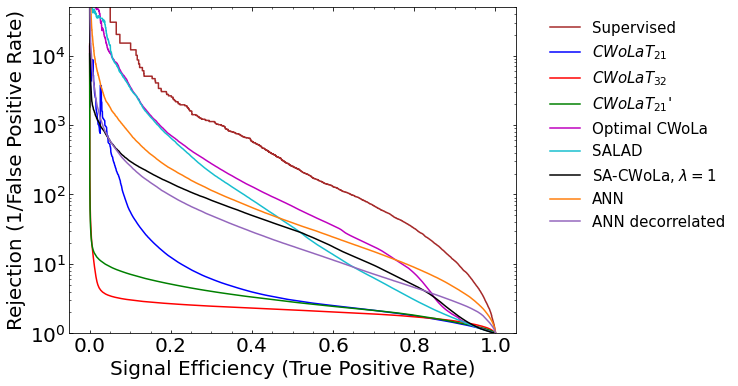

In [113]:
# Plot without banding
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale("log")
plt.ylim([1,5*1e4])
ERR=False
plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='brown')

for band in bands4:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands4[band][3:5]

    plt.plot(tpr_pts, mu, **bands4[band][-1])
    if ERR:
        plt.fill_between(tpr_pts, mu - std, mu + std, alpha=.2, color=bands2[band][-1]['color'])
#plt.plot(tpr_sup,1./tpr_sup,color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Rejection (1/False Positive Rate)",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right",bbox_to_anchor=(1.5, 1))

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\2504084357.py:25: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(tpr_sup,tpr_sup/np.sqrt(tpr_sup),color="black",ls=":",label="Random")


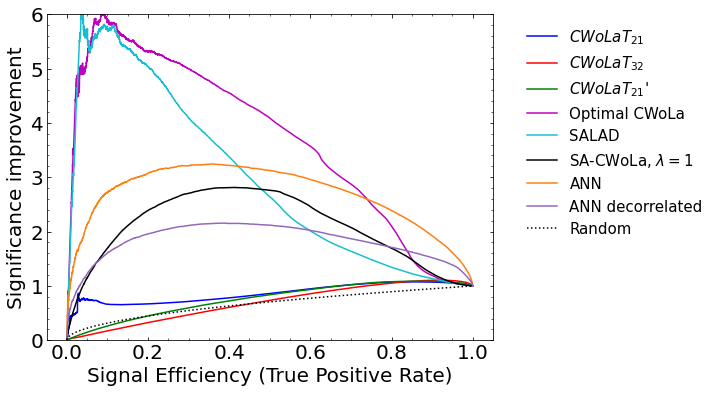

In [114]:
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

ERR = False

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim([0, 6])



for band in bands4:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands4[band][5:7]
    plt.plot(tpr_pts, tpr_pts*mu, **bands4[band][-1])
plt.plot(tpr_sup,tpr_sup/np.sqrt(tpr_sup),color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Significance improvement",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right",bbox_to_anchor=(1.5, 1))

# ANN + CWoLa (Hybrid Model)


In [115]:
alpha = 0.1

def load_dataTp_sig(input_frame):
    dataset = input_frame[["mj1","tau1j1","tau2j1","mj2","tau1j2","tau2j2","tau3j1","tau3j2","label"]]
    #Usar esta, masa al cuadrado
    dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
    
    
    dataset["mjTwo"] = dataset[["mj1", "mj2"]].max(axis=1)
    dataset["mjOne"] = dataset[["mj1", "mj2"]].min(axis=1)
    
    
    #T_{21} Jet 1
    dataset["tau1jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jOne"] = dataset["tau2jOne"]/dataset["tau1jOne"]
    
    #T_{21} Jet 2
    dataset["tau1jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau1j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau1j2"]
    dataset["tau2jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau2j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau2j2"]
    dataset["tau21jTwo"] = dataset["tau2jTwo"]/dataset["tau1jTwo"]
    
    #T_{32} Jet 1
    dataset["tau3jOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jOne"] = dataset["tau3jOne"]/dataset["tau2jOne"]
    
    
    #T_{32} Jet 2
    dataset["tau3jTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["tau3j1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["tau3j2"]
    dataset["tau32jTwo"] = dataset["tau3jTwo"]/dataset["tau2jTwo"]    
    
    #pT
    dataset["pT1"] = (input_frame["pxj1"]**2+input_frame["pyj1"]**2)**0.5/1000.
    dataset["pT2"] = (input_frame["pxj2"]**2+input_frame["pyj2"]**2)**0.5/1000.
    
    
    #cada jet
    dataset["pTjOne"] = (dataset["mjOne"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjOne"] == dataset["mj2"])*dataset["pT2"]
    dataset["pTjOne"] = dataset["pTjOne"]*1000
    
    dataset["pTjTwo"] = (dataset["mjTwo"] == dataset["mj1"])*dataset["pT1"]+(dataset["mjTwo"] == dataset["mj2"])*dataset["pT2"] 
    dataset["pTjTwo"] = dataset["pTjTwo"]*1000
    

    
    #print(dataset["pTjOne"])
    #print((dataset["mjOne"] == dataset["mj1"])*dataset["pT1"])
    
    dataset["rhopjOne"] = np.log(dataset["mjj"]/dataset["pTjOne"])
    dataset["rhopjTwo"] = np.log(dataset["mjj"]/dataset["pTjTwo"])
    
    
    #dataset = dataset.sort_values("rhopjOne")
    
    linear_regression = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t21_J1 = np.array(dataset["tau21jOne"])
    
    tau21p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    print(len(dataset["rhopjOne"]))
    
    print(dataset["pTjOne"])
    
    for n in range(len(dataset["rhopjOne"])):
        
        n = n + 1000000
        #print(n)
        if dataset["pTjOne"][n] <= 500:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 500) and (dataset["pTjOne"][n] <= 1000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1000) and (dataset["pTjOne"][n] <= 1500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_1500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 1500) and (dataset["pTjOne"][n] <= 2000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2000*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2000) and (dataset["pTjOne"][n] <= 2500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_2500*dataset["rhopjOne"][n])
            
        elif (dataset["pTjOne"][n] > 2500) and (dataset["pTjOne"][n] <= 3000):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3000*dataset["rhopjOne"][n])
            
        else:
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n])
        """ 
        elif (dataset["pTjOne"][n] > 3000) and (dataset["pTjOne"][n] <= 3500):
            tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n])
            
        #else:
            #tau21p_J1.append(dataset["tau21jOne"][n]-b_J1_sig_4000*dataset["rhopjOne"][n])
        else:
            tau21p_J1.append(0)
        """   
    
    dataset["tau21pjOne"] = tau21p_J1
    
    print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression2 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t21_J2 = np.array(dataset["tau21jTwo"])
    
    linear_regression2.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2 = linear_regression2.coef_[0]
    
    dataset["tau21pjTwo"] = dataset["tau21jTwo"]-b_J2*dataset["tau21jTwo"]
    
    
    
    
    
    
    
    
    linear_regression3 = LinearRegression()
    ro_J1 = np.array(dataset["rhopjOne"])
    t32_J1 = np.array(dataset["tau32jOne"])
    
    tau32p_J1 = []
    
    
    #linear_regression.fit(ro_J1.reshape(-1, 1), t21_J1)
    #b_J1 = linear_regression.coef_[0]
    
    #print(dataset["pTjOne"][1000000])
    
    for n2 in range(len(dataset["rhopjOne"])):
        n2 = n2 + 1000000
        if dataset["pTjOne"][n2] <= 500:
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 500) and (dataset["pTjOne"][n2] <= 1000):
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_1000*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 1000) and (dataset["pTjOne"][n2] <= 1500):
            tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_1500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 1500) and (dataset["pTjOne"][n2] <= 2000):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_2000*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 2000) and (dataset["pTjOne"][n2] <= 2500):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_2500*dataset["rhopjOne"][n2])
            
        elif (dataset["pTjOne"][n2] > 2500) and (dataset["pTjOne"][n2] <= 3000):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3000*dataset["rhopjOne"][n2])
            
        else:
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n2])
          
        """
        elif (dataset["pTjOne"][n2] > 3000) and (dataset["pTjOne"][n2] <= 3500):
            tau32p_J1.append(dataset["tau32jOne"][n]-b_J1_sig_3500*dataset["rhopjOne"][n2])
          
        
        #else:
            #tau32p_J1.append(dataset["tau32jOne"][n2]-b_J1_sig_4000*dataset["rhopjOne"][n2])
            
        else:
            tau32p_J1.append(0)
        """
    
    dataset["tau32pjOne"] = tau32p_J1
    
    #print(dataset["tau21pjOne"])
    
    
    
    dataset = dataset.sort_values("rhopjTwo")
    linear_regression4 = LinearRegression()
    ro_J2 = np.array(dataset["rhopjTwo"])
    t32_J2 = np.array(dataset["tau32jTwo"])
    
    linear_regression4.fit(ro_J2.reshape(-1, 1), t21_J2)

    b_J2_32 = linear_regression4.coef_[0]
    
    dataset["tau32pjTwo"] = dataset["tau32jTwo"]-b_J2_32*dataset["tau32jTwo"]
    
    dataset["mjTwo"] = dataset["mjTwo"]/1000. + 2*alpha*dataset["mjj"]
    dataset["mjOne"] = dataset["mjOne"]/1000. + alpha*dataset["mjj"]
    dataset["mjDelta"] = (dataset["mjTwo"] - dataset["mjOne"])
    
    #eta
    dataset["E1"] = ((1000*dataset["pT1"])**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5/1000.
    dataset["E2"] = ((1000*dataset["pT2"])**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5/1000.
    dataset["y1"] = 0.5*np.log((dataset["E1"] + input_frame["pzj1"]/1000.)/(dataset["E1"] - input_frame["pzj1"]/1000.))
    dataset["y2"] = 0.5*np.log((dataset["E2"] + input_frame["pzj2"]/1000.)/(dataset["E2"] - input_frame["pzj2"]/1000.))
    dataset["Dy"] = dataset["y1"]-dataset["y2"]

    

    dataset = dataset.fillna(0)
    dataset = dataset[["mjj","mjOne","mjDelta","tau21pjOne","tau21pjTwo","tau32pjOne","tau32pjTwo","pTjOne","pTjTwo","Dy","label"]]
    #dataset = dataset[["mjj","mjOne","mjDelta", "tau21jOne", "tau21jTwo", "tau32jOne", "tau32jTwo","pTjOne","pTjTwo","Dy"]]
    
    
    dataset = dataset.sort_index()
    #print(dataset)
    return dataset


In [116]:
features_bg2l=pd.read_hdf("/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/content/events_anomalydetection_DelphesHerwig_qcd_features.h5")

features_bg2l["label"] = 0.0

dataset_bgp=load_dataT21p(features_bg)
dataset_bg2p=load_dataT21p_bg2(features_bg2l)
dataset_sigp=load_dataT21p_sig(features_sig)

#dataset_bgT32p=load_dataT32(features_bg)
#dataset_bg2T32p=load_dataT32p(features_bg2)
#dataset_sigT32p=load_dataT32p(features_sig)



dataset_bg_morep=load_dataTp(features_bg)
dataset_bg2_morep=load_dataTp(features_bg2l)
dataset_sig_morep=load_dataTp_sig(features_sig)

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584539098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584539098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

0         0.463959
1         0.611833
2         0.663790
3         0.155759
4         0.462138
            ...   
999995    0.084862
999996    0.724350
999997    0.530966
999998    0.519655
999999    0.511054
Name: tau21pjOne, Length: 1000000, dtype: float64
             mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
0       3.307219  0.369618  0.529720    0.463959    0.271660
1       3.107621  0.333761  0.677295    0.611833    0.535696
2       3.004895  0.372645  0.306565    0.663790    0.940985
3       3.233075  0.379105  0.626623    0.155759    0.609631
4       2.919346  0.369441  0.299320    0.462138    0.595775
...          ...       ...       ...         ...         ...
999995  3.283302  0.387100  0.417077    0.084862    0.699689
999996  3.021083  0.334351  0.406255    0.724350    0.723448
999997  4.283545  0.484826  0.767995    0.530966    0.865889
999998  2.784058  0.383593  0.537010    0.519655    0.235260
999999  2.926457  0.342266  0.393240    0.511054    0.946082

[1000000

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584400212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\584400212.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

0         0.282037
1         0.699687
2         0.709036
3         0.498769
4         0.047475
            ...   
999994    0.614729
999995    0.148748
999996    0.441618
999997    0.547615
999998    0.254599
Name: tau21pjOne, Length: 999999, dtype: float64
             mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
0       2.096182  0.276789  0.365517    0.282037    0.608052
1       2.397091  0.317239  0.404315    0.699687    0.240819
2       3.707095  0.466458  0.858282    0.709036    0.189218
3       4.376528  0.582550  0.733413    0.498769    0.632411
4       3.062404  0.358207  0.370862    0.047475    0.459338
...          ...       ...       ...         ...         ...
999994  2.872773  0.319426  1.051235    0.614729    0.519370
999995  3.933182  0.518312  0.601938    0.148748    0.747665
999996  3.028001  0.380325  0.645534    0.441618    0.203626
999997  3.198573  0.509275  0.763220    0.547615    0.219811
999998  3.638007  0.464279  0.414217    0.254599    0.658422

[999999 r

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\470164586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\470164586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

1914.942975899741
1000000    0.516879
1000001    0.405468
1000002    0.100171
1000003    0.581661
1000004    0.547901
             ...   
1099995    0.591478
1099996    0.364888
1099997    0.682958
1099998    0.118489
1099999    0.762587
Name: tau21pjOne, Length: 100000, dtype: float64
              mjj     mjOne   mjDelta  tau21pjOne  tau21pjTwo
1000000  3.662211  0.471256  0.722760    0.516879    0.119951
1000001  3.586711  0.518537  0.713689    0.405468    0.296519
1000002  3.421777  0.435844  0.723829    0.100171    0.133958
1000003  3.536983  0.470025  0.798607    0.581661    0.291343
1000004  3.481574  0.456910  0.752420    0.547901    0.181030
...           ...       ...       ...         ...         ...
1099995  3.105457  0.419436  0.327840    0.591478    0.222800
1099996  3.622837  0.478003  0.735618    0.364888    0.200656
1099997  3.546809  0.445786  0.771621    0.682958    0.164213
1099998  3.607571  0.475695  0.799556    0.118489    0.518639
1099999  3.491635  0.503274  0.

C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

1000000
0         1589.568464
1          622.454251
2         1390.784209
3         1255.513485
4         1415.794362
             ...     
999995    1114.489790
999996    1322.320598
999997     946.858205
999998    1242.430728
999999    1309.855197
Name: pTjOne, Length: 1000000, dtype: float64
0         0.547871
1         0.410560
2         0.887101
3         0.372684
4         0.687149
            ...   
999995    0.296891
999996    0.945629
999997    0.325949
999998    0.741640
999999    0.733147
Name: tau21pjOne, Length: 1000000, dtype: float64


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\545629855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

999999
0          868.532631
1         1092.055298
2         1892.548615
3          995.841605
4         1332.903827
             ...     
999994    1197.468268
999995    1283.567685
999996    1445.893600
999997    1471.029899
999998    1834.872394
Name: pTjOne, Length: 999999, dtype: float64
0         0.145337
1         0.954926
2         0.695382
3         0.375665
4         0.300810
            ...   
999994    0.866262
999995    0.390077
999996    0.698817
999997    0.803248
999998    0.240971
Name: tau21pjOne, Length: 999999, dtype: float64


C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\274487745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["mjj"] = (((input_frame["pxj1"]**2+input_frame["pyj1"]**2+input_frame["pzj1"]**2+input_frame["mj1"]**2)**0.5+(input_frame["pxj2"]**2+input_frame["pyj2"]**2+input_frame["pzj2"]**2+input_frame["mj2"]**2)**0.5)**2-(input_frame["pxj1"]+input_frame["pxj2"])**2-(input_frame["pyj1"]+input_frame["pyj2"])**2-(input_frame["pzj1"]+input_frame["pzj2"])**2)**0.5/1000.
C:\Users\bolit\AppData\Local\Temp\ipykernel_3600\274487745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

100000
1000000    1914.942976
1000001    1684.598742
1000002    1789.997021
1000003    1672.631325
1000004    1099.721325
              ...     
1099995    1001.325622
1099996    1289.501837
1099997    1381.171137
1099998    1745.240519
1099999    1591.161193
Name: pTjOne, Length: 100000, dtype: float64
1000000    0.516879
1000001    0.405468
1000002    0.100171
1000003    0.581661
1000004    0.547901
             ...   
1099995    0.591478
1099996    0.364888
1099997    0.682958
1099998    0.118489
1099999    0.762587
Name: tau21pjOne, Length: 100000, dtype: float64


In [117]:
from sklearn.model_selection import train_test_split

SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200

def sr_critp(d):
    #print((d[:,0] < SR_high) & (d[:,0] >= SR_low))
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)

bg_srsbp, bg2_srsbp, sig_srsbp = sr_critp(dataset_bg_morep), sr_critp(dataset_bg2_morep), sr_critp(dataset_sig_morep)

SR_background_datap = dataset_bgp[bg_srsbp]
SB_background_datap = dataset_bgp[~bg_srsbp]

SR_background_simp = dataset_bg2p[bg2_srsbp]
SB_background_simp = dataset_bg2p[~bg2_srsbp]

SR_signalp = dataset_sigp[sig_srsbp]
SB_signalp = dataset_sigp[~sig_srsbp]

N_inputs = len(SR_background_datap.T) - 1


((SR_background_datap, SR_background_data_fortestp),
 (SR_background_simp, SR_background_sim_fortestp),
 (SB_background_datap, SB_background_data_fortestp),
 (SB_background_simp, SB_background_sim_fortestp),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_datap, SR_background_simp,
    SB_background_datap, SB_background_simp,
]]

mn,mx = np.percentile(np.concatenate([SB_background_datap, SB_background_simp, SR_background_datap, 
                                      SR_background_simp]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signalp)*Nsig/len(SR_signalp)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signalp[0:Nsig])/len(SR_background_datap)**0.5))
print(fmt.format('s/b ratio', len(SR_signalp[0:Nsig])/len(SR_background_datap)))

n_injectionsp = 20
SR_signals_to_injectp = [None] * n_injectionsp
SB_signals_to_injectp = [None] * n_injectionsp
signals_to_testp = [None] * n_injectionsp

for i in range(n_injectionsp):
    idx = np.isin(range(len(SR_signalp)), np.random.choice(SR_signalp.shape[0], size=Nsig, replace=False))
    SR_signals_to_injectp[i] = SR_signalp[idx, :]
    signals_to_testp[i] = SR_signalp[~idx, :]
    
    idx = np.isin(range(len(SB_signalp)), np.random.choice(SB_signalp.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_injectp[i] = SB_signalp[idx, :]



cwola_rocsp = pd.DataFrame(columns=['fpr', 'tpr'])
SB_width = 0.3


for i in tqdm.tqdm(range(n_injectionsp)):
    
    SR_signal_to_injectp = SR_signals_to_injectp[i]
    SB_signal_to_injectp = SB_signals_to_injectp[i]

    signal_to_testp = signals_to_testp[i]
        
    X_cwola_trainp = np.concatenate([SR_signal_to_injectp, SR_background_datap, SB_signal_to_injectp, SB_background_datap])
    Y_cwola_trainp = np.concatenate([np.ones(len(SR_signal_to_injectp)), np.ones(len(SR_background_datap)),
                                    np.zeros(len(SB_signal_to_injectp)), np.zeros(len(SB_background_datap))])
    
    X_cwola_trainp, Y_cwola_trainp = shuffle(X_cwola_trainp, Y_cwola_trainp, )

    sbmjjp = X_cwola_trainp[:,0]
    sb_critp = ((sbmjjT21p > SR_low - SB_width)&(sbmjjp <= SR_high + SB_width))
    
    X_cwola_trainp = X_cwola_trainp[sb_critp]
    Y_cwola_trainp = Y_cwola_trainp[sb_critp]
    
    w_lowp = 0.5*(len(SR_signal_to_injectp) + len(SR_background_datap))/((X_cwola_trainp[:,0] <= SR_low).sum())
    w_highp = 0.5*(len(SR_signal_to_injectp) + len(SR_background_datap))/((X_cwola_trainp[:,0] >= SR_high).sum())

    W_cwola_trainp = np.ones_like(Y_cwola_trainp)
    W_cwola_trainp[(Y_cwola_trainp == 0) & (X_cwola_trainp[:,0] <= SR_low)] = w_lowp
    W_cwola_trainp[(Y_cwola_trainp == 0) & (X_cwola_trainp[:,0] >= SR_high)] = w_highp
    
    X_cwola_valp = np.concatenate([signal_to_testp,SR_background_data_fortestp])
    Y_cwola_valp = np.concatenate([np.ones(len(signal_to_testp)),np.zeros(len(SR_background_data_fortestp))])
    
    K.clear_session()
    model_cwolap = Sequential()
    model_cwolap.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_cwolap.add(Dense(64, activation='relu'))
    model_cwolap.add(Dense(64, activation='relu'))
    model_cwolap.add(Dense(1, activation='sigmoid'))
    model_cwolap.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    #hist_cwolaT21p = model_cwolaT21p.fit(X_cwola_trainT21p[:,1:], Y_cwola_trainT21p, epochs=EPOCHS, 
                                 #batch_size=batch_size, verbose=0, sample_weight=W_cwola_trainT21p) #ya no

    scores_cwolap = model_cwolap.predict(X_cwola_valp[:,1:],batch_size=batch_size) #en X solo los datos de CWoLa
        
    fpr_cwolap, tpr_cwolap, _ = roc_curve(Y_cwola_valp, scores_cwolap)
    cwola_rocsp = cwola_rocsp.append({'fpr': fpr_cwolap, 'tpr': tpr_cwolap}, ignore_index=True)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
SR_background_data_fortestp


In [ ]:
X_cwola_val_annp = np.delete(X_cwola_valp, 0, axis=1)

X_cwola_val_annp

In [ ]:
#ANN + CWoLa

# Define variable(s)
name    = 'classifier'

#Change to: "place where you have the folder" + "/CWoLa_ANN_Analysis/output/"
basedir = '/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/output/'

ann_cwola_rocsp = pd.DataFrame(columns=['fpr', 'tpr'])


ann_cwola_Xp = X_cwola_val_annp
ann_cwola_Yp = Y_cwola_valp


ann_cwola_classifierp, ann_cwola_historyp = load(basedir, name)

# Predict
ann_cwola_scoresp = ann_cwola_classifierp.predict(ann_cwola_Xp, batch_size = 1024)


fpr_ann_cwolap, tpr_ann_cwolap, _ = roc_curve(ann_cwola_Yp, ann_cwola_scoresp)

#print(fpr_ann)

ann_cwola_rocsp = ann_cwola_rocsp.append({'fpr': fpr_ann_cwolap, 'tpr': tpr_ann_cwolap}, ignore_index=True)

In [ ]:
fpr_interp_ann_cwolap = [None] * len(ann_cwola_rocsp)
tpr_pts_ann_cwolap = np.linspace(0, 1, 10000)
    
for i, row in ann_cwola_rocsp.iterrows():
    fpr_ann_cwolap, tpr_ann_cwolap = row
    interp_ann_cwolap = interpolate.interp1d(tpr_ann_cwolap, fpr_ann_cwolap, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts_ann_cwolap = interp_ann_cwolap(tpr_pts_ann_cwolap)
    fpr_interp_ann_cwolap[i] = fpr_pts_ann_cwolap

fpr_interp_ann_cwolap = np.ma.masked_invalid(1./np.array(fpr_interp_ann_cwolap))

ann_cwola_maxp = np.nanmax(fpr_interp_ann_cwolap, axis=0).data
ann_cwola_minp = np.nanmin(fpr_interp_ann_cwolap, axis=0).data
ann_cwola_medp = np.median(fpr_interp_ann_cwolap, axis=0).data
ann_cwola_meanp = np.nanmean(fpr_interp_ann_cwolap, axis=0).data
ann_cwola_stdp = np.nanstd(fpr_interp_ann_cwolap, axis=0).data
   
sig_interp_ann_cwolap = np.ma.masked_invalid(np.sqrt(fpr_interp_ann_cwolap))
    
ann_cwola_smeanp = np.nanmean(sig_interp_ann_cwolap, axis=0).data
ann_cwola_sstdp = np.nanstd(sig_interp_ann_cwolap, axis=0).data

In [ ]:
dataset_bg=load_dataT21(features_bg)
dataset_bg2=load_dataT21(features_bg2)
dataset_sig=load_dataT21(features_sig)

#dataset_bgT32p=load_dataT32(features_bg)
#dataset_bg2T32p=load_dataT32(features_bg2)
#dataset_sigT32p=load_dataT32(features_sig)

dataset_bg_more=load_data_more(features_bg)
dataset_bg2_more=load_data_more(features_bg2l)
dataset_sig_more=load_data_more(features_sig)

In [ ]:
from sklearn.model_selection import train_test_split

SR_low = 3.3
SR_high = 3.7
test_size = 0.5
EPOCHS=20
batch_size = 200
SB_width = 0.3

def sr_crit(d):
    return (d[:,0] < SR_high) & (d[:,0] >= SR_low)



bg_srsb, bg2_srsb, sig_srsb = sr_crit(dataset_bg_more), sr_crit(dataset_bg2_more), sr_crit(dataset_sig_more)

SR_background_data = dataset_bg[bg_srsb]
SB_background_data = dataset_bg[~bg_srsb]
print(~bg_srsb)

SR_background_sim = dataset_bg2[bg2_srsb]
SB_background_sim = dataset_bg2[~bg2_srsb]

SR_signal = dataset_sig[sig_srsb]
SB_signal = dataset_sig[~sig_srsb]

N_inputs = len(SR_background_data.T) - 1


((SR_background_data, SR_background_data_fortest),
 (SR_background_sim, SR_background_sim_fortest),
 (SB_background_data, SB_background_data_fortest),
 (SB_background_sim, SB_background_sim_fortest),
 ) = [train_test_split(arr, test_size=test_size) for arr in [
    SR_background_data, SR_background_sim,
    SB_background_data, SB_background_sim,
]]

mn,mx = np.percentile(np.concatenate([SB_background_data, SB_background_sim, SR_background_data, 
                                      SR_background_sim]), [1,99], axis=0)

def norm_func(d):
    return (d - mn)/(mx - mn)

Nsig = 1000
Nsig_SB = int(np.round(len(SB_signal)*Nsig/len(SR_signal)))

fmt = '{:>20}:  {}'
print(fmt.format('# signal events', Nsig))
print(fmt.format('signal significance', len(SR_signal[0:Nsig])/len(SR_background_data)**0.5))
print(fmt.format('s/b ratio', len(SR_signal[0:Nsig])/len(SR_background_data)))

n_injections = 20
SR_signals_to_inject = [None] * n_injections
SB_signals_to_inject = [None] * n_injections
signals_to_test = [None] * n_injections

for i in range(n_injections):
    idx = np.isin(range(len(SR_signal)), np.random.choice(SR_signal.shape[0], size=Nsig, replace=False))
    SR_signals_to_inject[i] = SR_signal[idx, :]
    signals_to_test[i] = SR_signal[~idx, :]
    
    idx = np.isin(range(len(SB_signal)), np.random.choice(SB_signal.shape[0], size=Nsig_SB, replace=False))
    SB_signals_to_inject[i] = SB_signal[idx, :]


tpr_pts = np.linspace(0, 1, 10000)
cwola_rocs = pd.DataFrame(columns=['fpr', 'tpr'])

for i in tqdm.tqdm(range(n_injections)):
    
    SR_signal_to_inject = SR_signals_to_inject[i]
    SB_signal_to_inject = SB_signals_to_inject[i]

    signal_to_test = signals_to_test[i]
        
    X_cwola_train = np.concatenate([SR_signal_to_inject, SR_background_data, SB_signal_to_inject, SB_background_data])
    Y_cwola_train = np.concatenate([np.ones(len(SR_signal_to_inject)), np.ones(len(SR_background_data)),
                                    np.zeros(len(SB_signal_to_inject)), np.zeros(len(SB_background_data))])
    
    X_cwola_train, Y_cwola_train = shuffle(X_cwola_train, Y_cwola_train, )

    sbmjj = X_cwola_train[:,0]
    sb_crit = ((sbmjj > SR_low - SB_width)&(sbmjj <= SR_high + SB_width))
    
    X_cwola_train = X_cwola_train[sb_crit]
    Y_cwola_train = Y_cwola_train[sb_crit]
    
    w_low = 0.5*(len(SR_signal_to_inject) + len(SR_background_data))/((X_cwola_train[:,0] <= SR_low).sum())
    w_high = 0.5*(len(SR_signal_to_inject) + len(SR_background_data))/((X_cwola_train[:,0] >= SR_high).sum())

    W_cwola_train = np.ones_like(Y_cwola_train)
    W_cwola_train[(Y_cwola_train == 0) & (X_cwola_train[:,0] <= SR_low)] = w_low
    W_cwola_train[(Y_cwola_train == 0) & (X_cwola_train[:,0] >= SR_high)] = w_high
    
    X_cwola_val = np.concatenate([signal_to_test,SR_background_data_fortest])
    Y_cwola_val = np.concatenate([np.ones(len(signal_to_test)),np.zeros(len(SR_background_data_fortest))])
    
    K.clear_session()
    model_cwola = Sequential()
    model_cwola.add(Dense(64, input_dim=N_inputs, activation='relu')) 
    model_cwola.add(Dense(64, activation='relu'))
    model_cwola.add(Dense(64, activation='relu'))
    model_cwola.add(Dense(1, activation='sigmoid'))
    model_cwola.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    #hist_cwola = model_cwola.fit(X_cwola_train[:,1:], Y_cwola_train, epochs=EPOCHS, 
     #                            batch_size=batch_size, verbose=0, sample_weight=W_cwola_train)

    scores_cwola = model_cwola.predict(X_cwola_val[:,1:],batch_size=batch_size)
        
    fpr_cwola, tpr_cwola, _ = roc_curve(Y_cwola_val, scores_cwola)
    cwola_rocs = cwola_rocs.append({'fpr': fpr_cwola, 'tpr': tpr_cwola}, ignore_index=True)

In [ ]:
X_cwola_val_ann = np.delete(X_cwola_val, 0, axis=1)

X_cwola_val_ann

In [ ]:
 # Define variable(s)
name    = 'classifier'

#Change to: "place where you have the folder" + "/CWoLa_ANN_Analysis/output/"
basedir = '/Users/bolit/OneDrive/Documentos/Tec/7_semestre/investigacion/CWoLa_ANN_Analysis/output/'

ann_cwola_rocs = pd.DataFrame(columns=['fpr', 'tpr'])



# Prepare arrays
ann_cwola_X = X_cwola_val_ann
ann_cwola_Y = Y_cwola_val


ann_cwola_classifier, ann_cwola_history = load(basedir, name)

# Predict
ann_cwola_scores = ann_cwola_classifier.predict(ann_cwola_X, batch_size = 1024) #X reemplazar por datos CWola


ann_cwola_fpr, ann_cwola_tpr, _ = roc_curve(ann_cwola_Y, ann_cwola_scores)


ann_cwola_rocs = ann_cwola_rocs.append({'fpr': ann_cwola_fpr, 'tpr': ann_cwola_tpr}, ignore_index=True)

In [ ]:

fpr_interp_ann_cwola = [None] * len(ann_cwola_rocs)
tpr_pts_ann_cwola = np.linspace(0, 1, 10000)
    
for i, row in ann_cwola_rocs.iterrows():
    fpr_ann_cwola, tpr_ann_cwola = row
    interp_ann_cwola = interpolate.interp1d(tpr_ann_cwola, fpr_ann_cwola, fill_value=float('nan'), bounds_error=False, assume_sorted=True)

    fpr_pts_ann_cwola = interp_ann_cwola(tpr_pts_ann_cwola)
    fpr_interp_ann_cwola[i] = fpr_pts_ann_cwola

fpr_interp_ann_cwola = np.ma.masked_invalid(1./np.array(fpr_interp_ann_cwola))

ann_cwola_max = np.nanmax(fpr_interp_ann_cwola, axis=0).data
ann_cwola_min = np.nanmin(fpr_interp_ann_cwola, axis=0).data
ann_cwola_med = np.median(fpr_interp_ann_cwola, axis=0).data
ann_cwola_mean = np.nanmean(fpr_interp_ann_cwola, axis=0).data
ann_cwola_std = np.nanstd(fpr_interp_ann_cwola, axis=0).data
   
sig_interp_ann_cwola = np.ma.masked_invalid(np.sqrt(fpr_interp_ann_cwola))
    
ann_cwola_smean = np.nanmean(sig_interp_ann_cwola, axis=0).data
ann_cwola_sstd = np.nanstd(sig_interp_ann_cwola, axis=0).data

In [ ]:
bands5 = {'ANN': (ann_max, ann_med, ann_min, ann_mean, ann_std, ann_smean, ann_sstd, {'label':'ANN', 'color':'tab:green'}),
          'ANN_CWoLa': (ann_cwola_max, ann_cwola_med, ann_cwola_min, ann_cwola_mean, ann_cwola_std, ann_cwola_smean, ann_cwola_sstd, {'label':'ANN + CWoLA', 'color':'tab:orange'}),
          'ANNp': (ann_maxp, ann_medp, ann_minp, ann_meanp, ann_stdp, ann_smeanp, ann_sstdp, {'label':'ANN decorrelated', 'color':'tab:blue'}),
          'ANN_CWoLap': (ann_cwola_maxp, ann_cwola_medp, ann_cwola_minp, ann_cwola_meanp, ann_cwola_stdp, ann_cwola_smeanp, ann_cwola_sstdp, {'label':'ANN + CWoLa decorrelated', 'color':'tab:purple'})}

In [ ]:
# Plot without banding
mylambda=.5
myklambda = 1 #np.round(len(SR_background_data)/len(SR_background_sim), 3)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 1, height_ratios=[1])
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.yscale("log")
plt.ylim([1,5*1e4])
ERR=False
plt.plot(tpr_sup,1./fpr_sup,label="Supervised",color='brown')

for band in bands5:
    if band in ['old-sacwola', 'hl-sacwola']:
        continue
    mu,std = bands5[band][3:5]

    plt.plot(tpr_pts, mu, **bands5[band][-1])
    if ERR:
        plt.fill_between(tpr_pts, mu - std, mu + std, alpha=.2, color=bands5[band][-1]['color'])
#plt.plot(tpr_sup,1./tpr_sup,color="black",ls=":",label="Random")

plt.xlabel(r'Signal Efficiency (True Positive Rate)',fontsize=20)
plt.ylabel(r"Rejection (1/False Positive Rate)",fontsize=20)
plt.legend(frameon=False,fontsize=15,loc="upper right")